In [1]:
from collections import Counter

import pickle as pkl
import re

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams["xtick.labelsize"] = 7
import seaborn as sns

In [2]:
with open('data/tokenizedQuestions.p', 'rb') as f:
        ec_data = pkl.load(f)

In [33]:
MAX_WORDS = 10

def plotTFIDFbyVar(path):
    
    tf_dict = {}

    for v in np.unique(["{}_{}".format(doc['Analyst'], doc['Tag']) for doc in ec_data]):
        analyst, tag = v.split("_")
        if analyst == "nan":
            continue
        v_docs = [doc['Question'] for doc in ec_data if (doc['Analyst']==analyst) & (doc['Tag']==tag)]
        usage = Counter(x for xs in v_docs for x in xs)
        tf_dict[v] = {u:usage[u]/np.log2(1 + usage[u]) for u in usage}
        
    tfidf_dict = {}

    for doc, usage in tf_dict.items():
        tfidf_dict[doc] = {}
        total_docs = 0
        for word, value in usage.items():
            for doc2, usage2 in tf_dict.items():
                if doc2.split("_")[1] == doc.split("_")[1]:
                    if word in usage2:
                        total_docs += 1
            tfidf_dict[doc][word] = value*np.log2(1 + len(tf_dict)/total_docs) 
            
    for tag, usage in tfidf_dict.items():
        word_values = sorted(usage.items(), key=lambda kv: -kv[1])[:MAX_WORDS]
        words = [wv[0] for wv in word_values]
        values = [wv[1] for wv in word_values]
        fig = plt.figure(figsize=(12,6))
        fig_plt = sns.barplot(x=words, y=values)
        fig_plt.set_xlabel("Word")
        fig_plt.set_ylabel("TF-IDF Score")
        fig_plt.set_title('TF-IDF Top 10 - {}'.format(tag))
        fig_plt.get_figure().savefig("{}/{}.png".format(path, tag), bbox_inches='tight')
    
    return "Great Success"

/home/isaac/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


'Great Success'

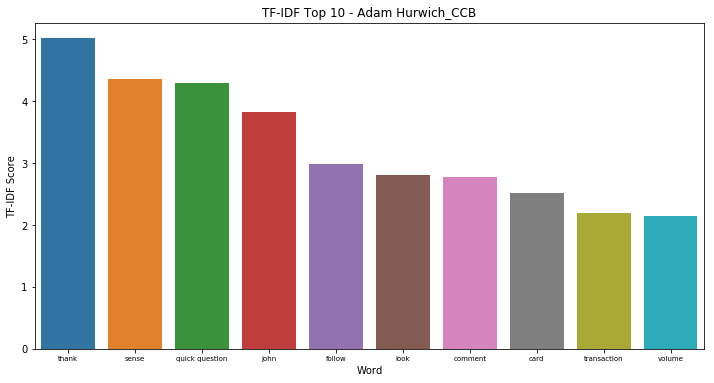

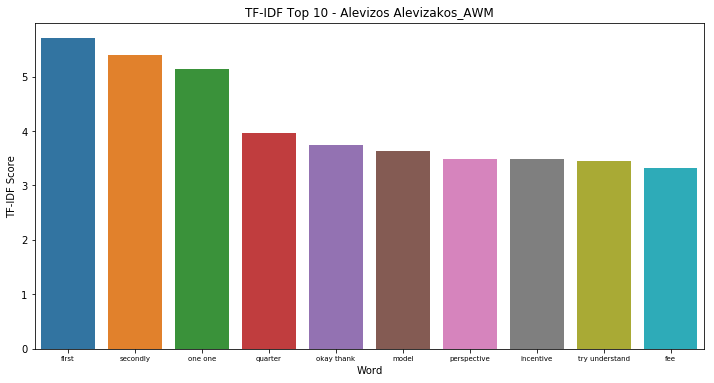

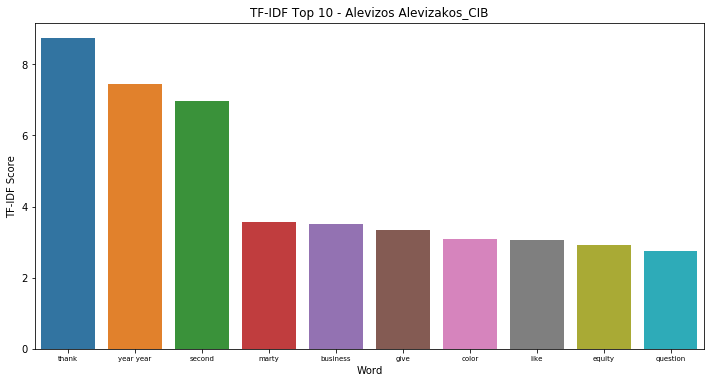

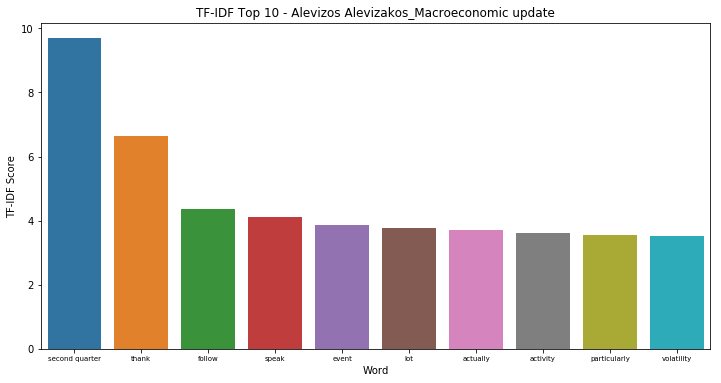

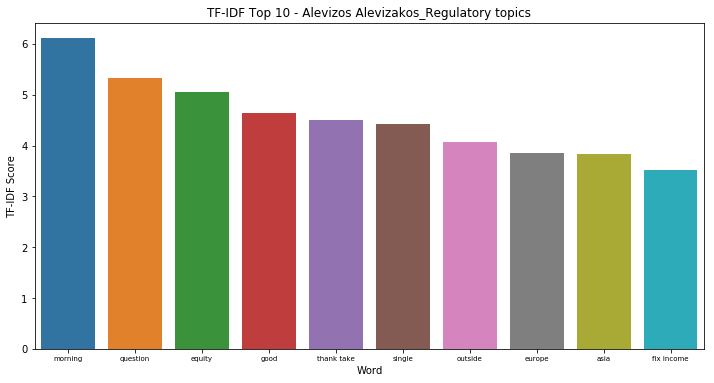

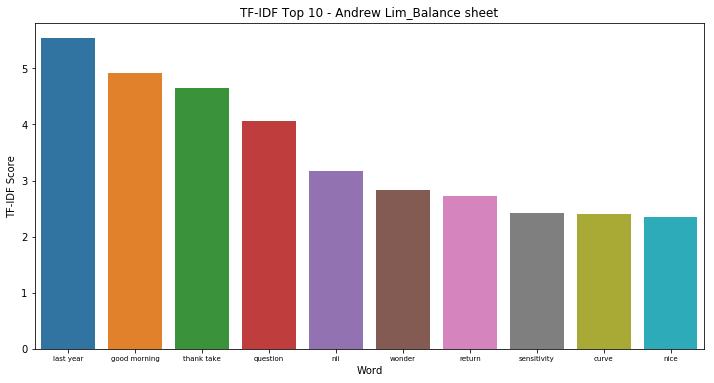

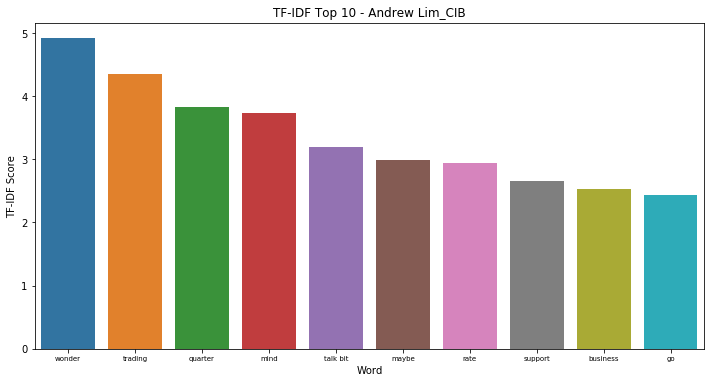

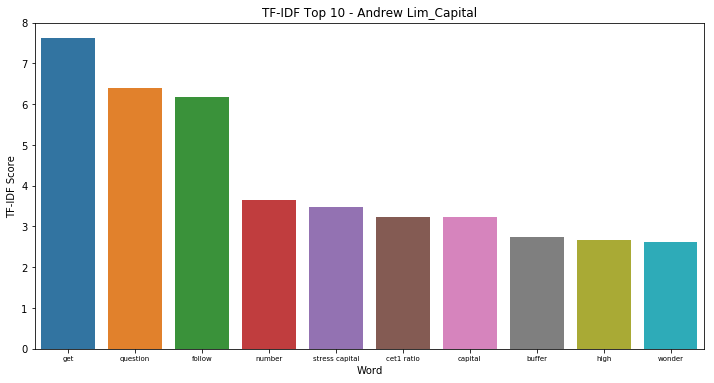

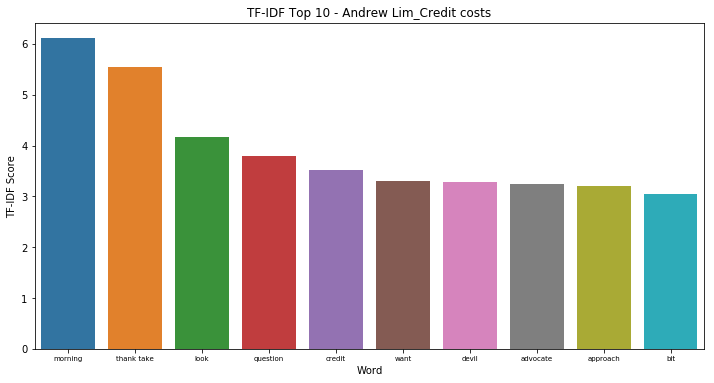

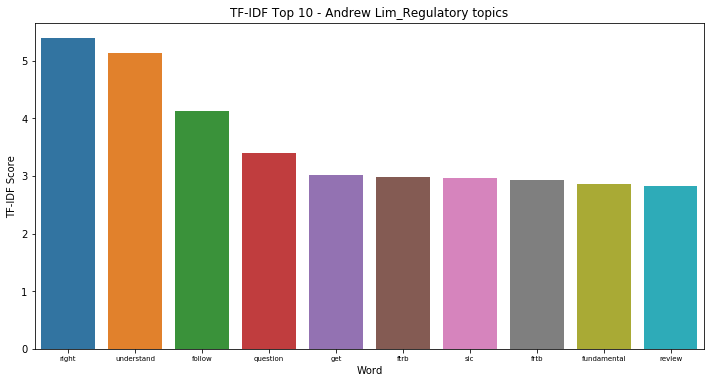

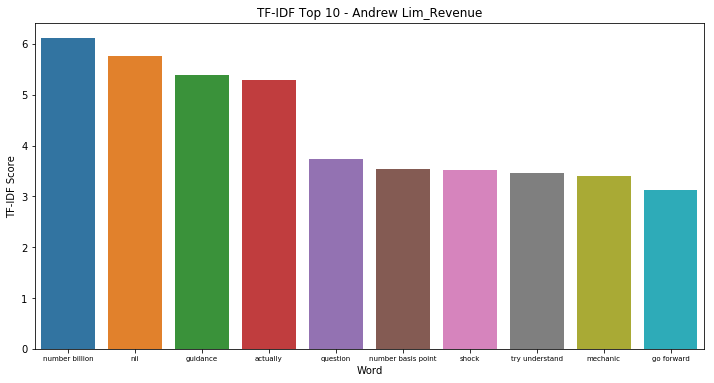

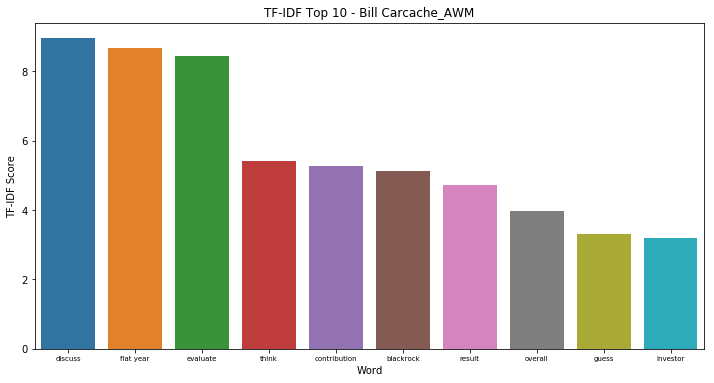

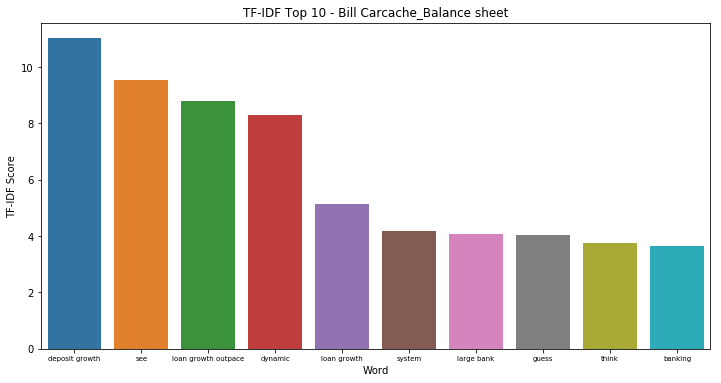

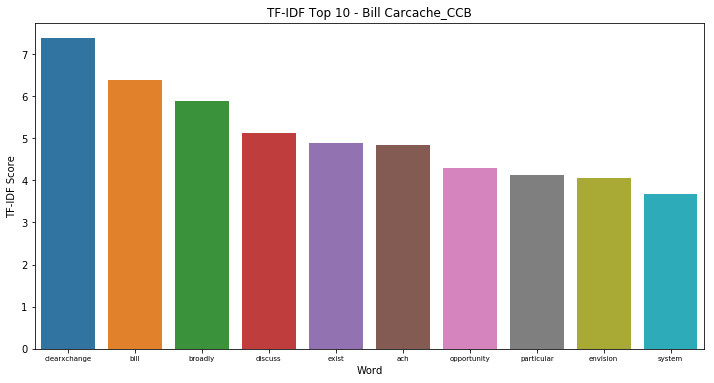

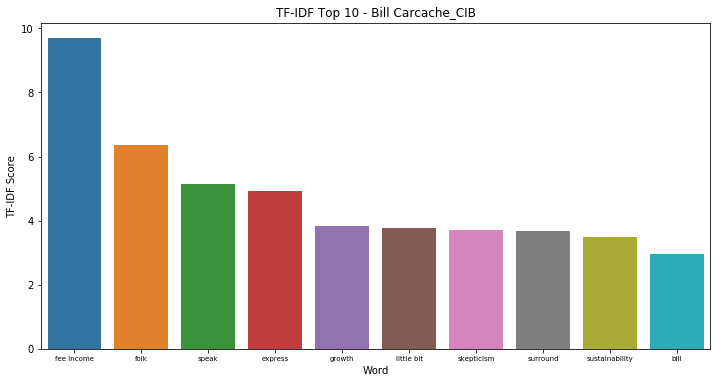

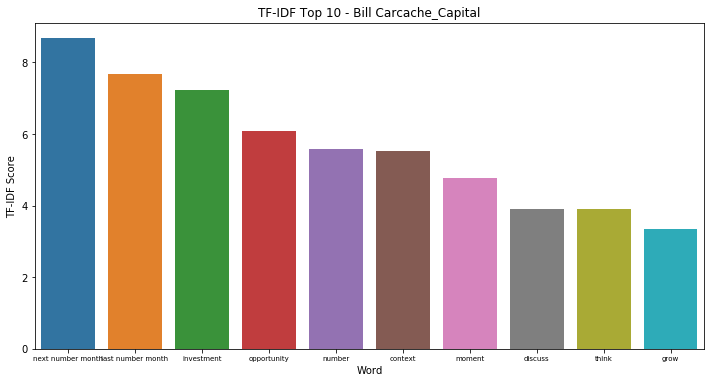

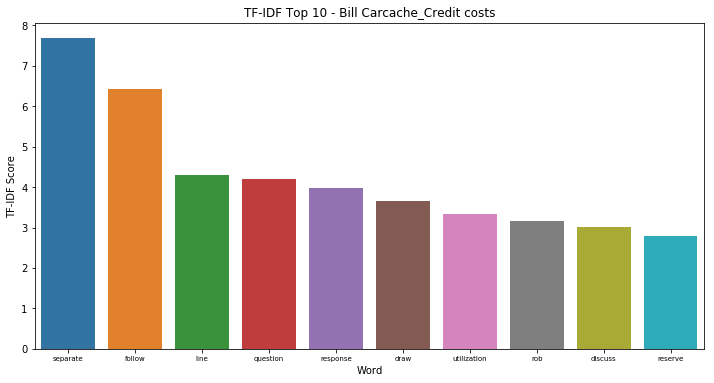

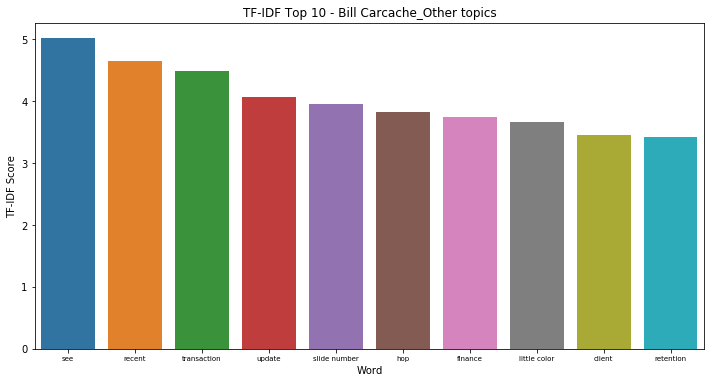

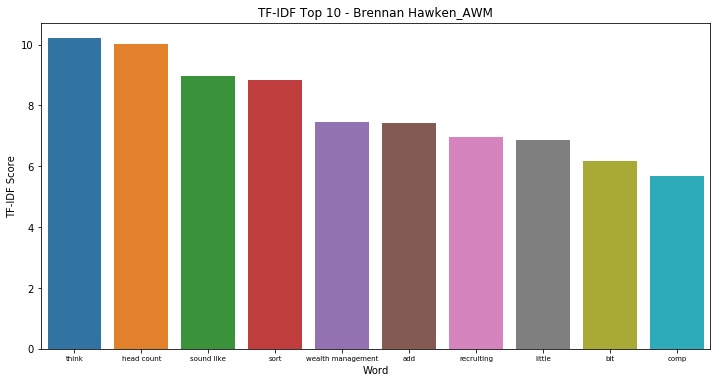

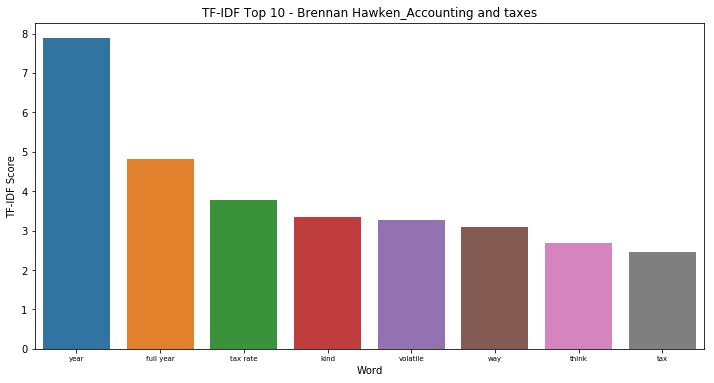

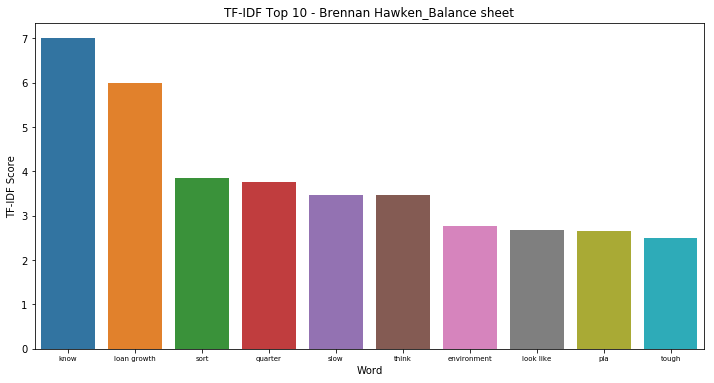

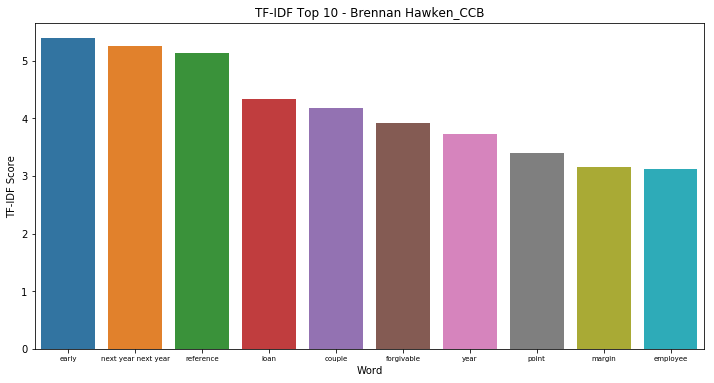

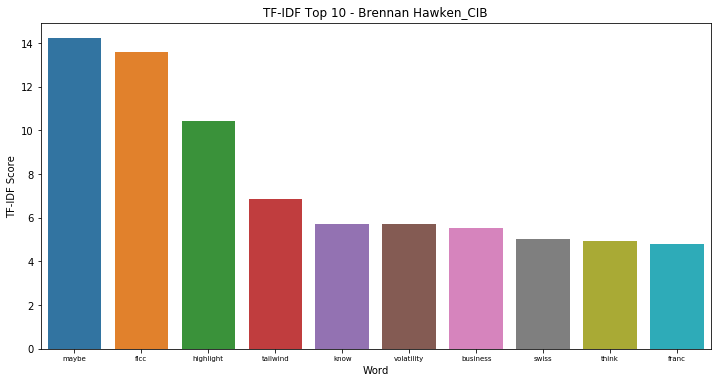

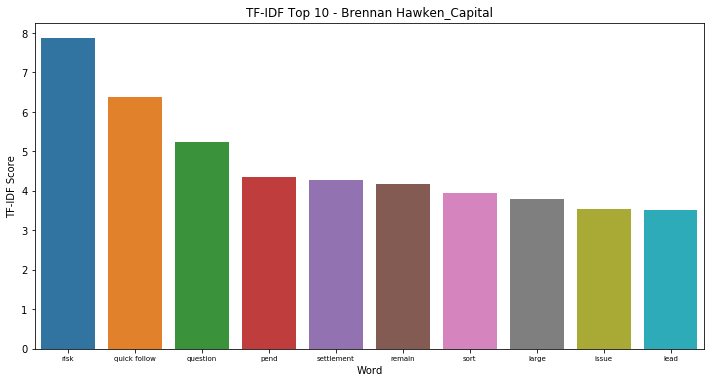

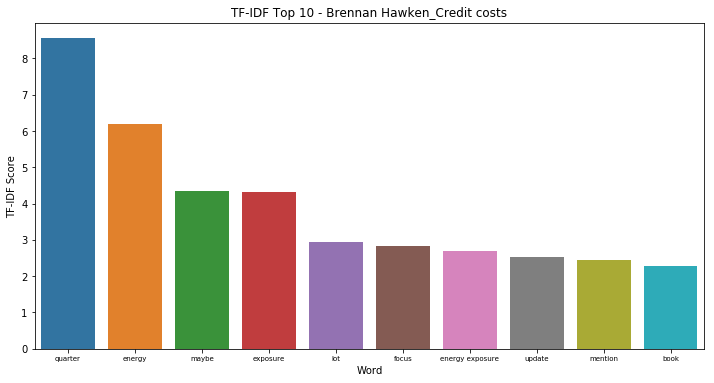

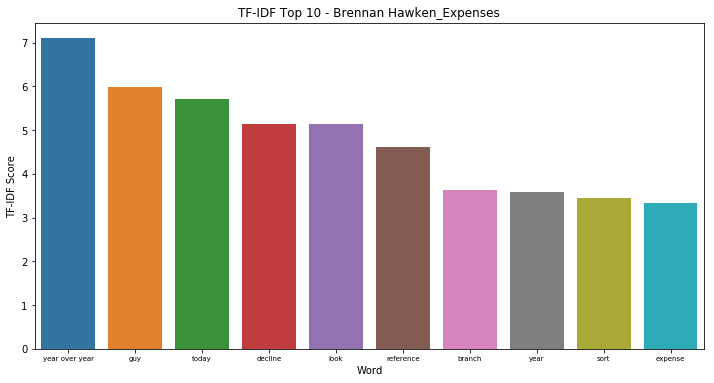

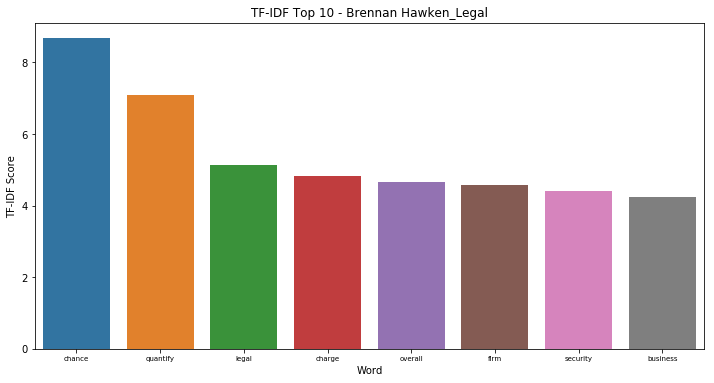

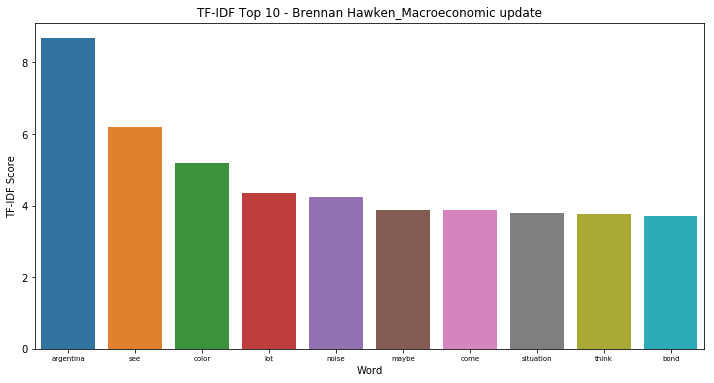

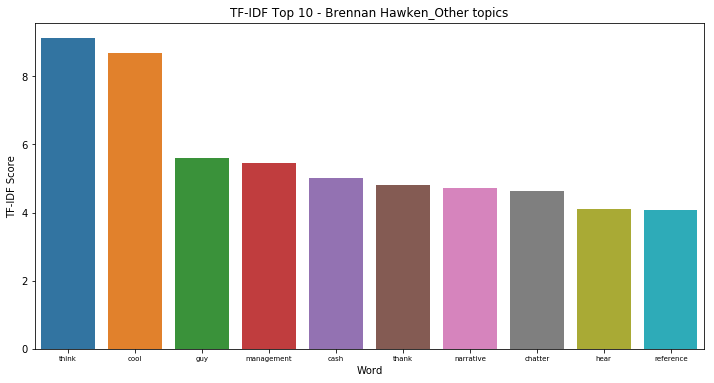

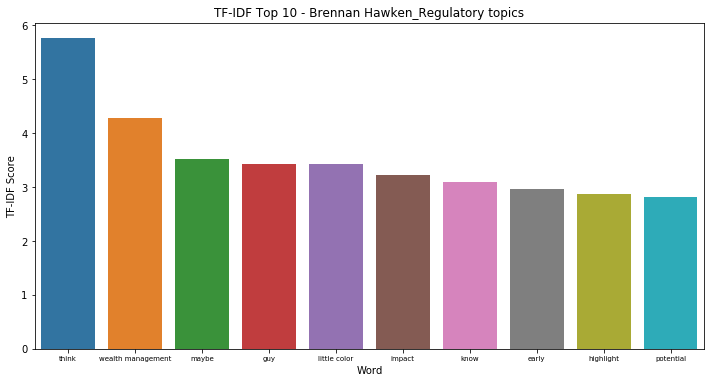

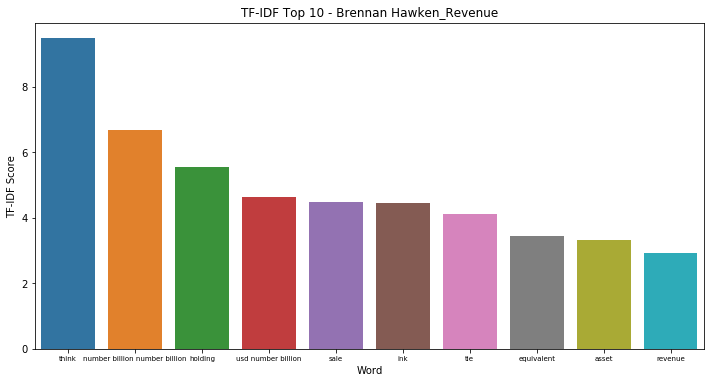

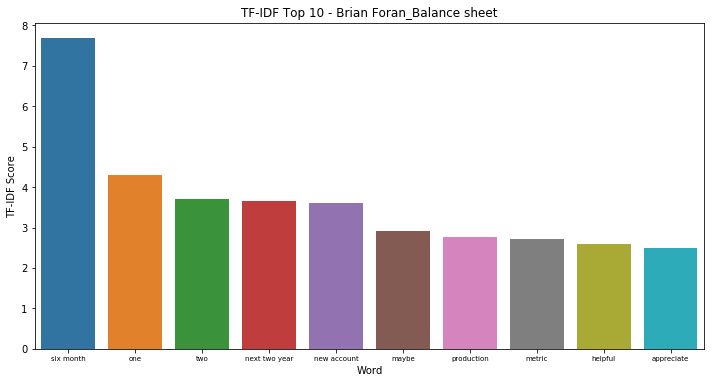

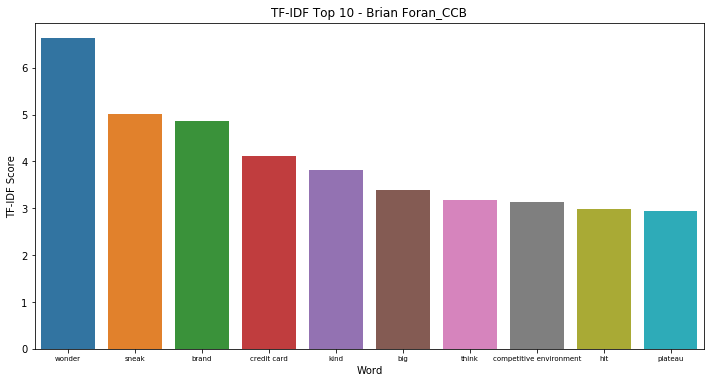

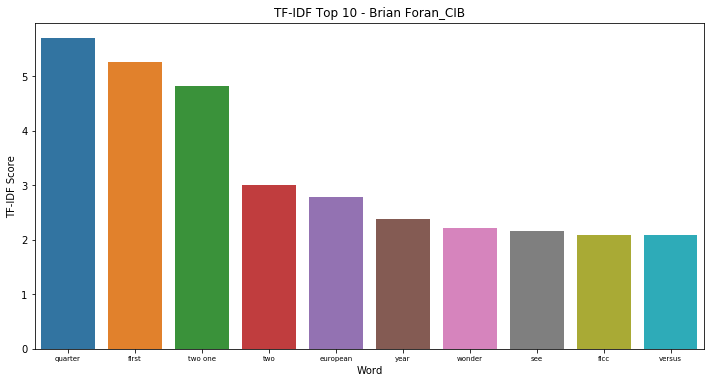

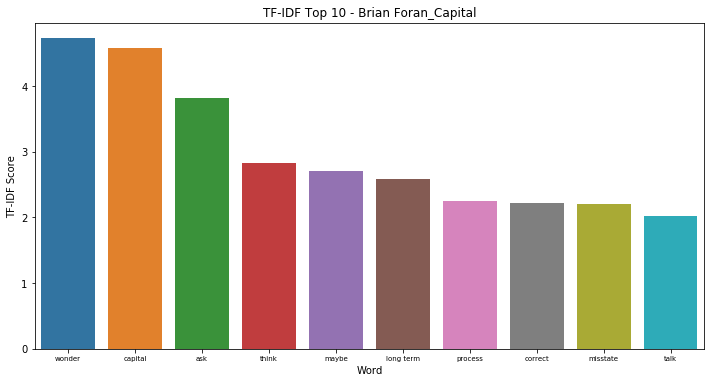

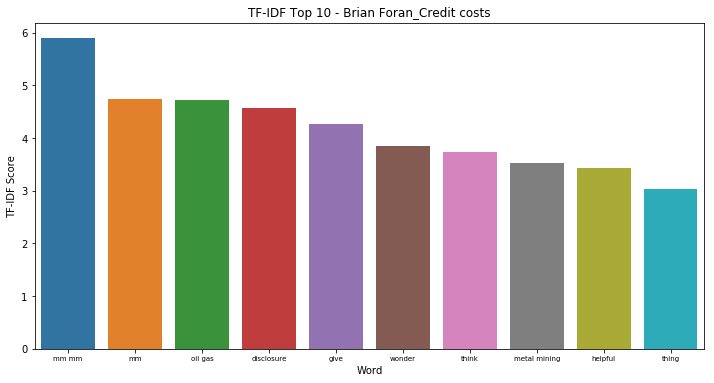

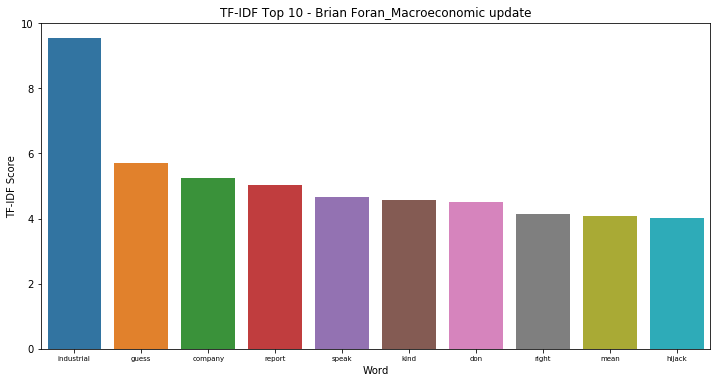

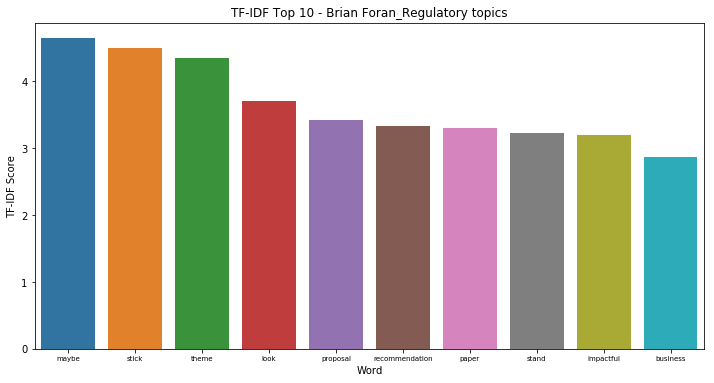

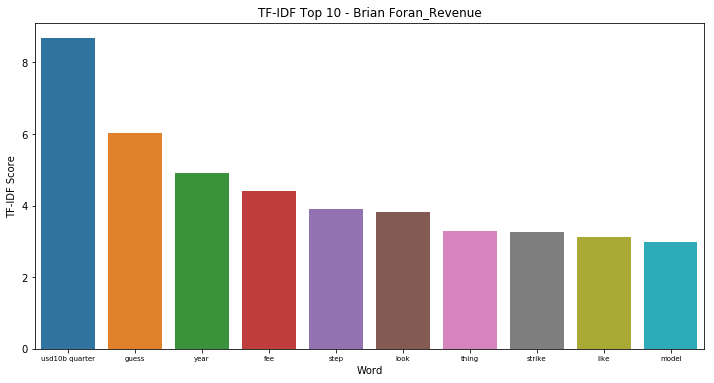

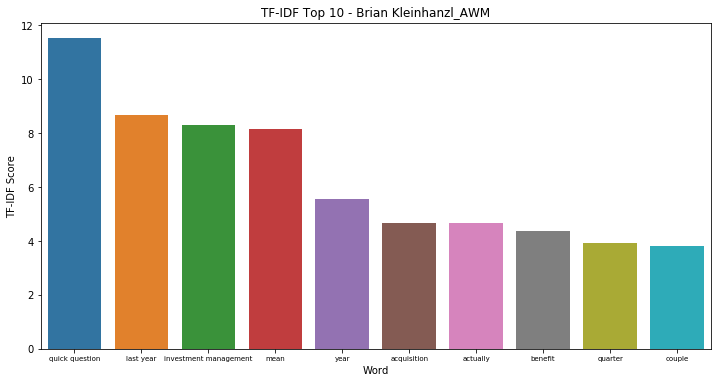

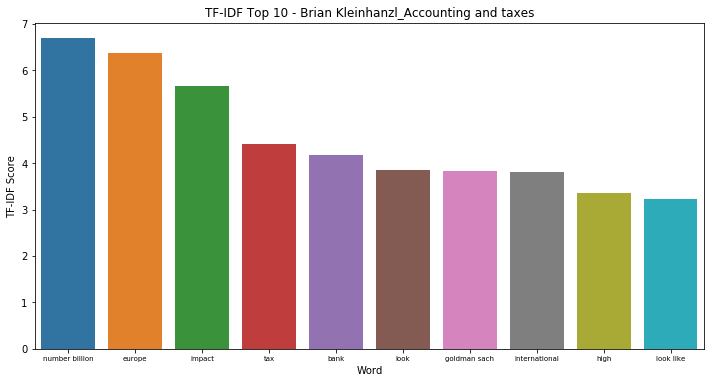

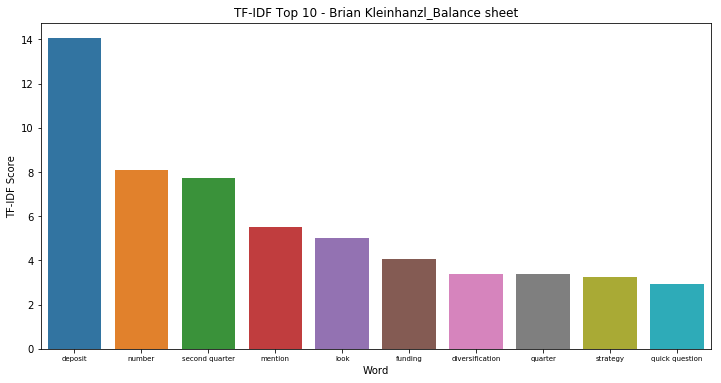

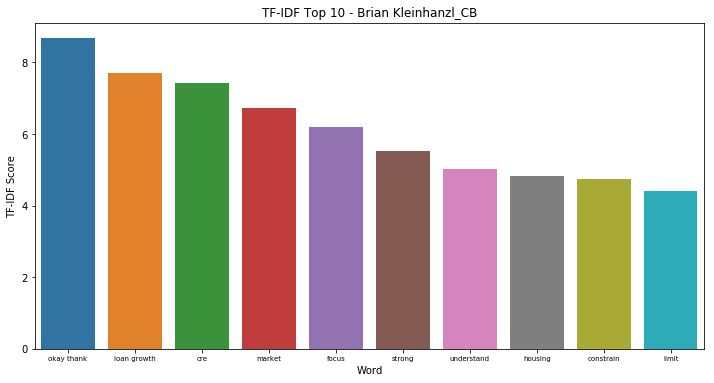

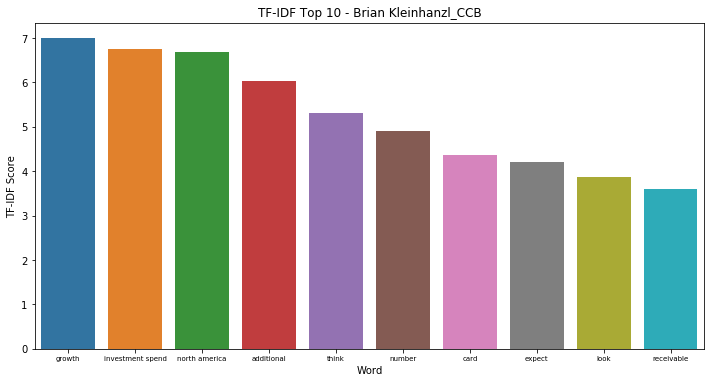

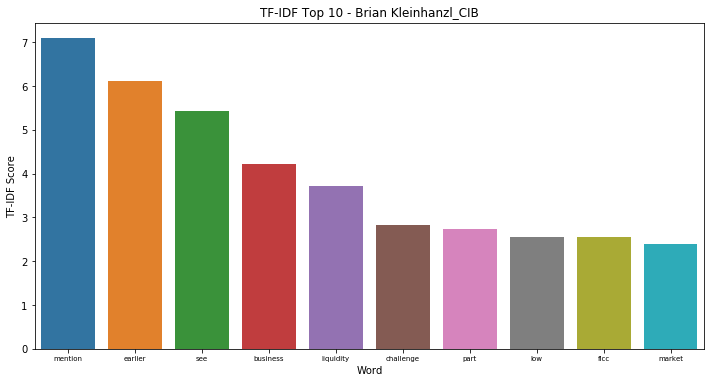

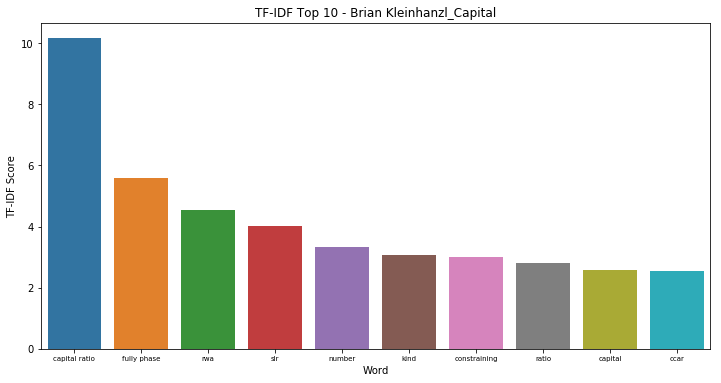

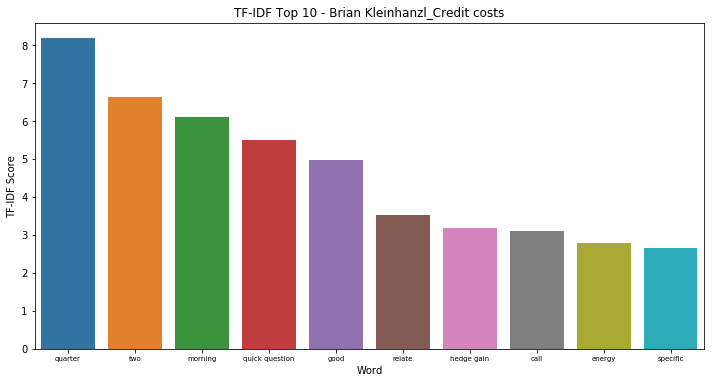

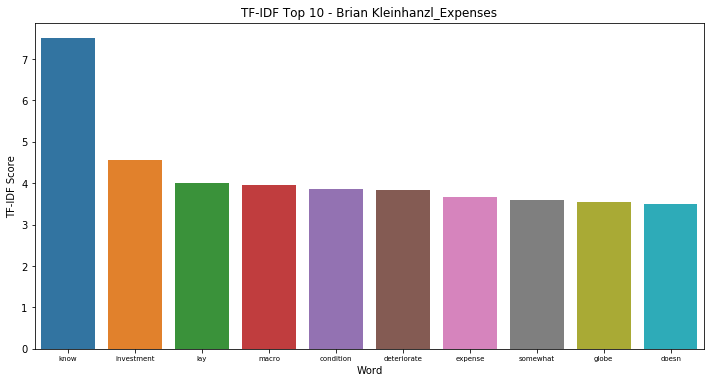

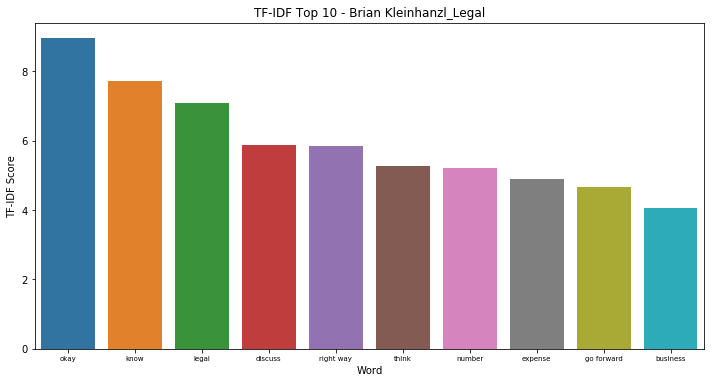

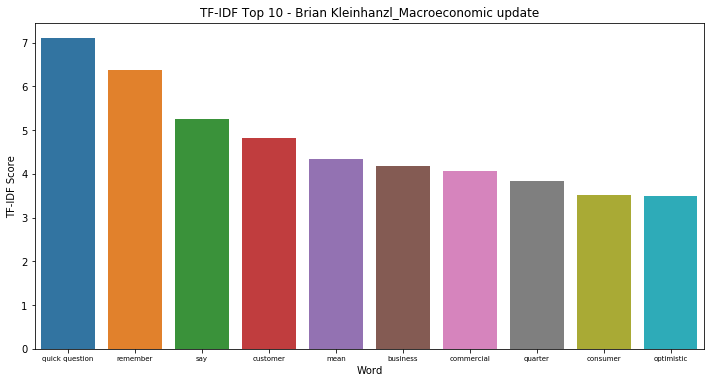

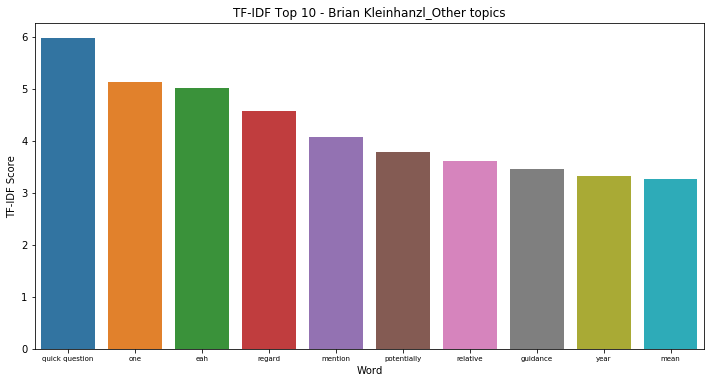

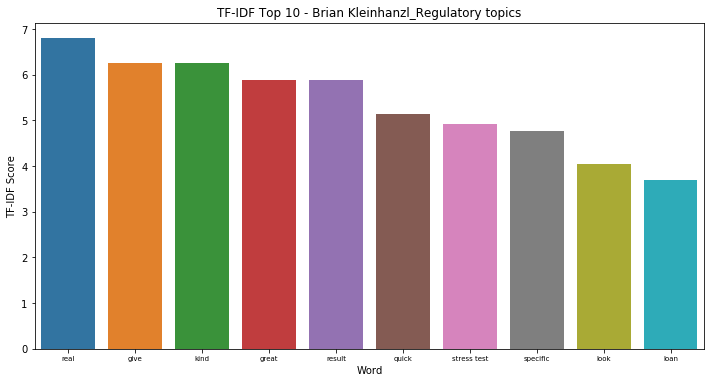

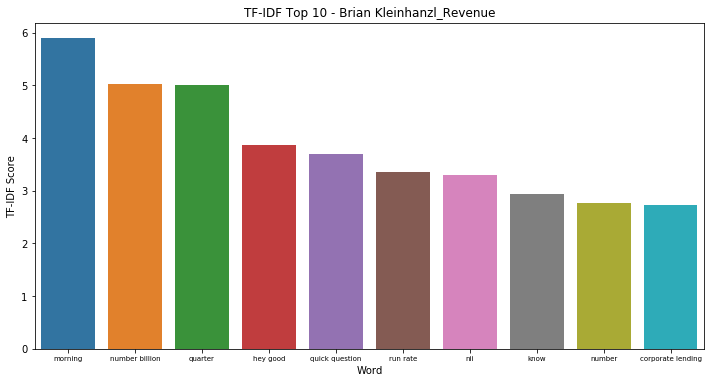

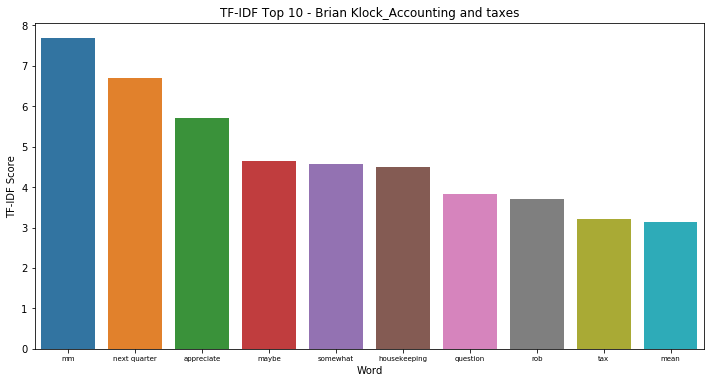

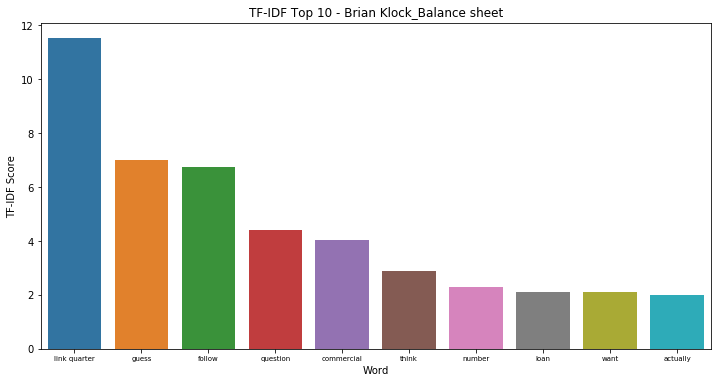

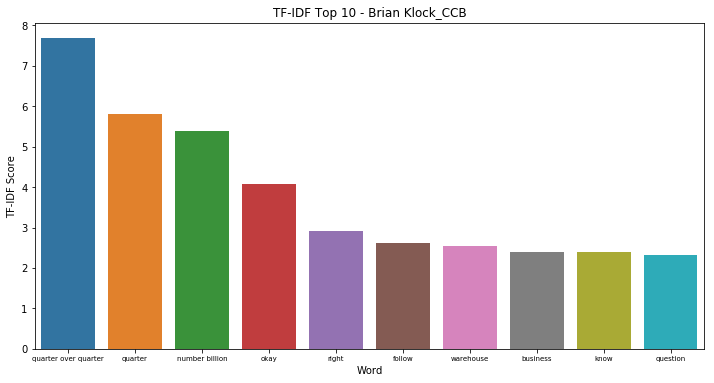

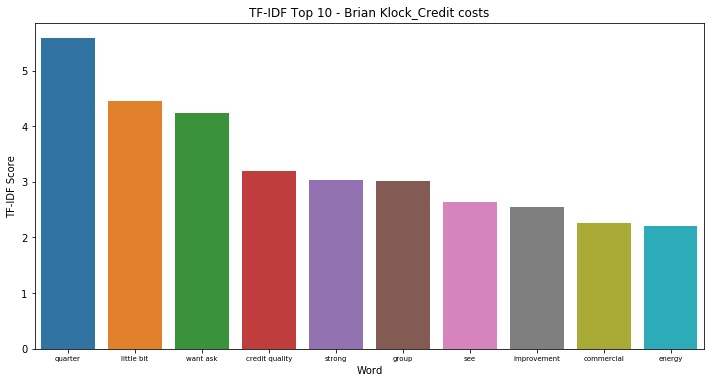

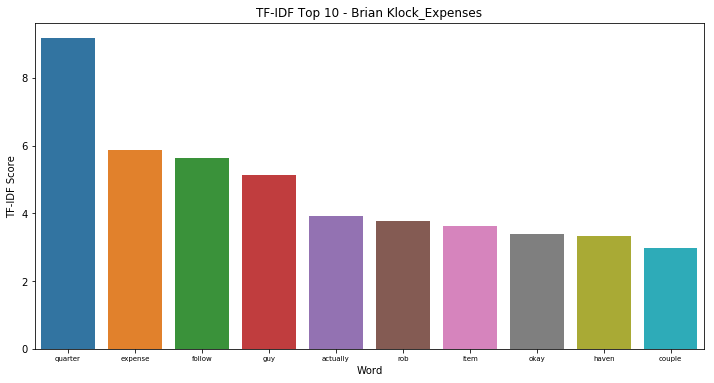

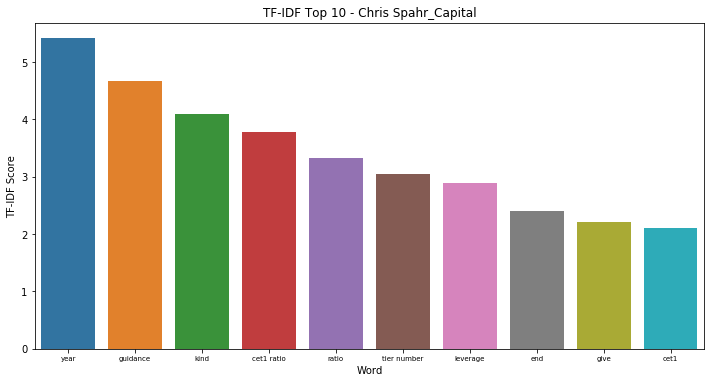

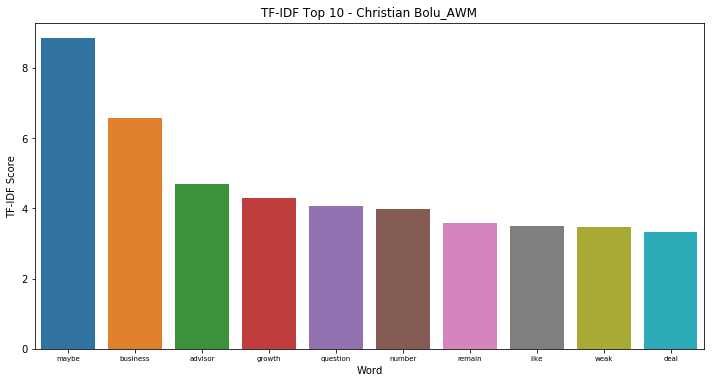

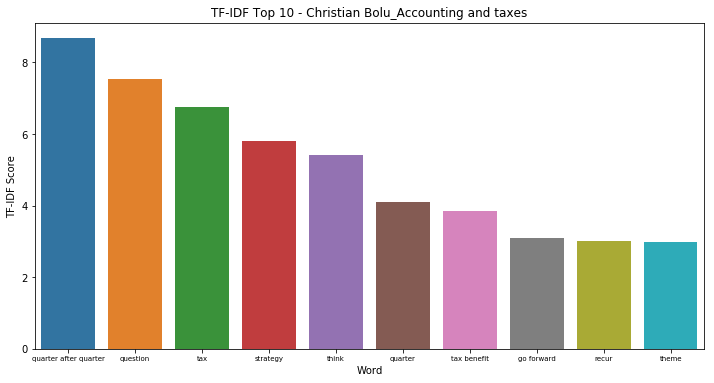

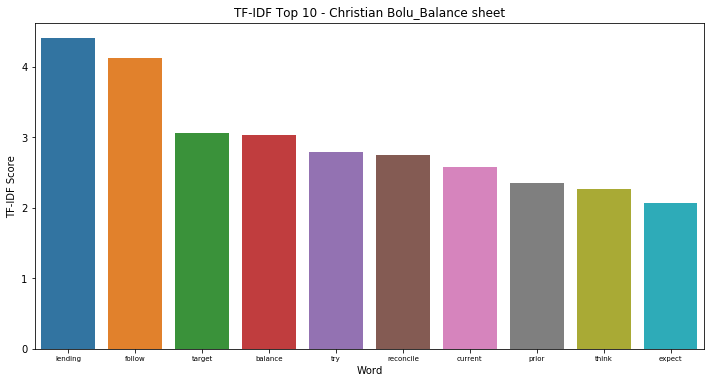

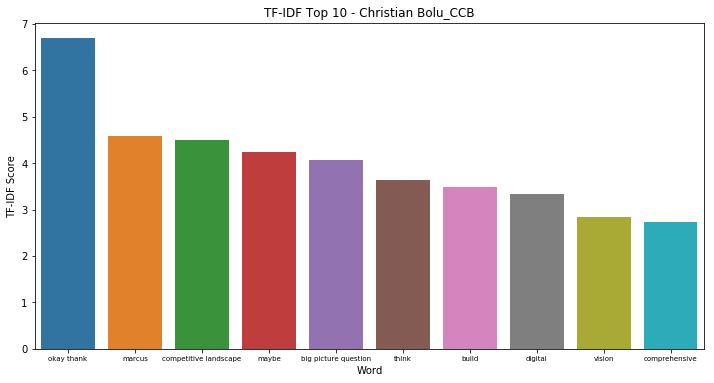

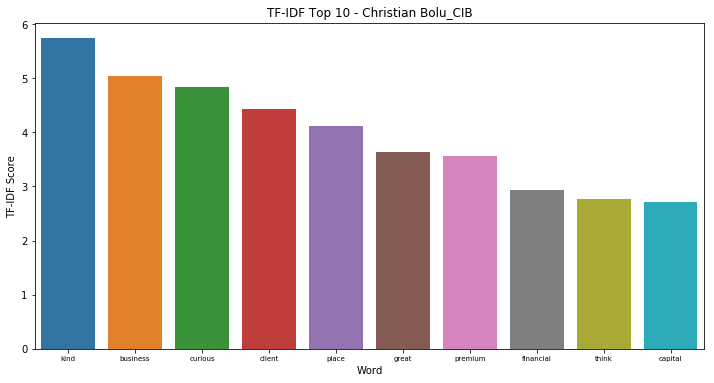

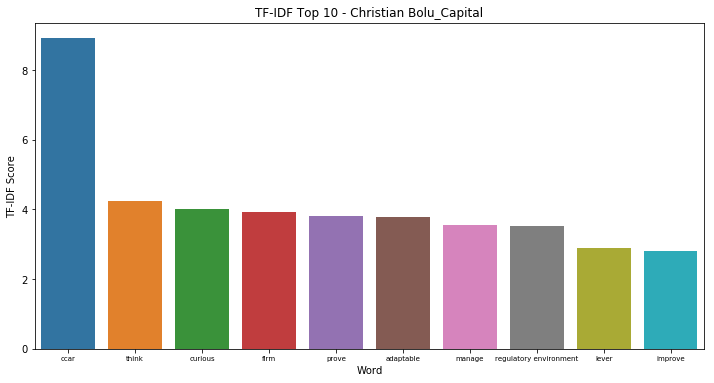

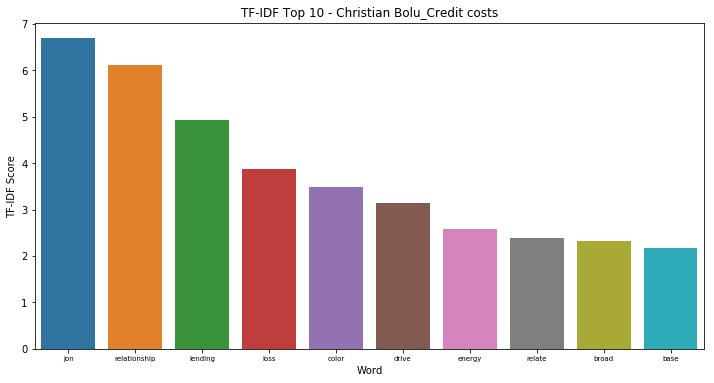

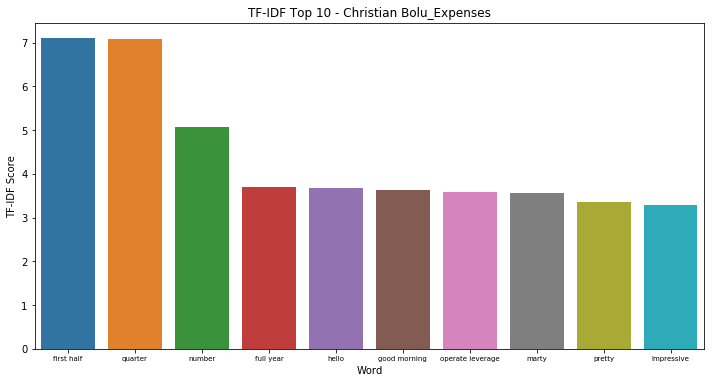

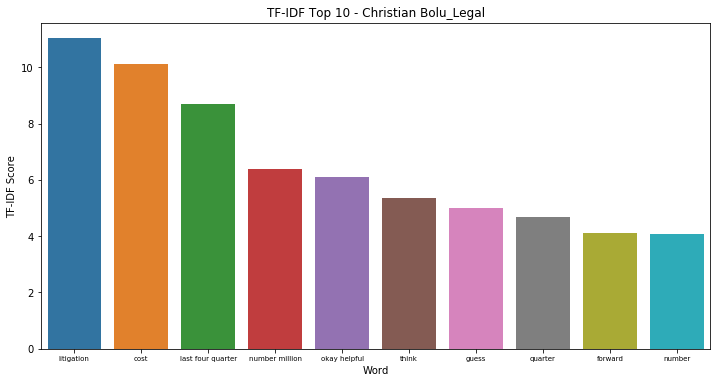

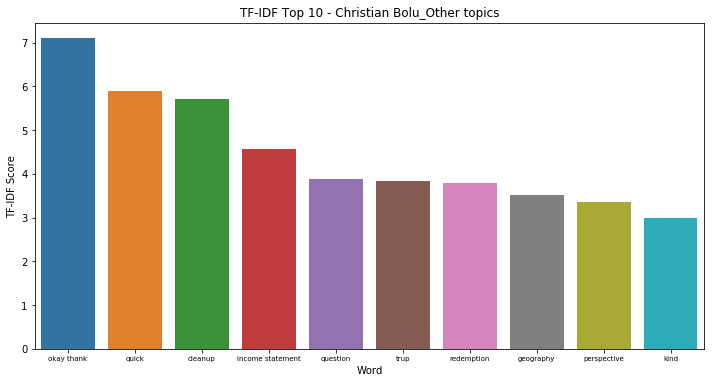

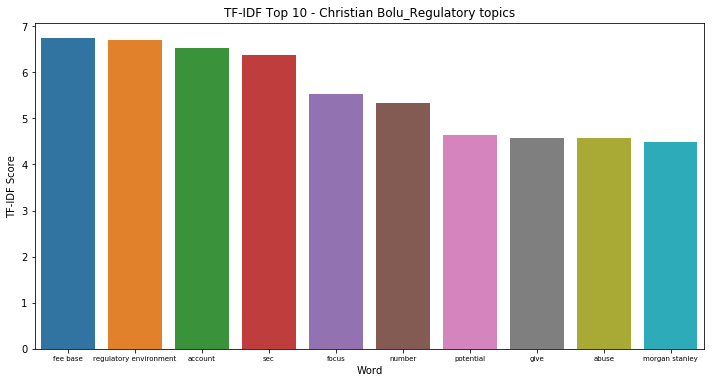

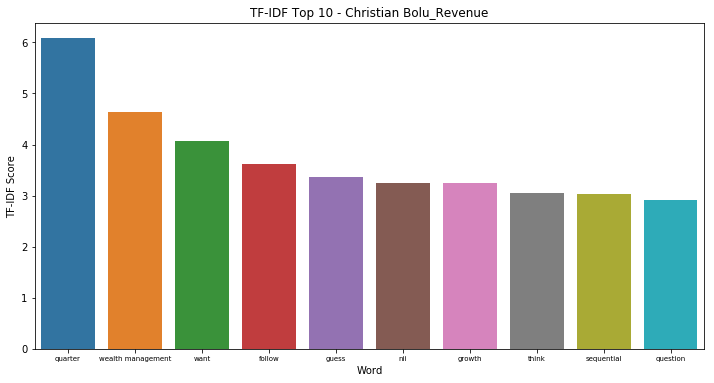

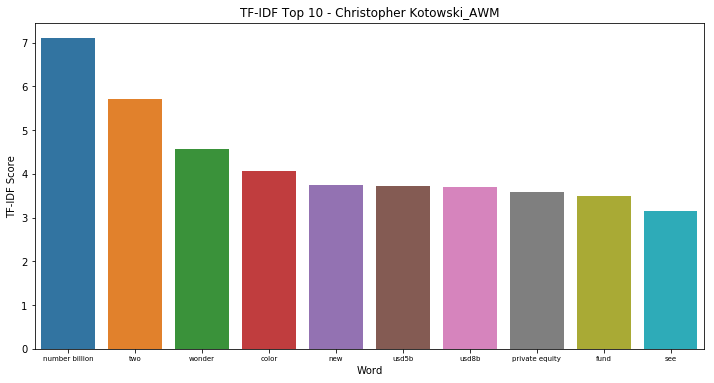

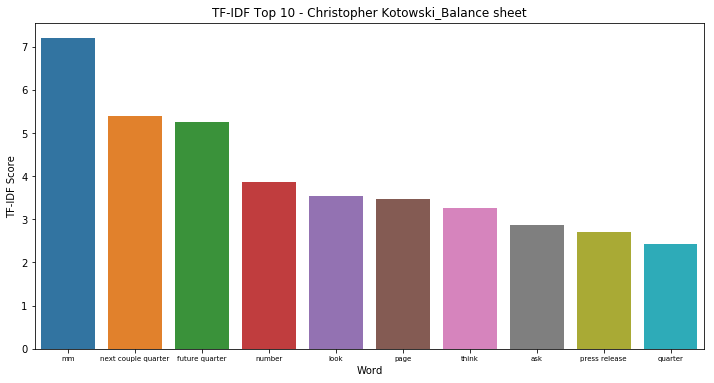

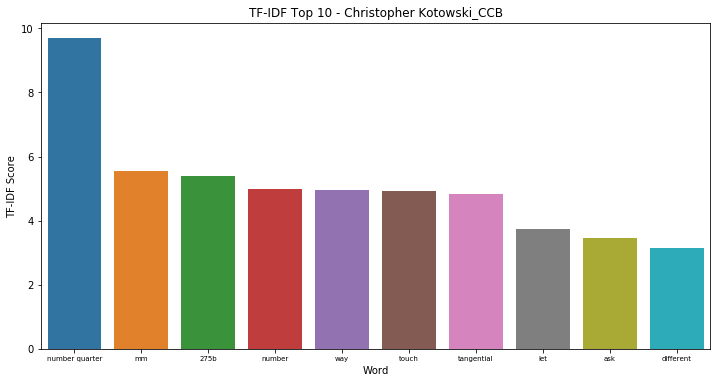

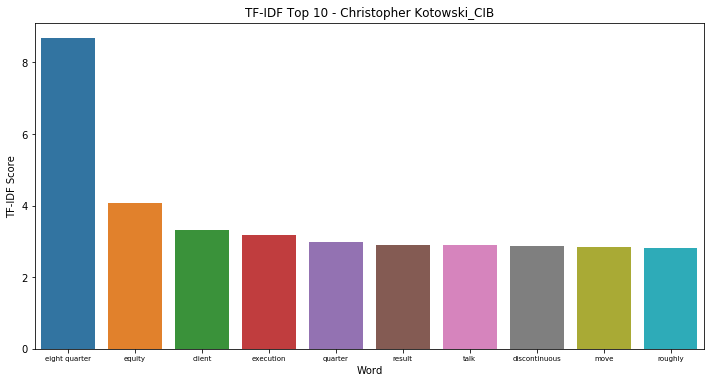

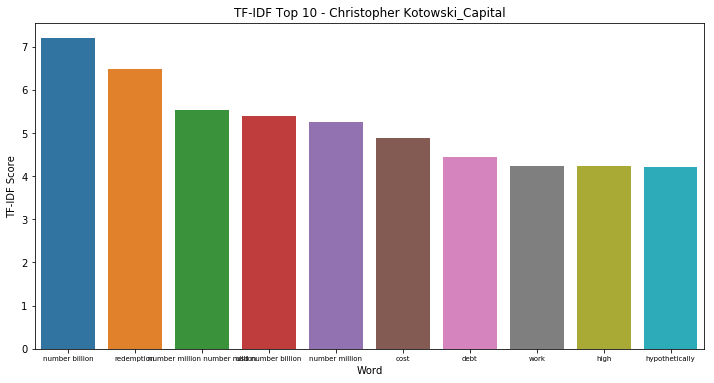

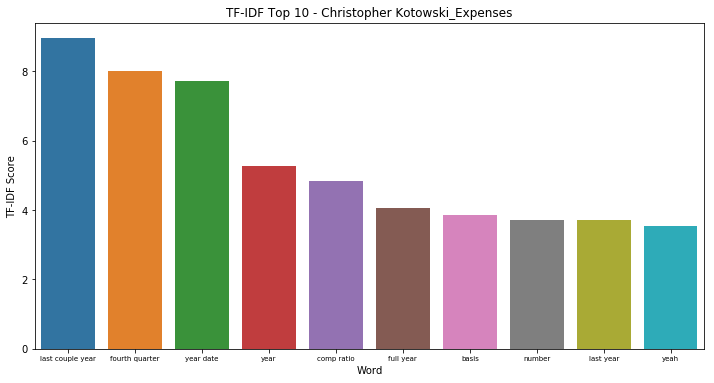

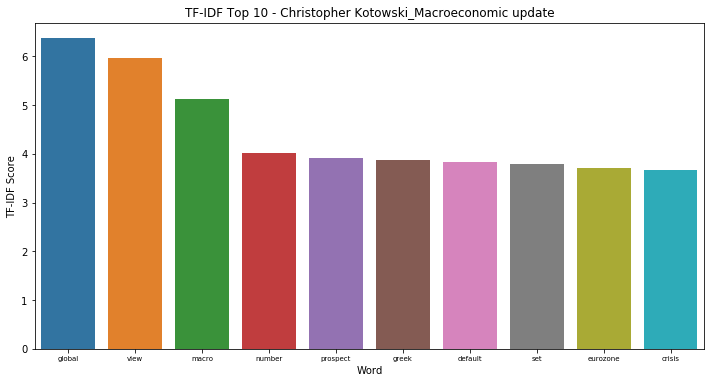

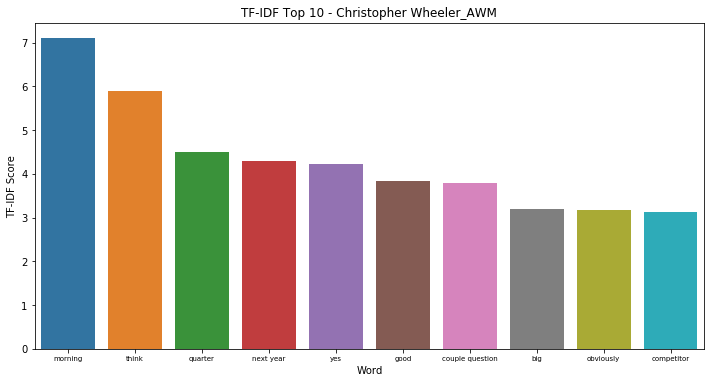

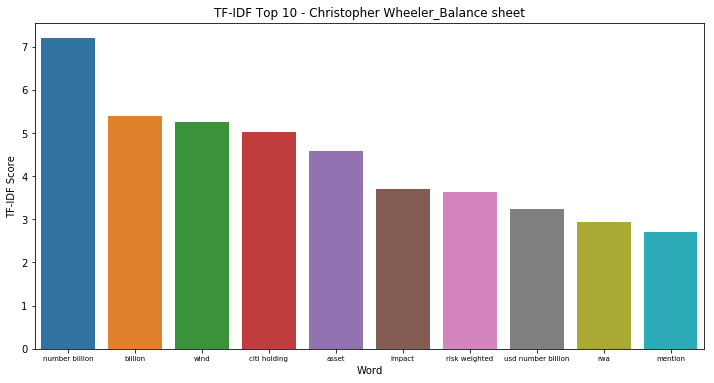

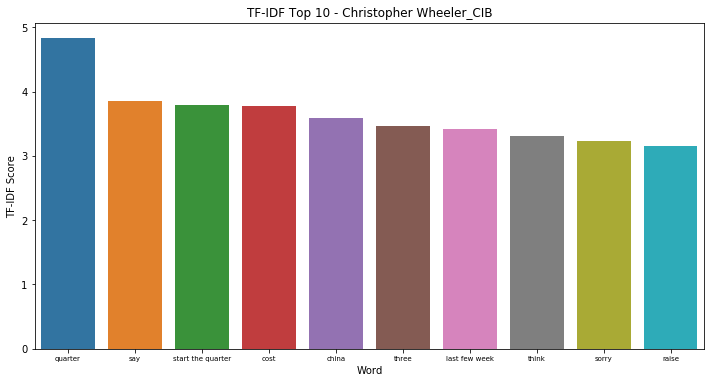

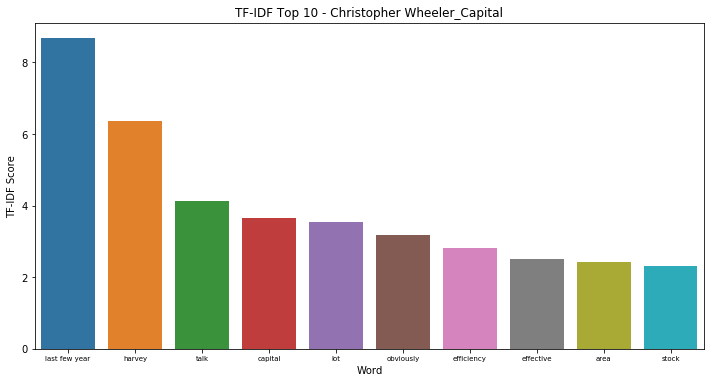

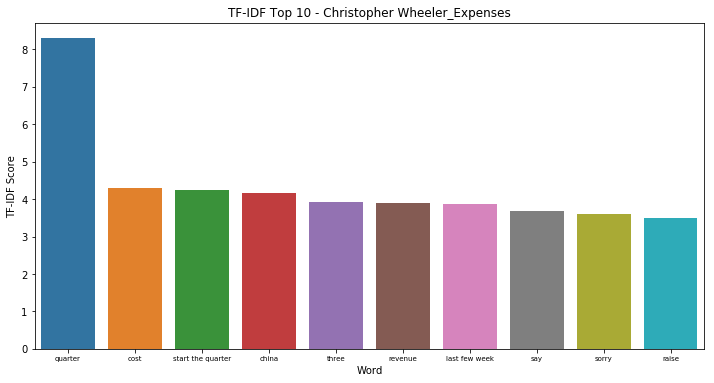

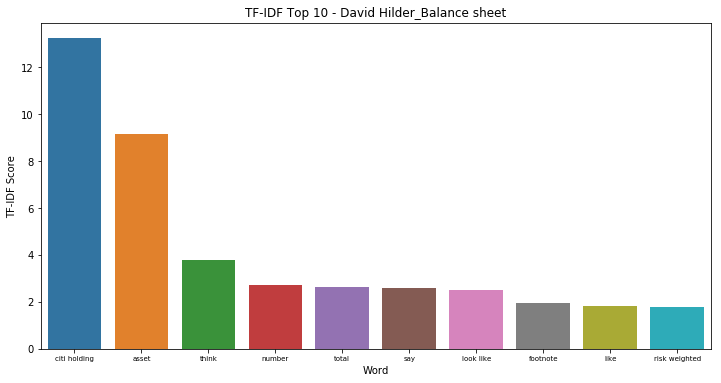

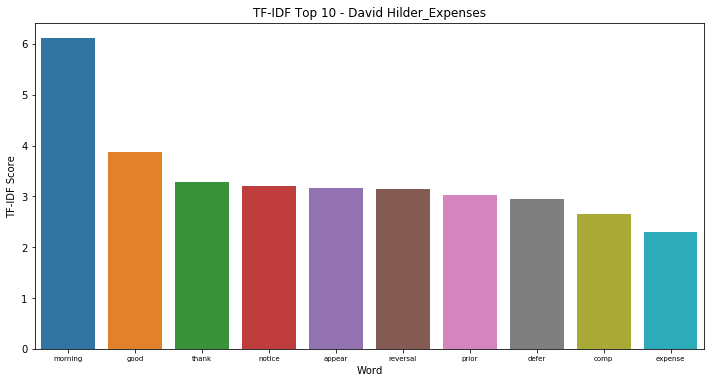

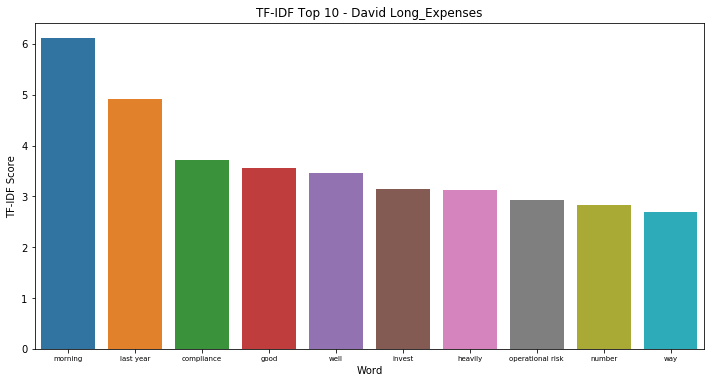

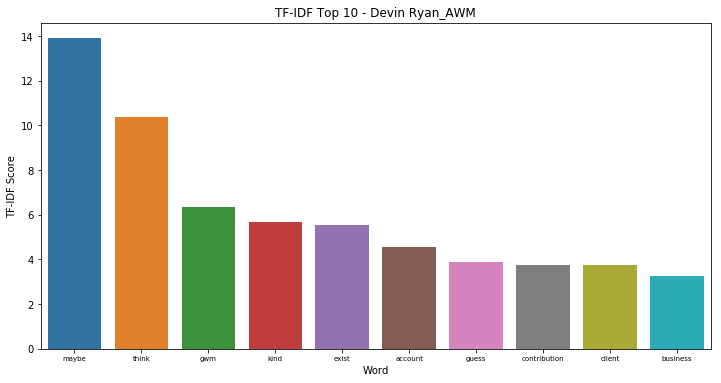

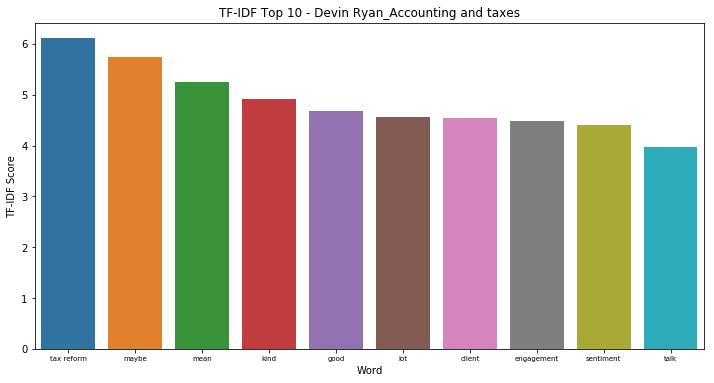

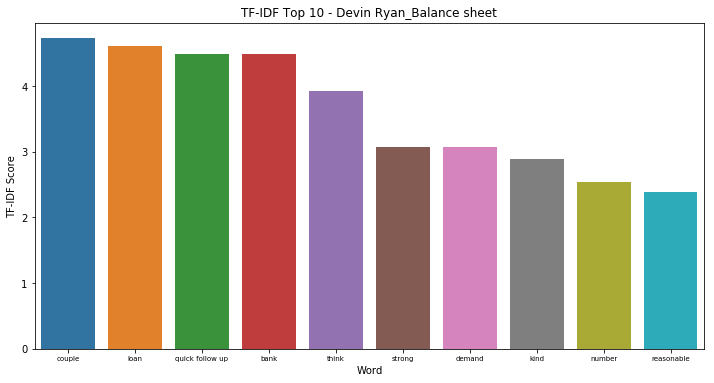

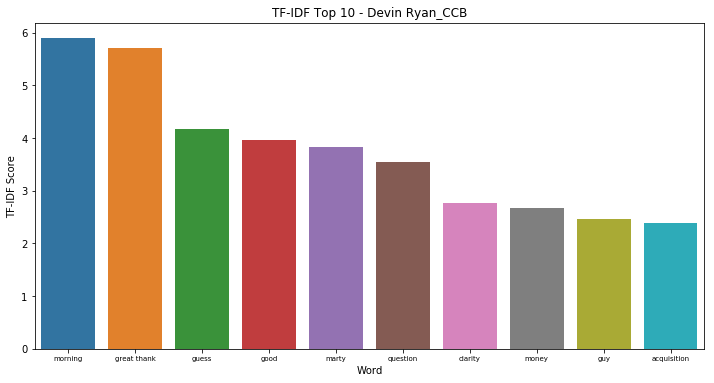

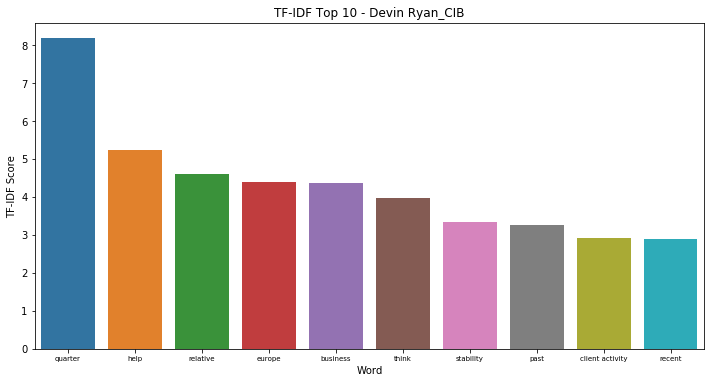

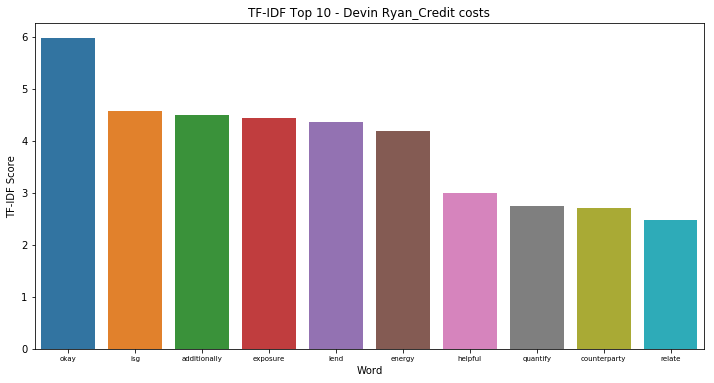

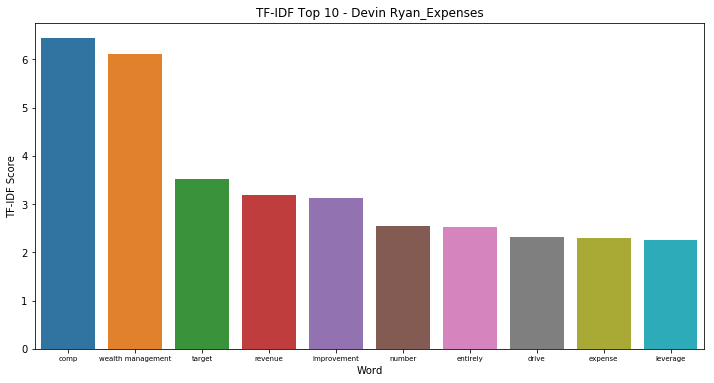

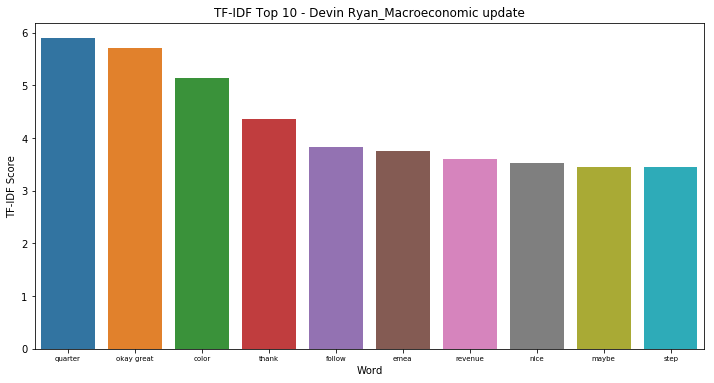

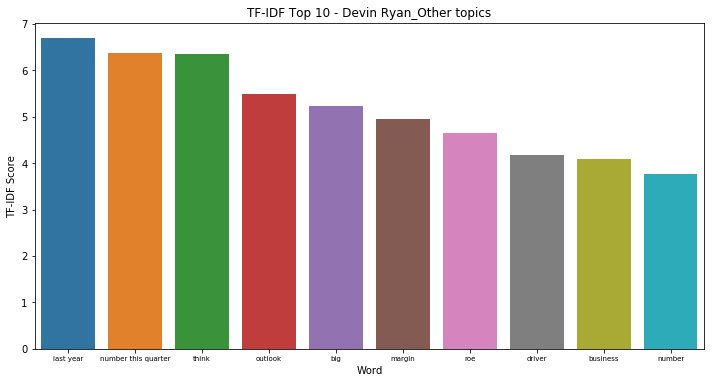

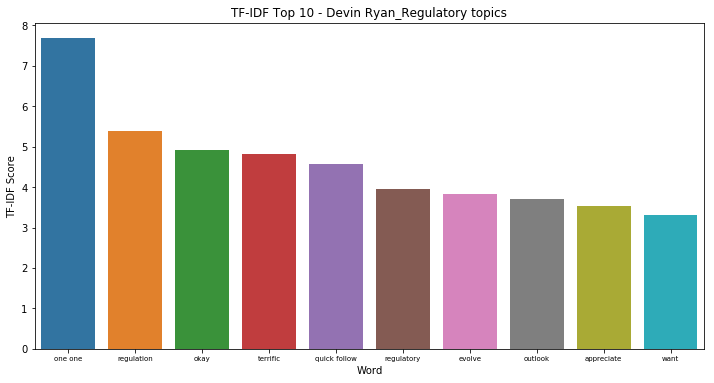

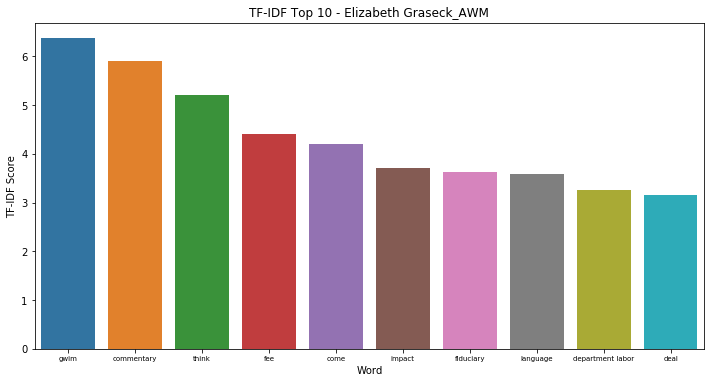

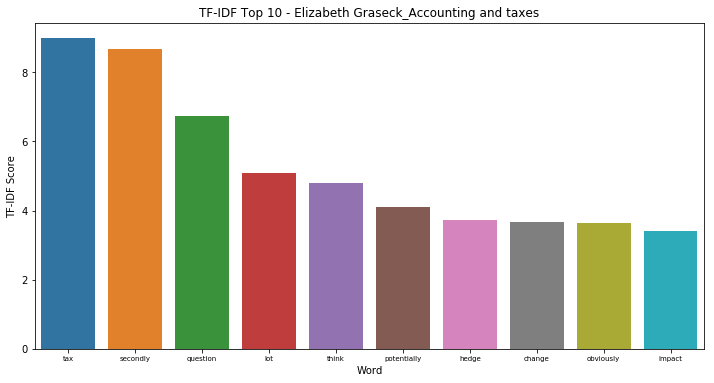

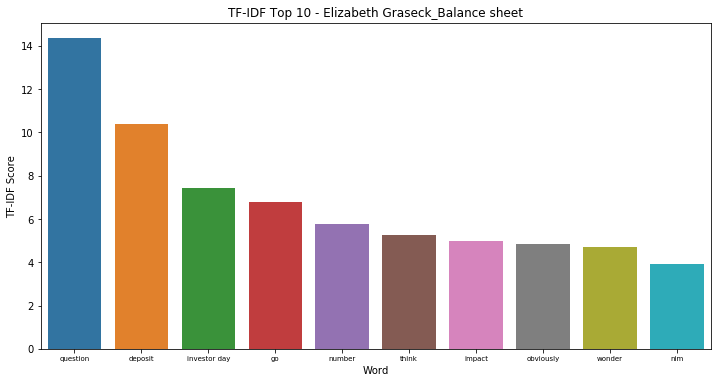

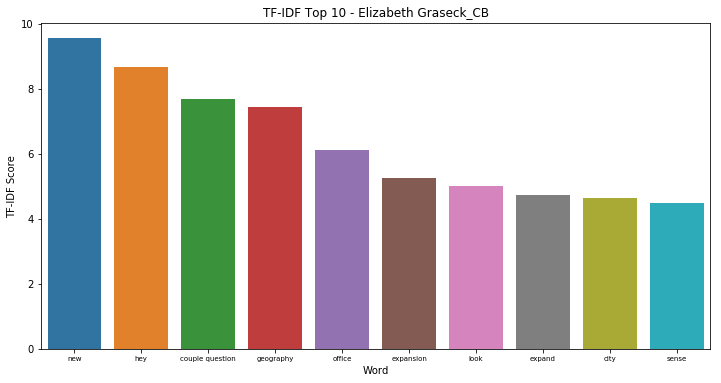

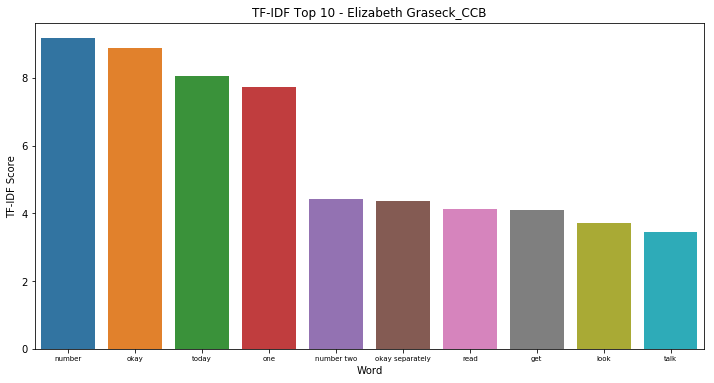

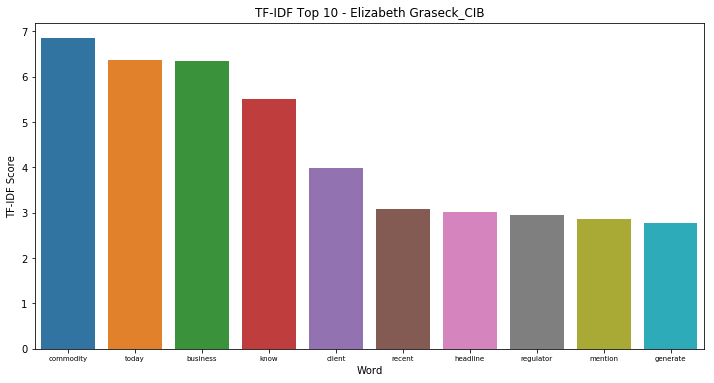

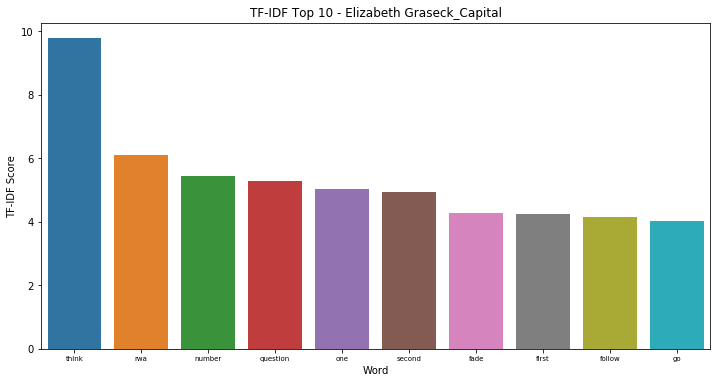

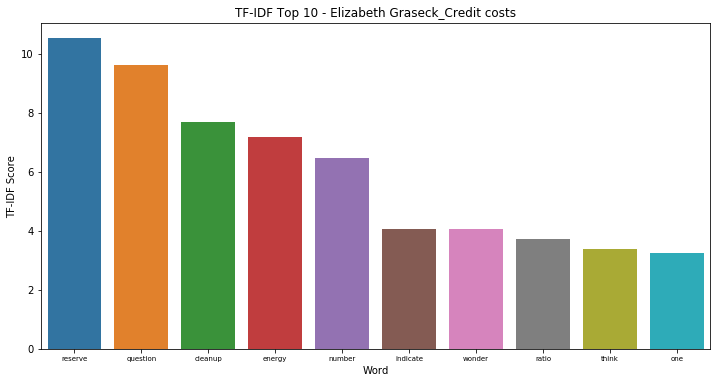

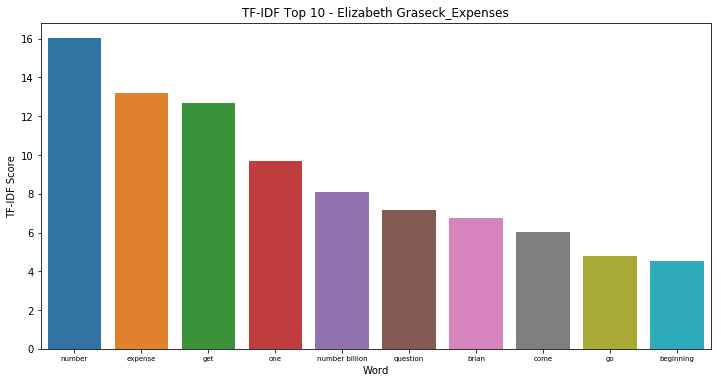

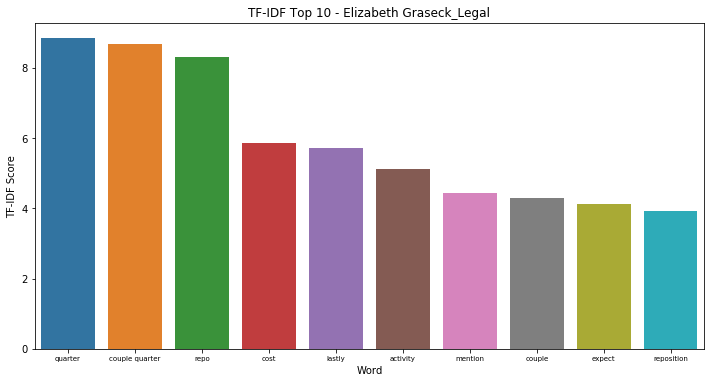

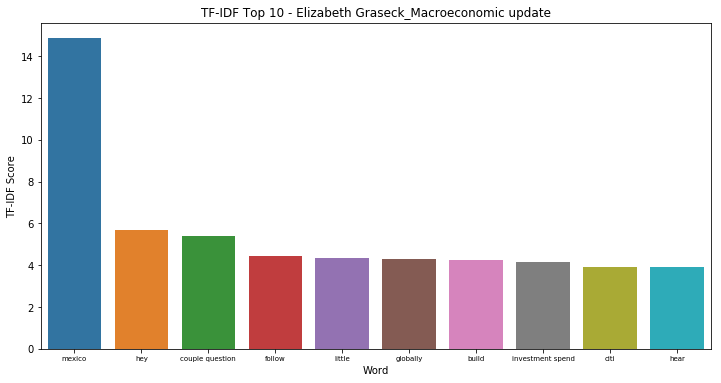

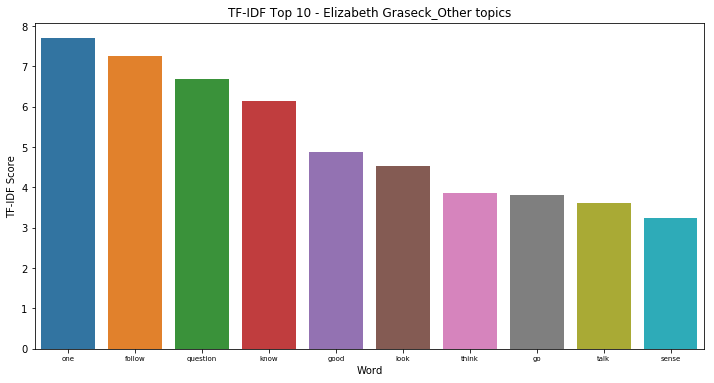

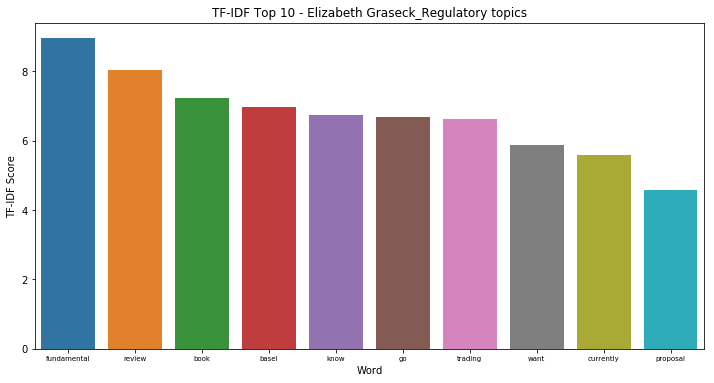

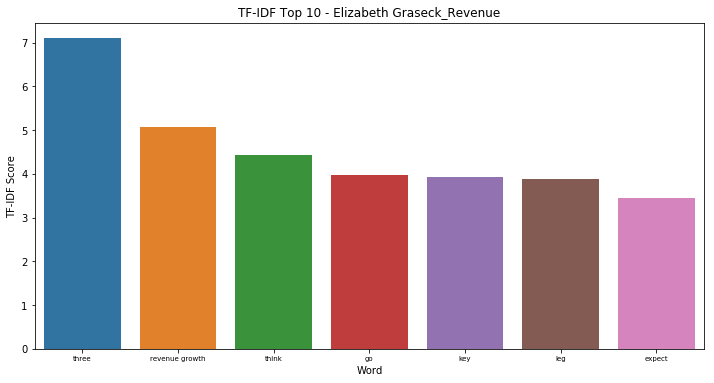

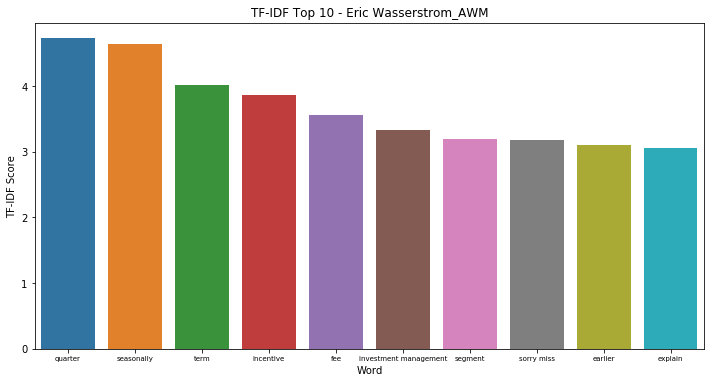

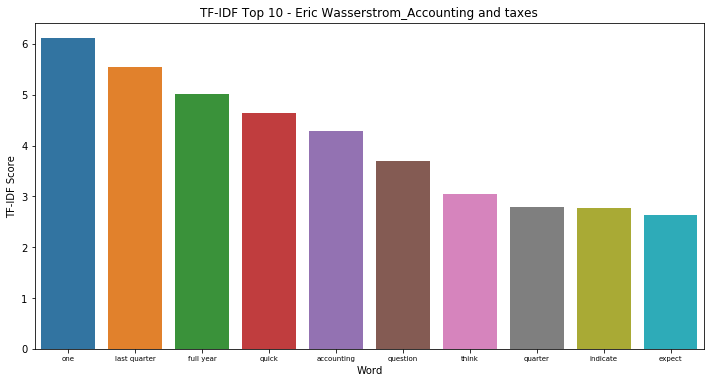

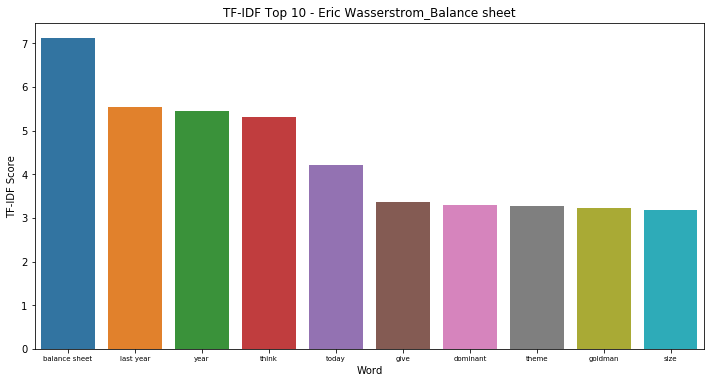

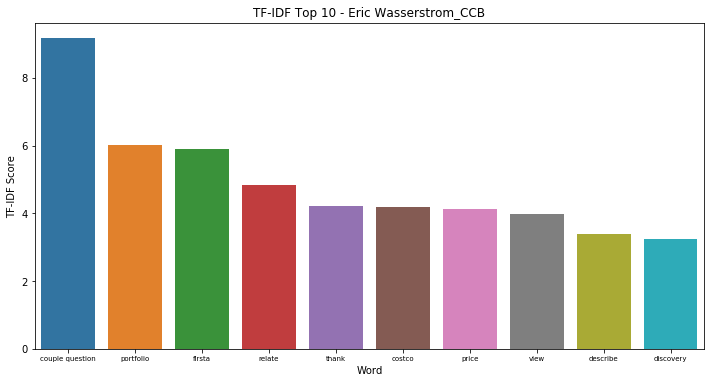

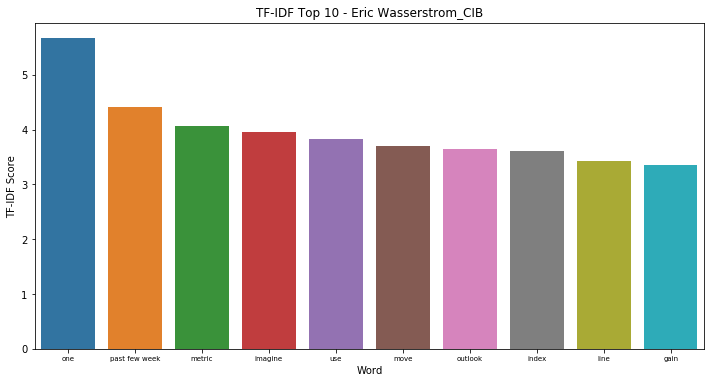

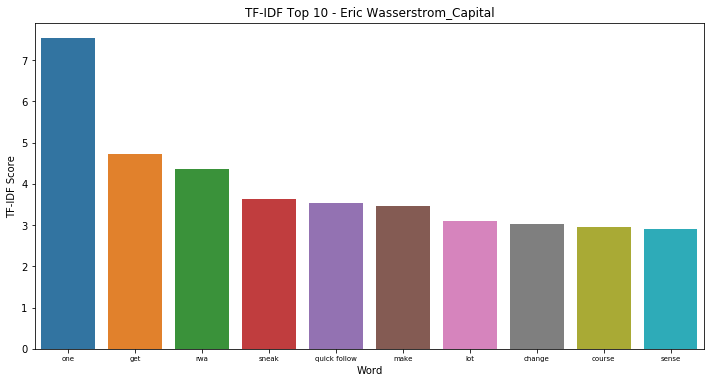

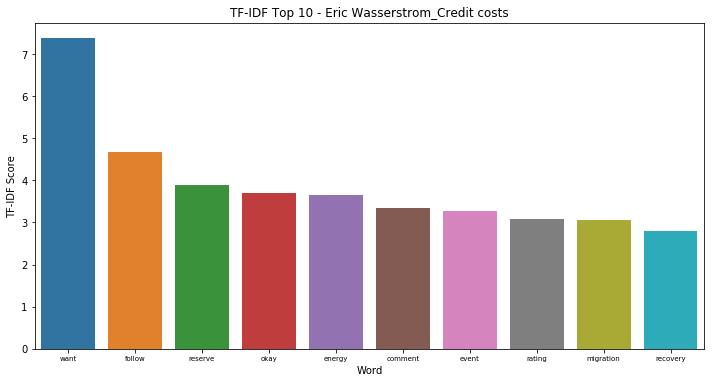

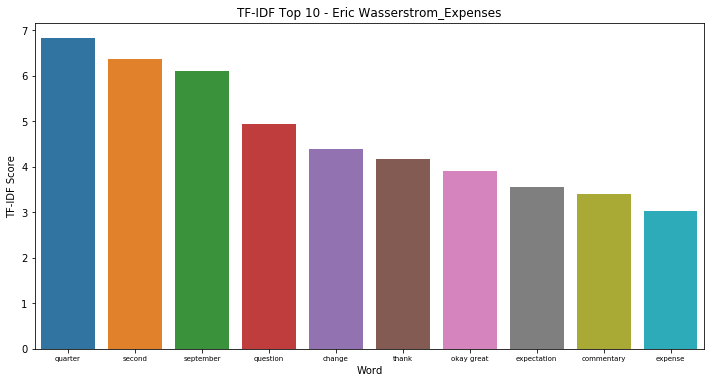

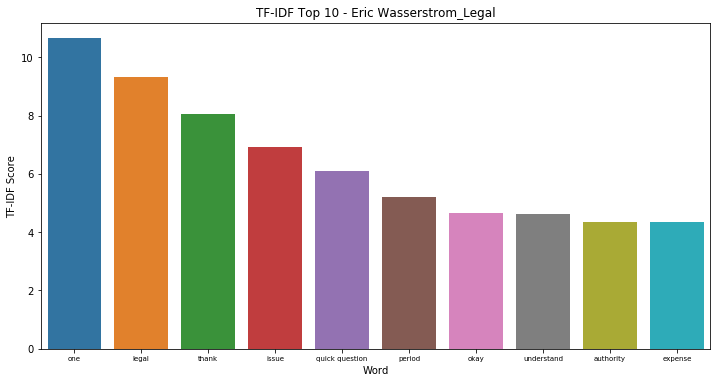

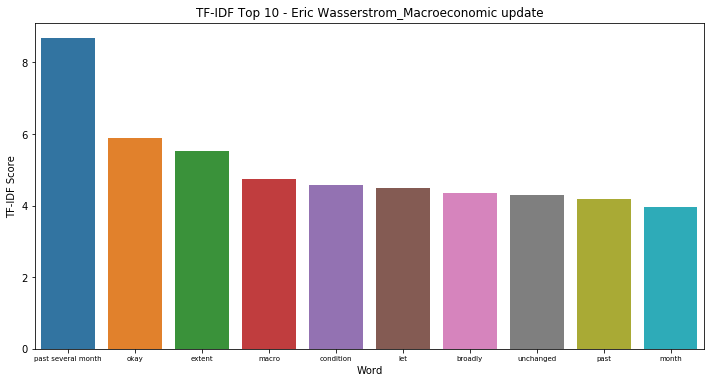

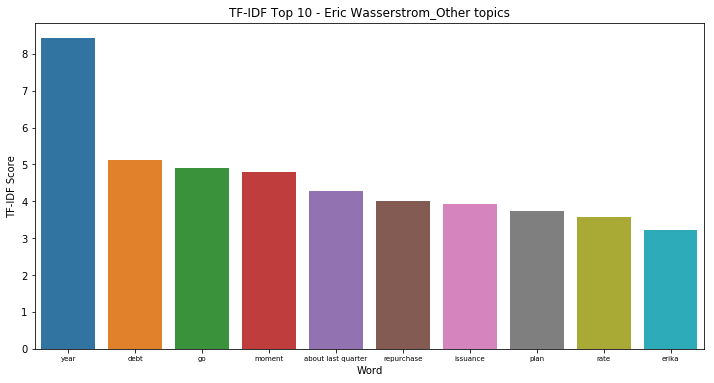

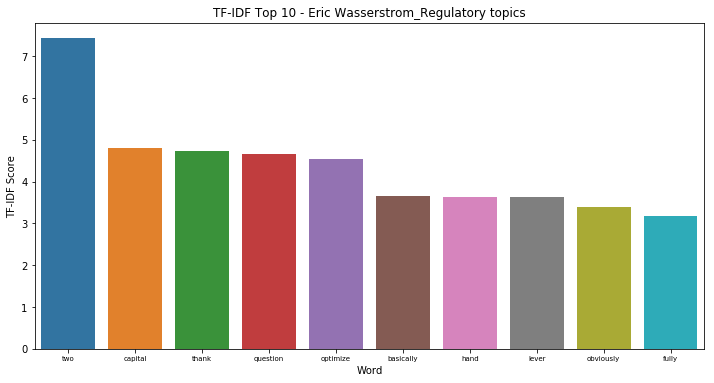

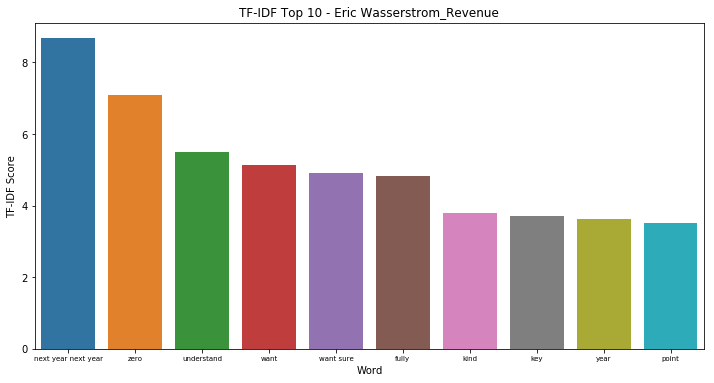

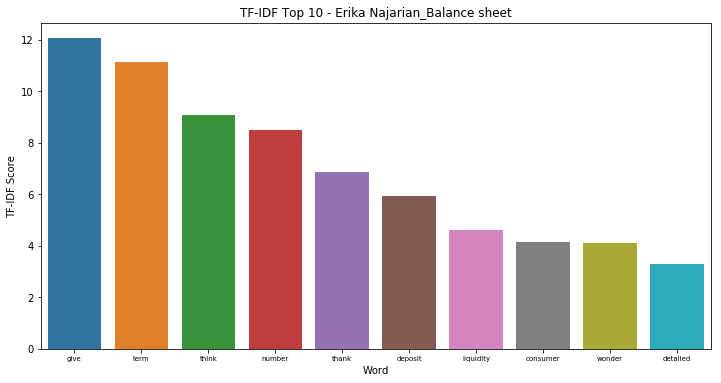

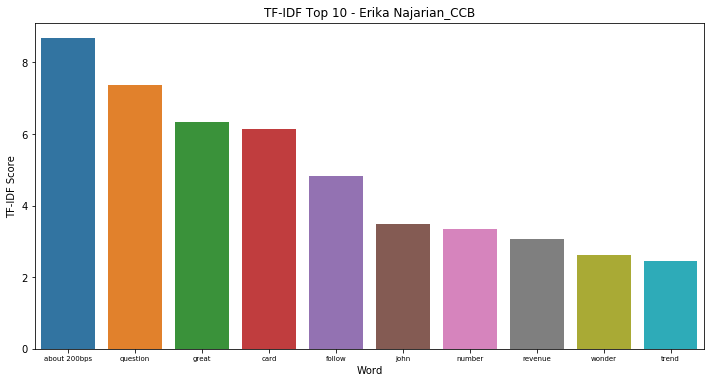

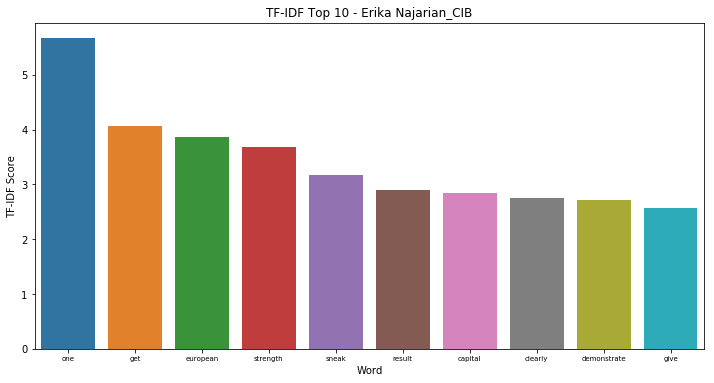

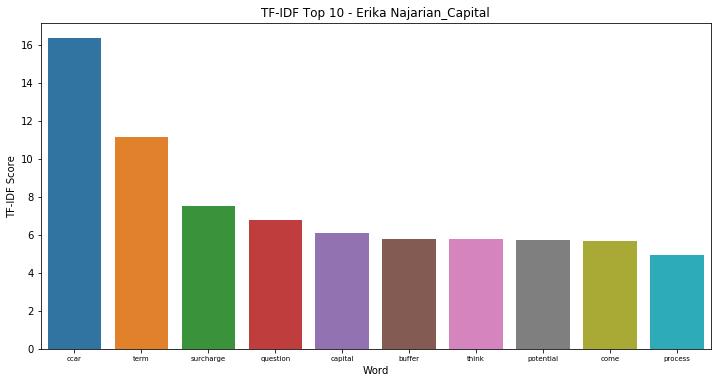

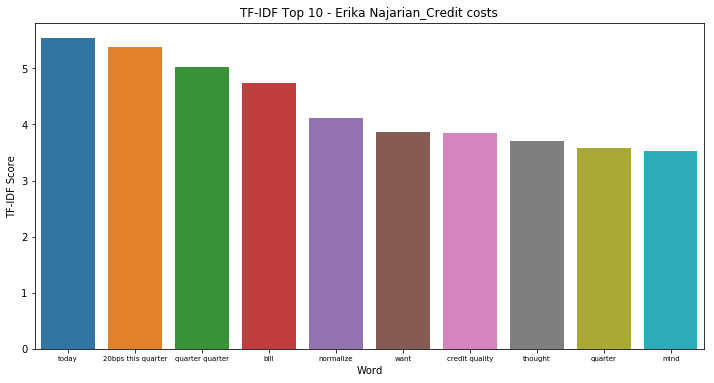

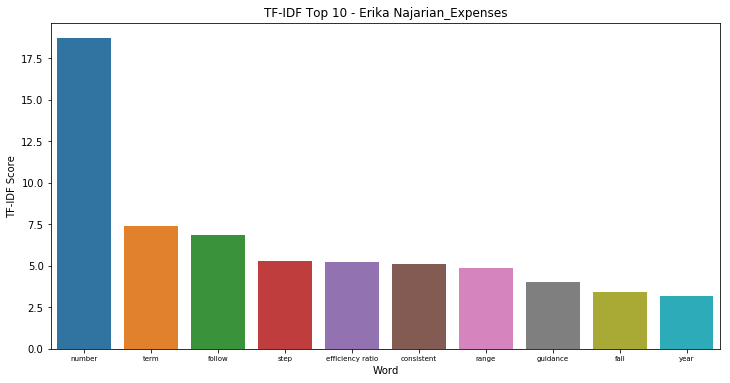

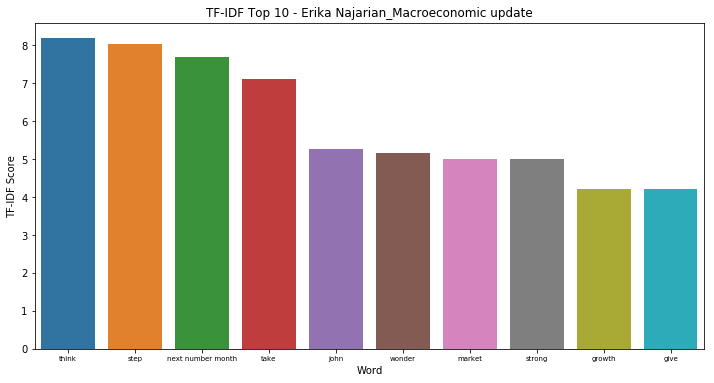

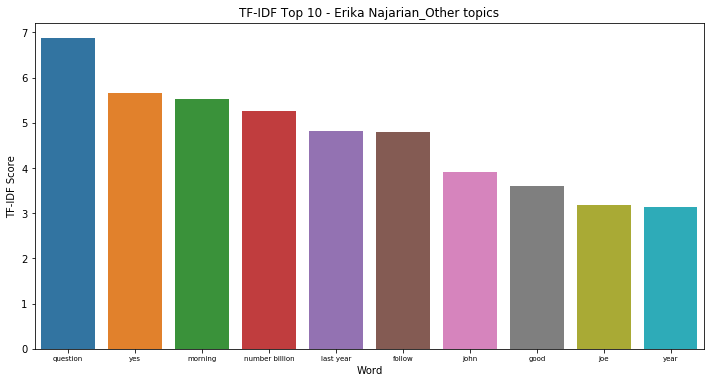

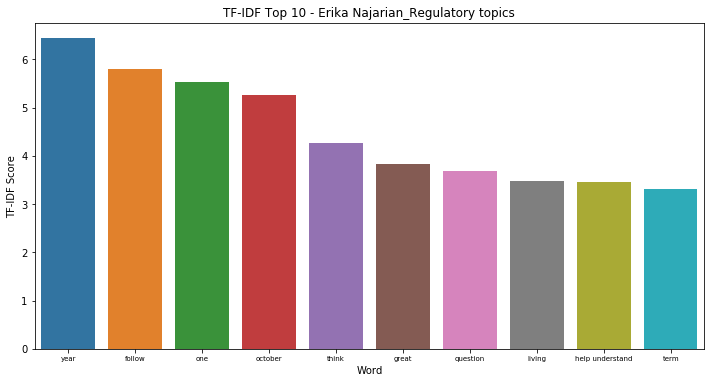

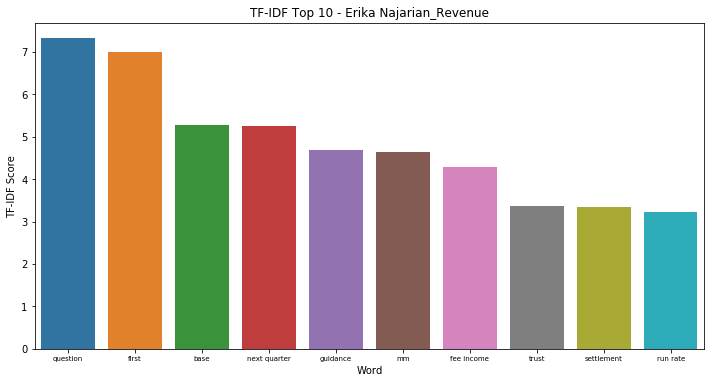

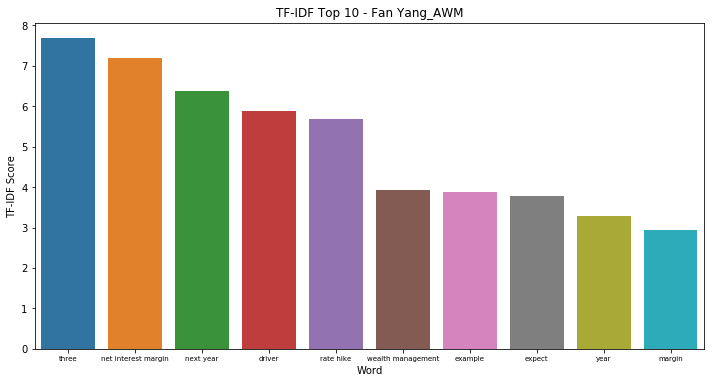

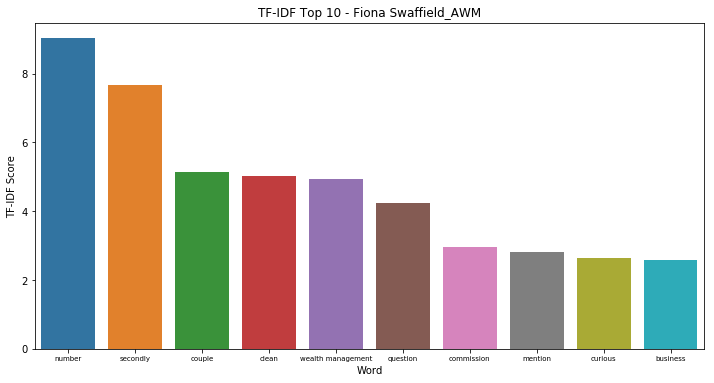

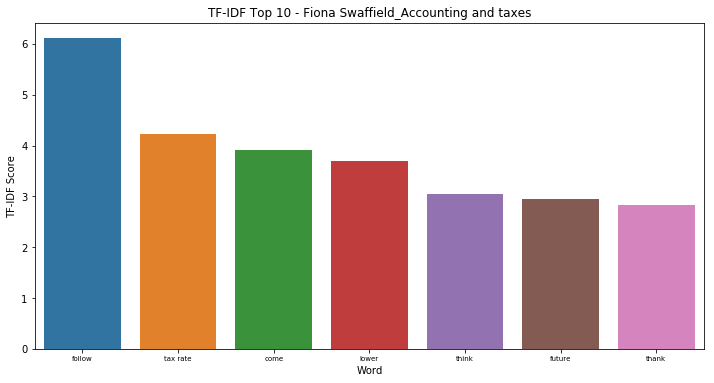

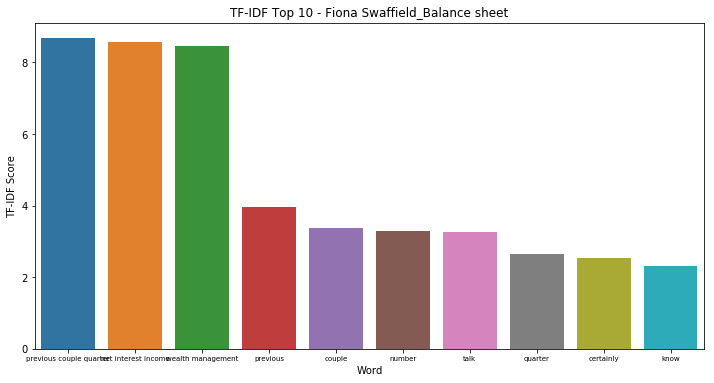

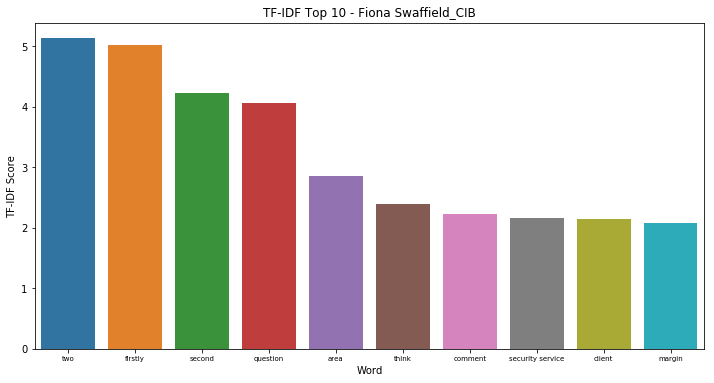

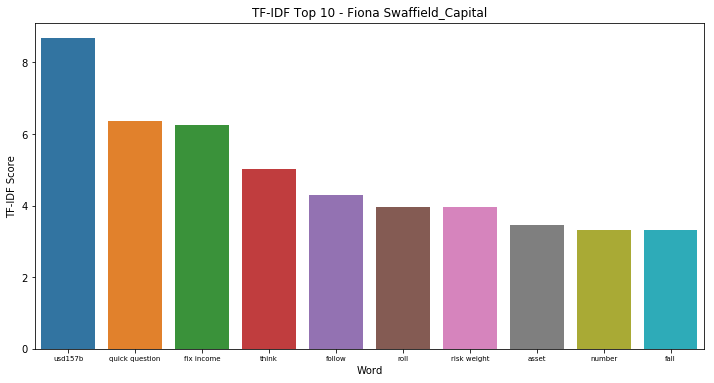

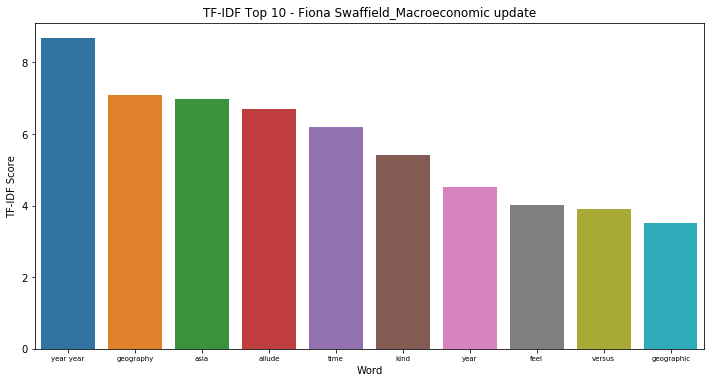

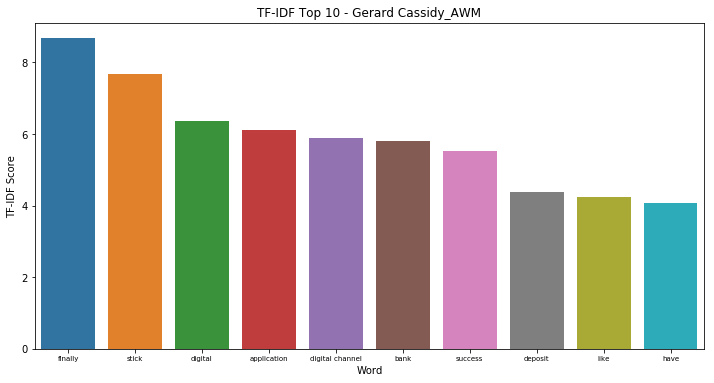

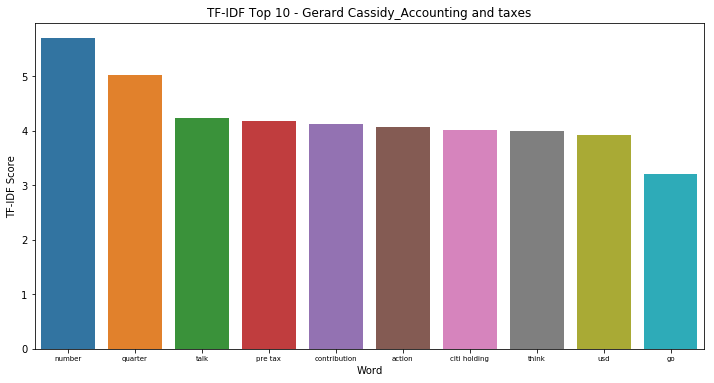

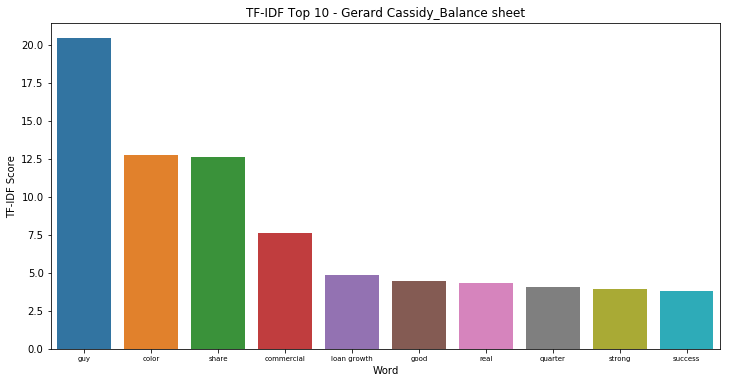

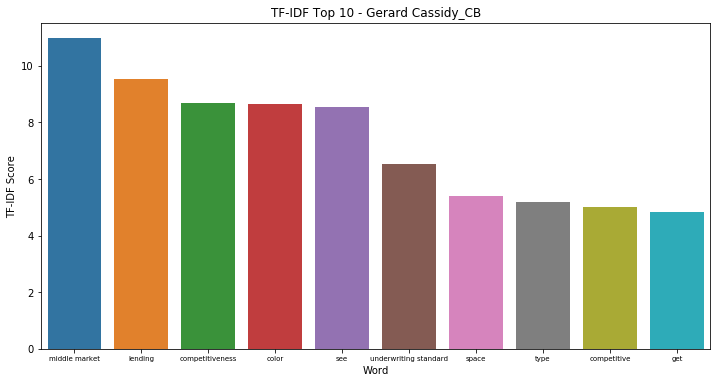

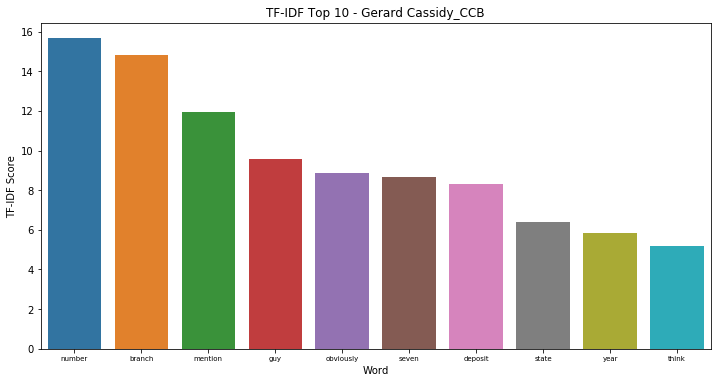

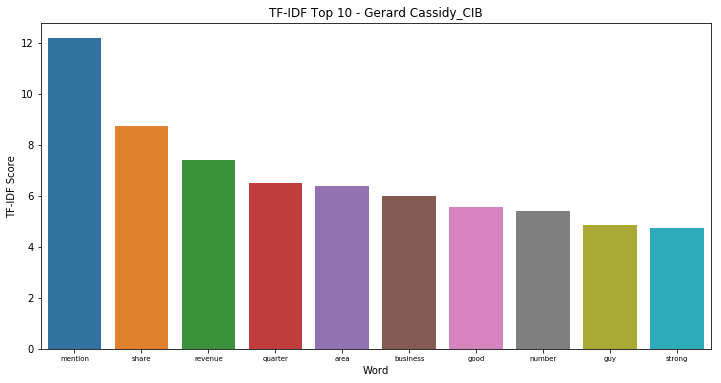

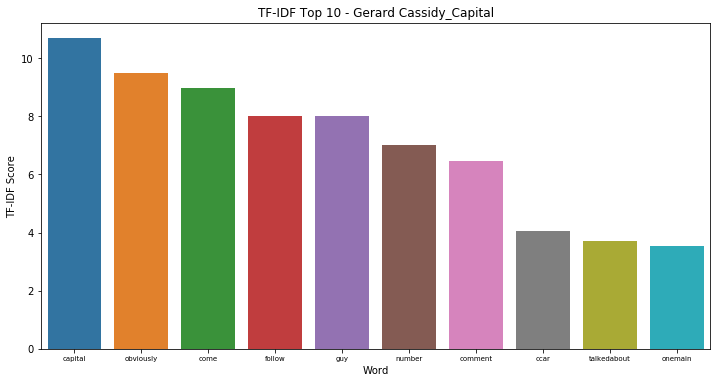

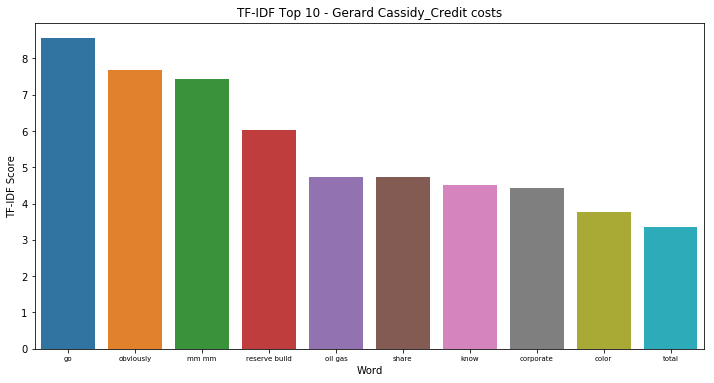

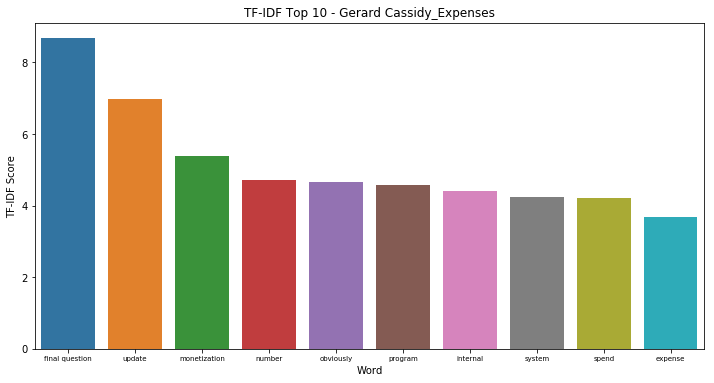

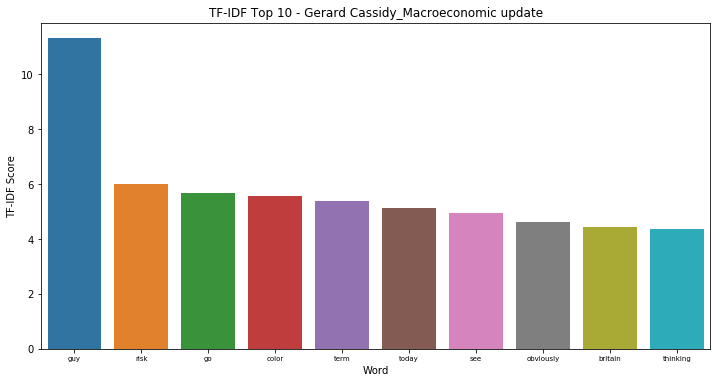

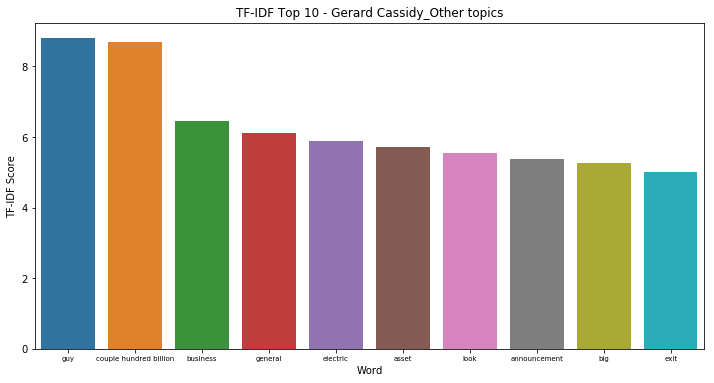

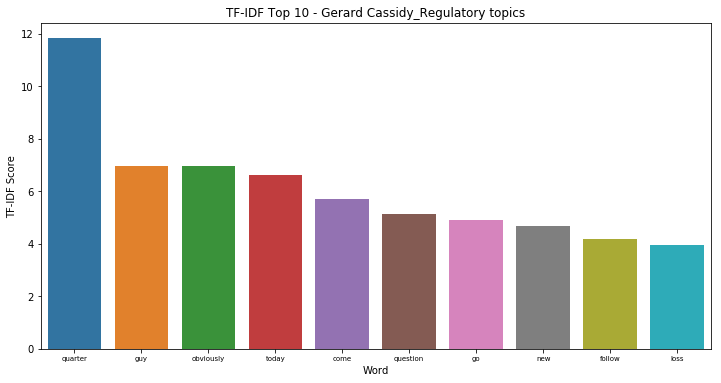

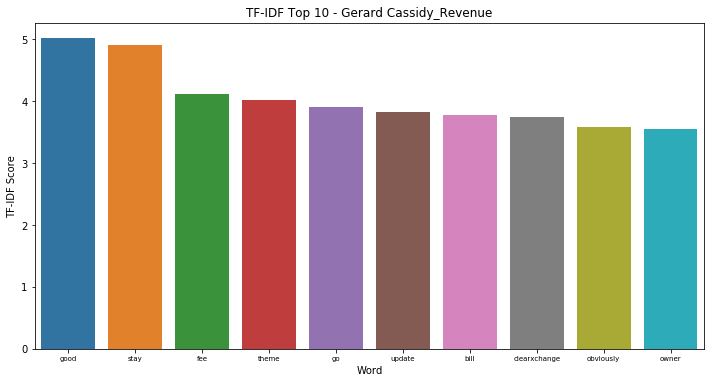

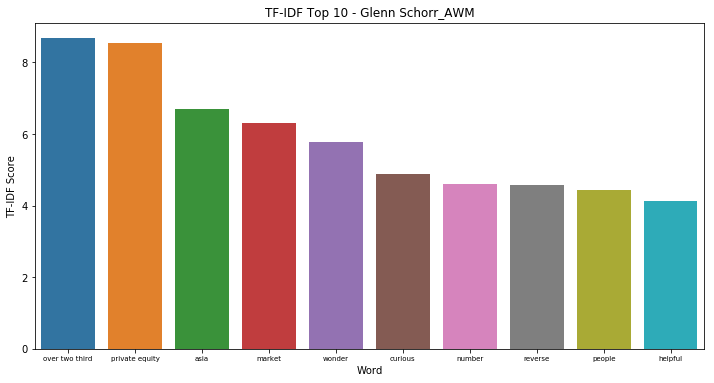

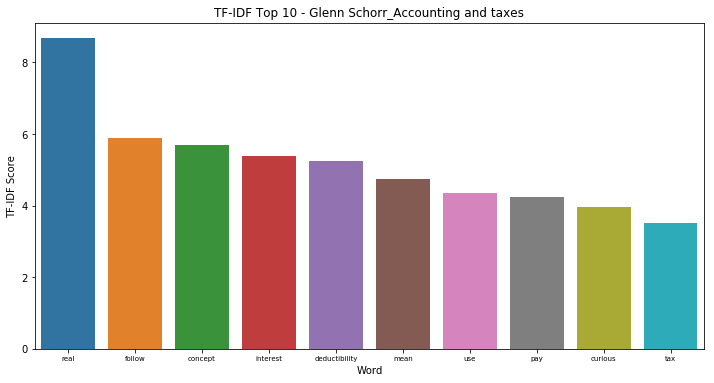

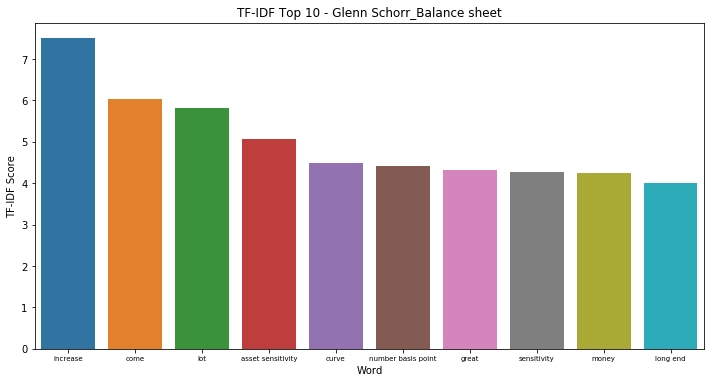

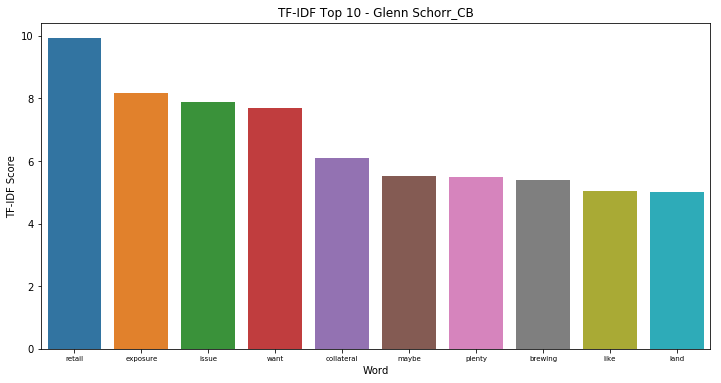

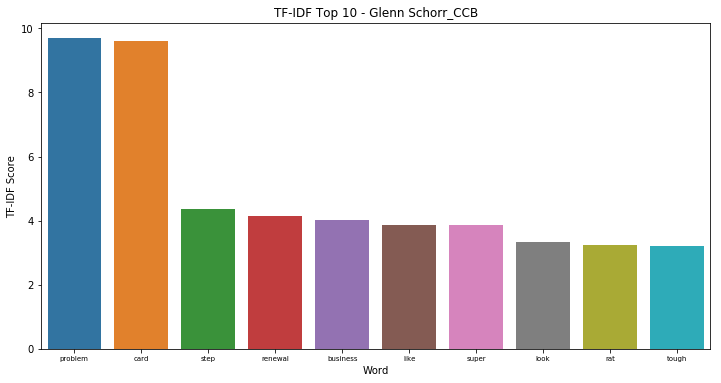

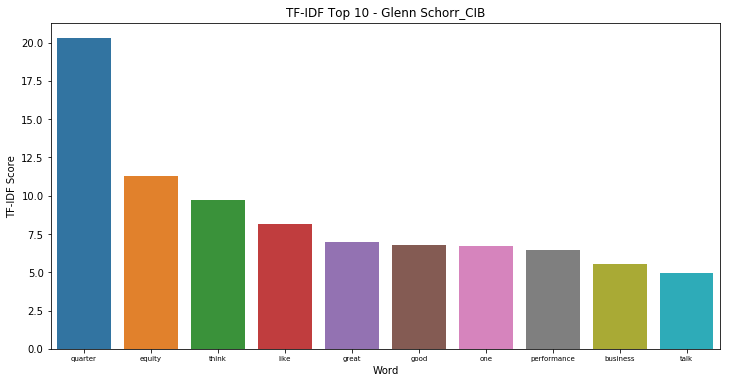

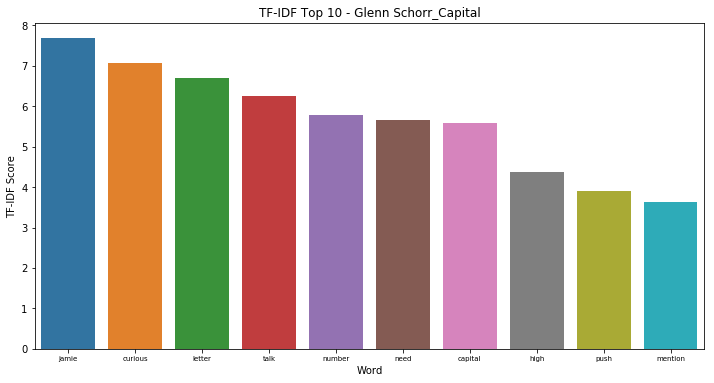

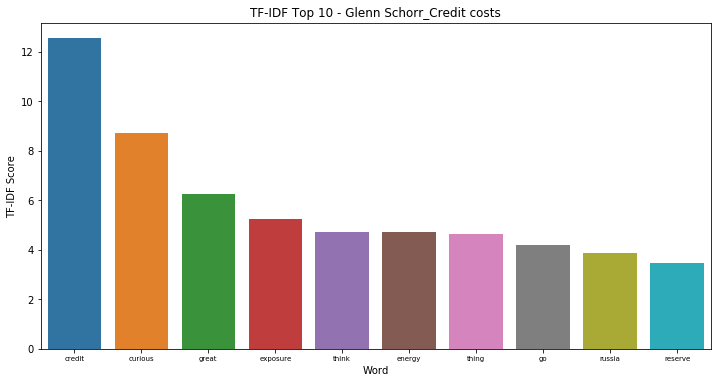

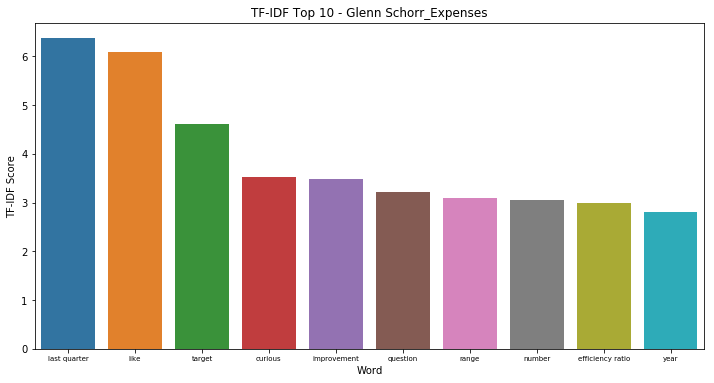

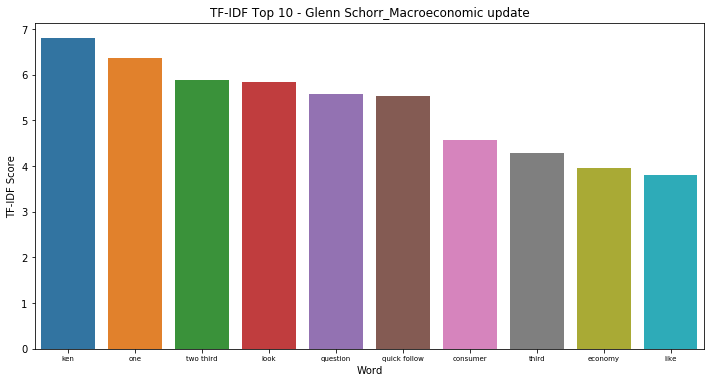

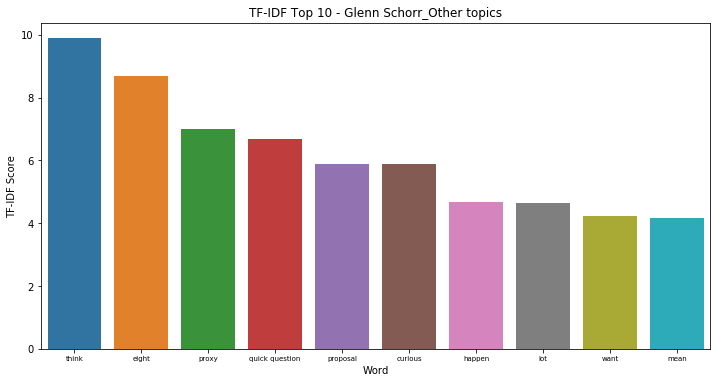

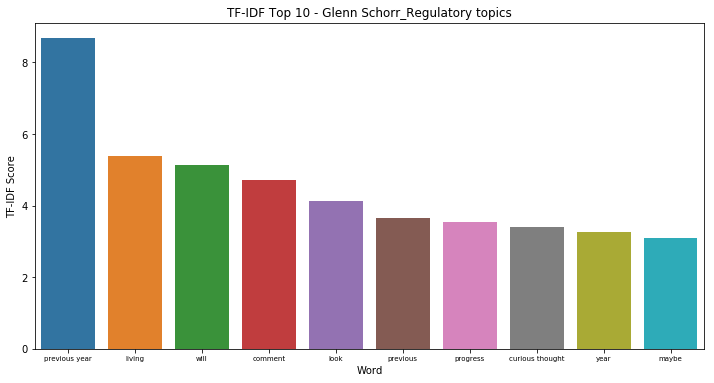

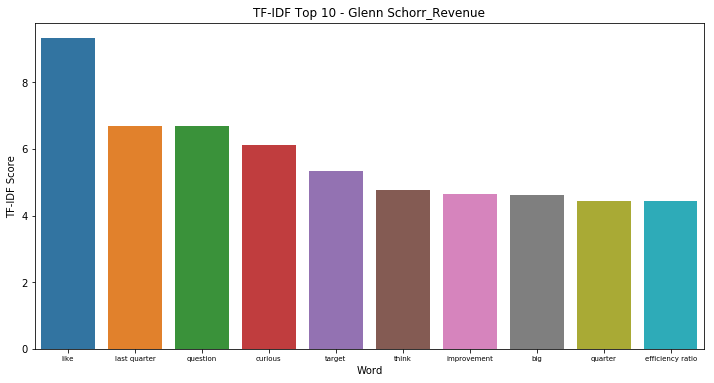

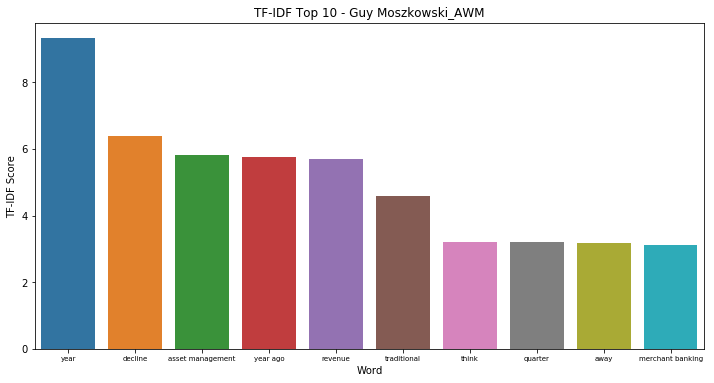

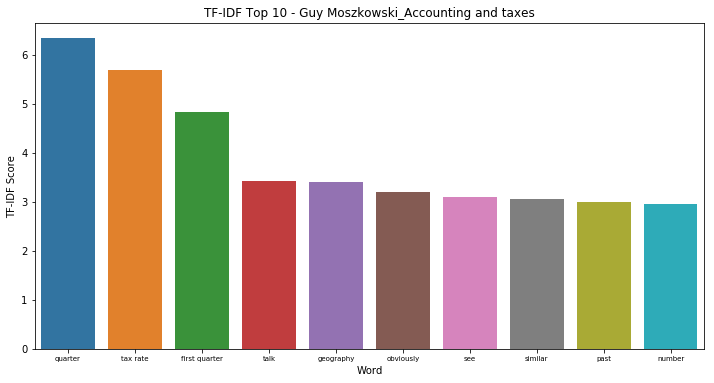

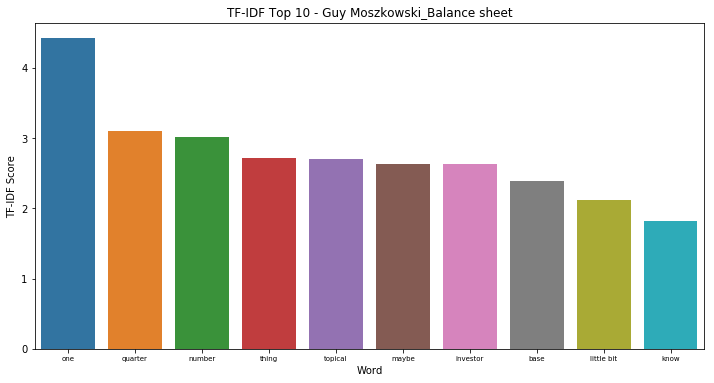

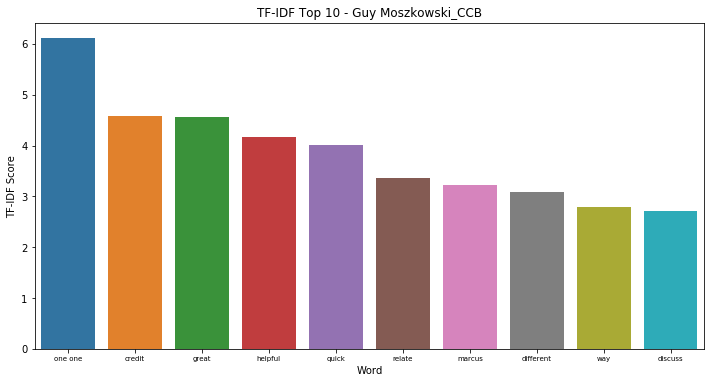

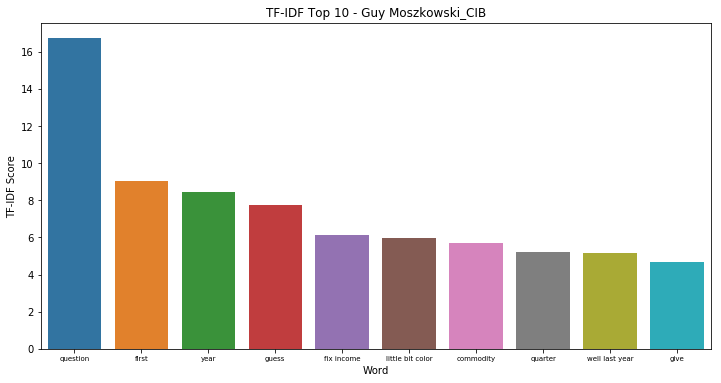

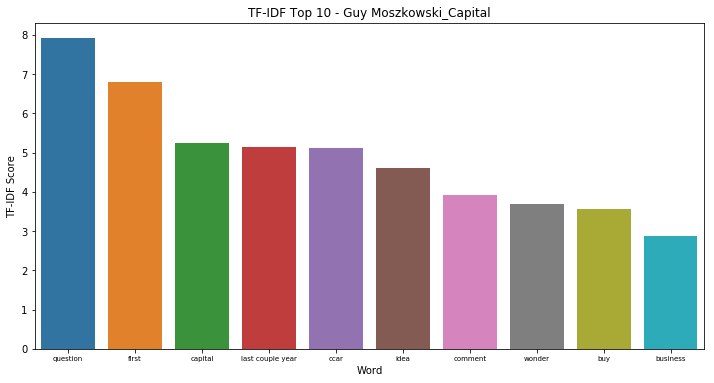

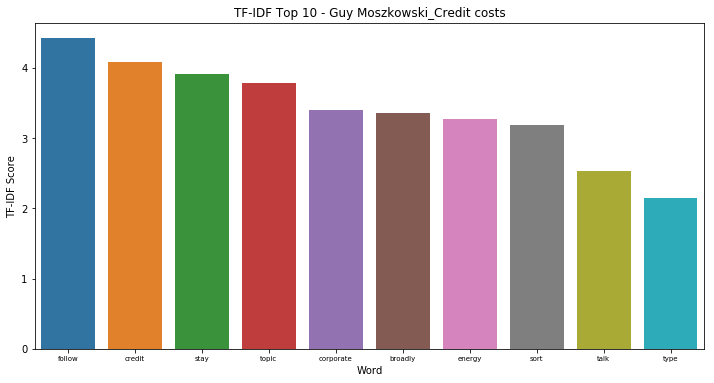

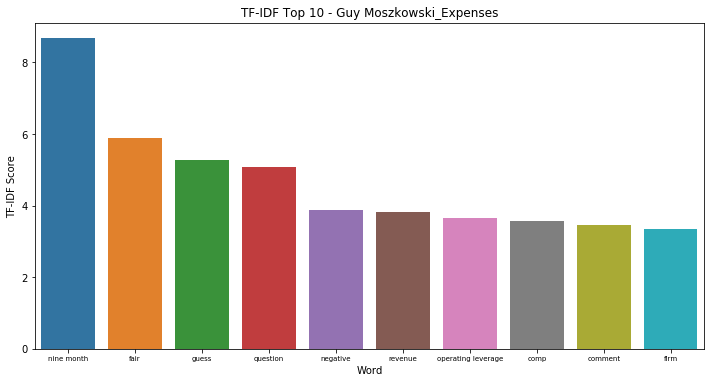

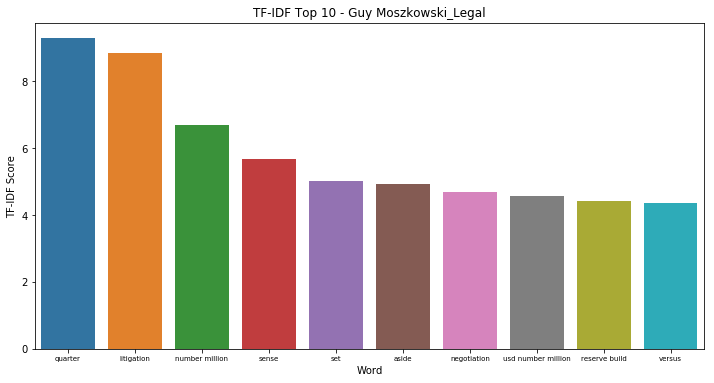

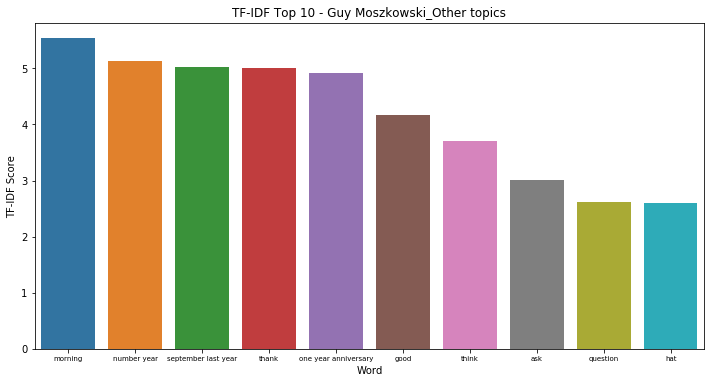

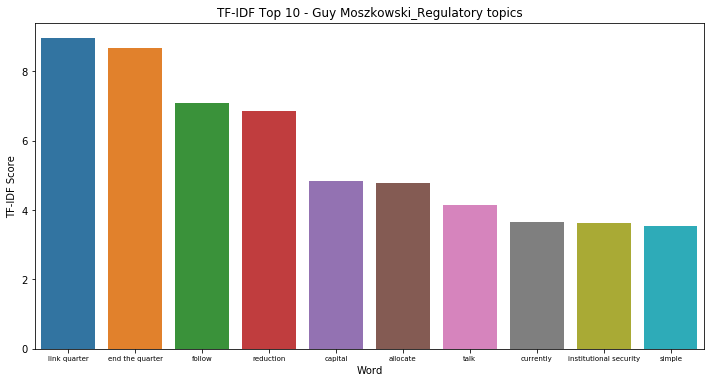

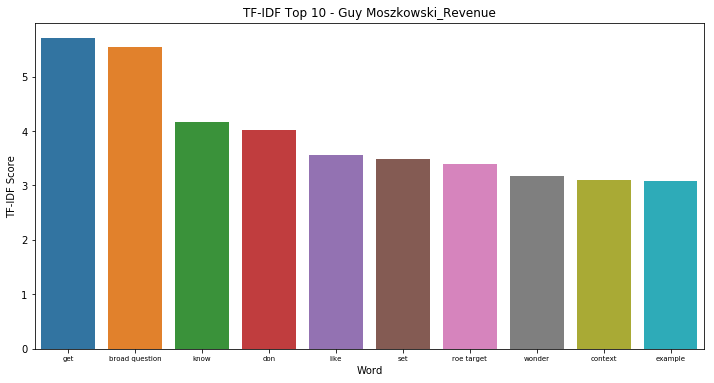

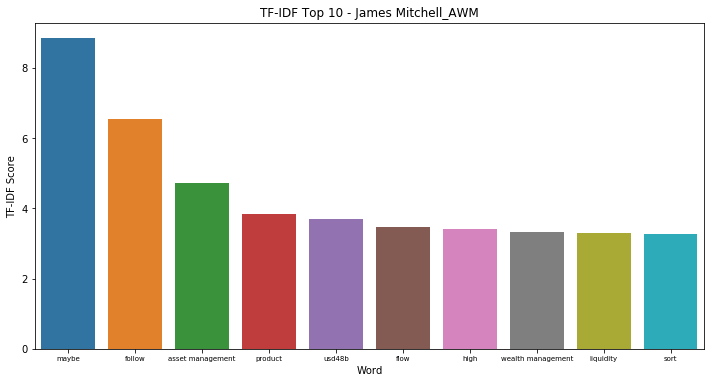

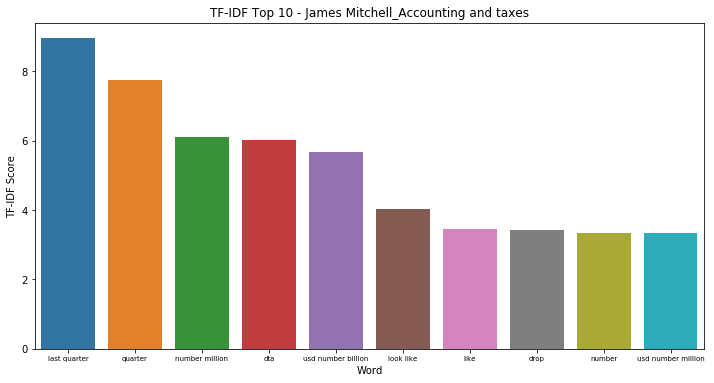

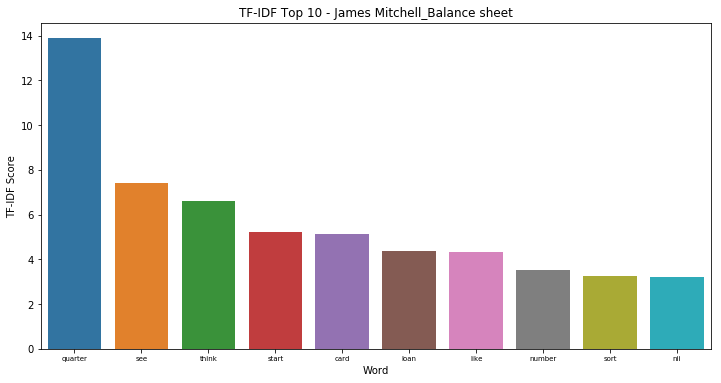

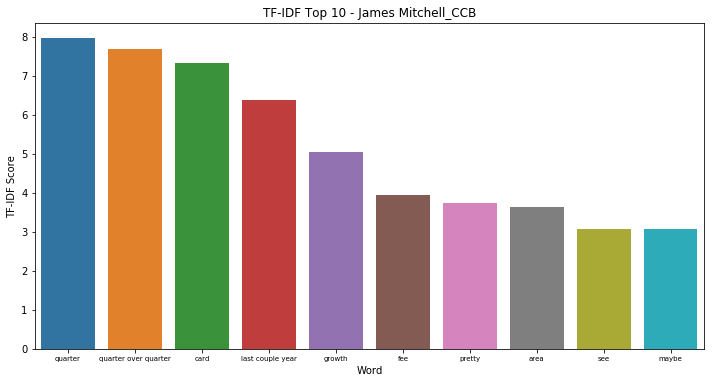

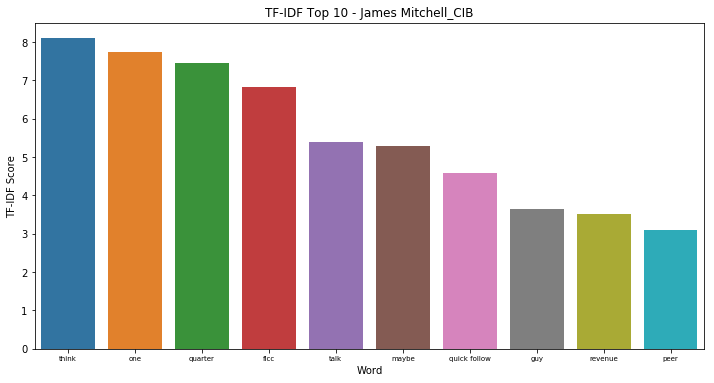

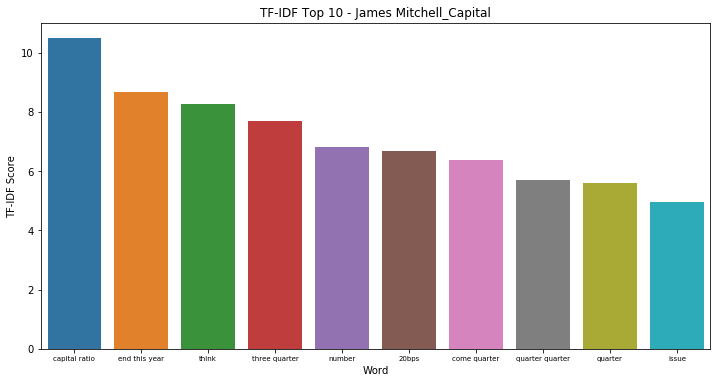

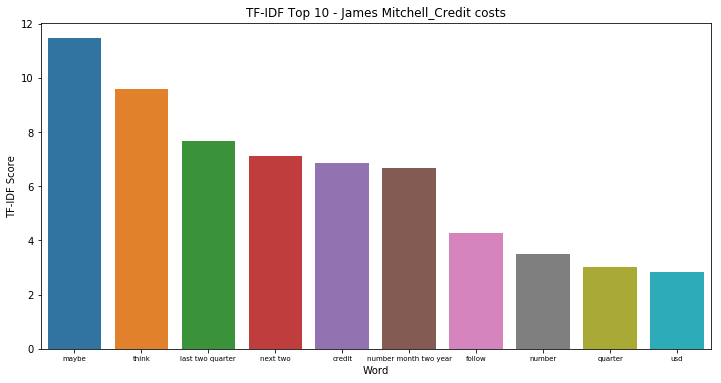

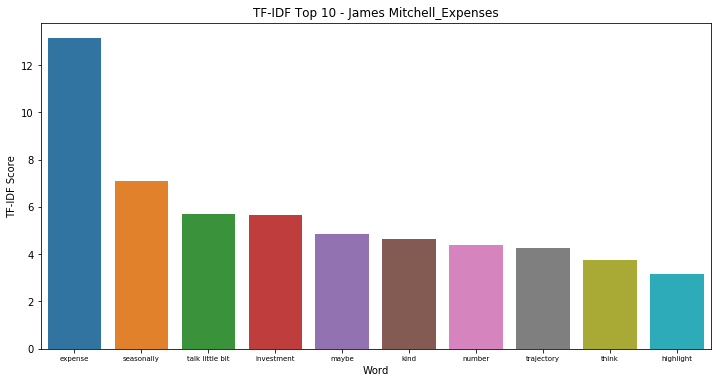

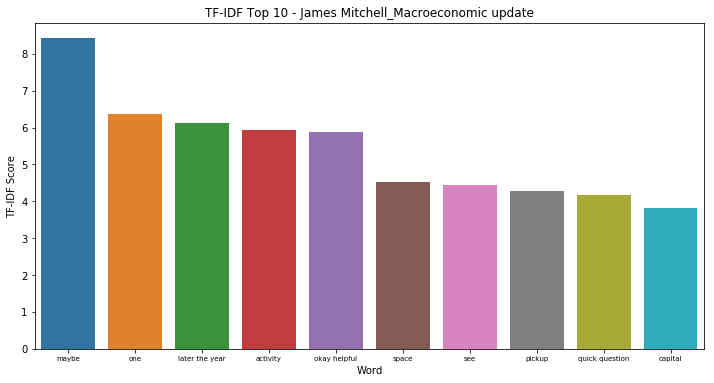

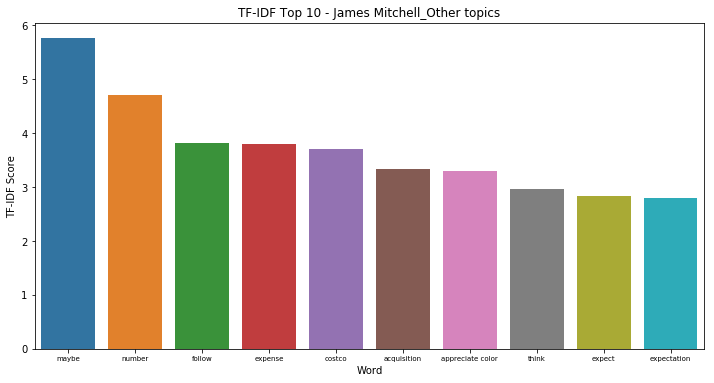

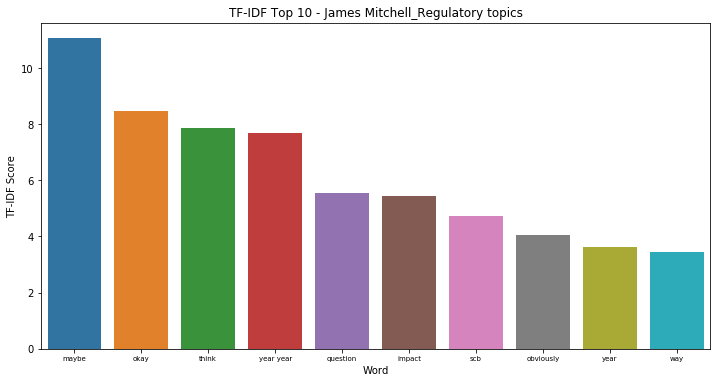

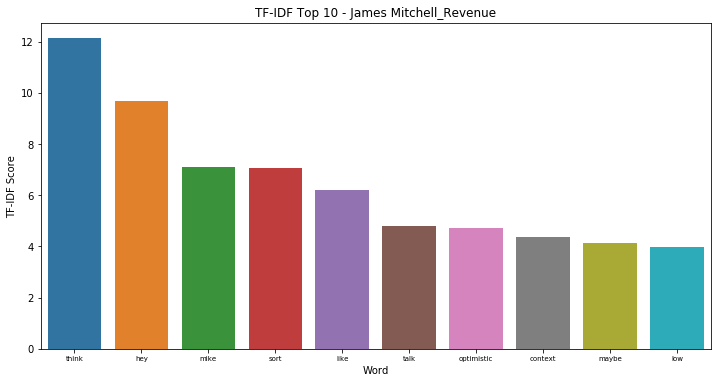

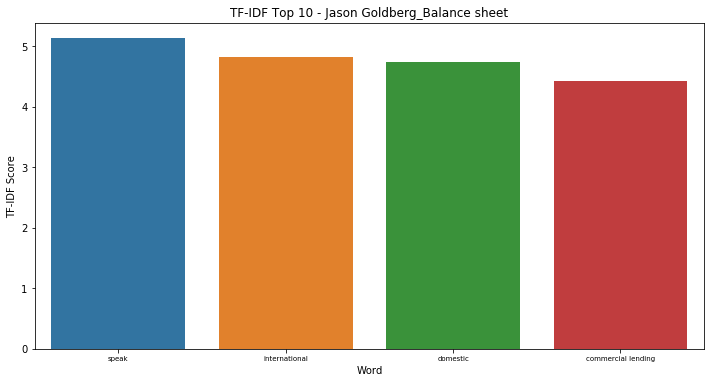

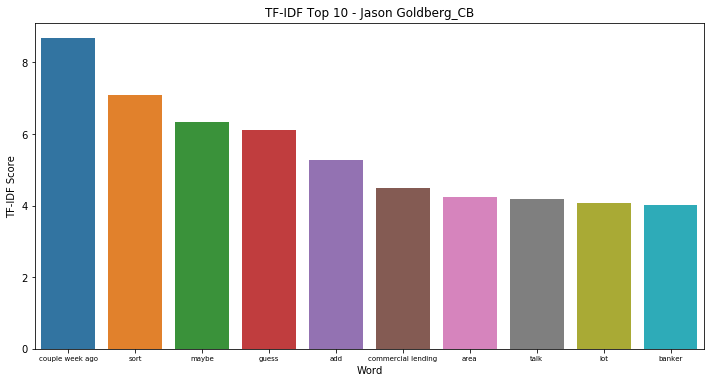

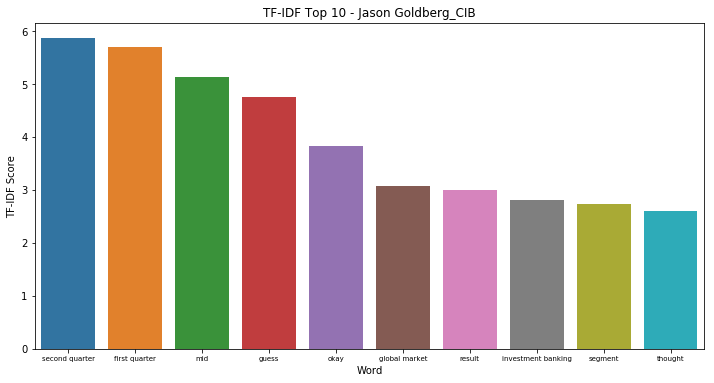

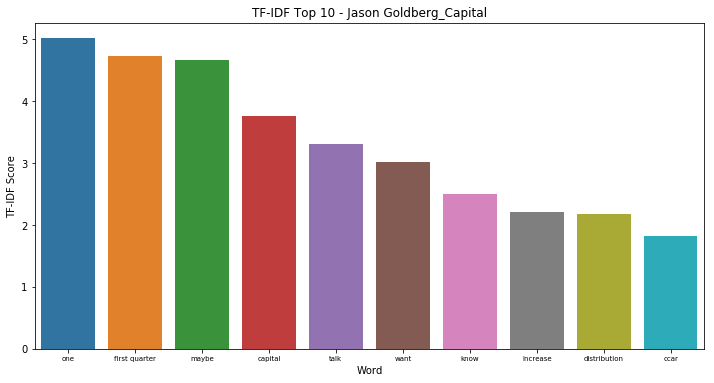

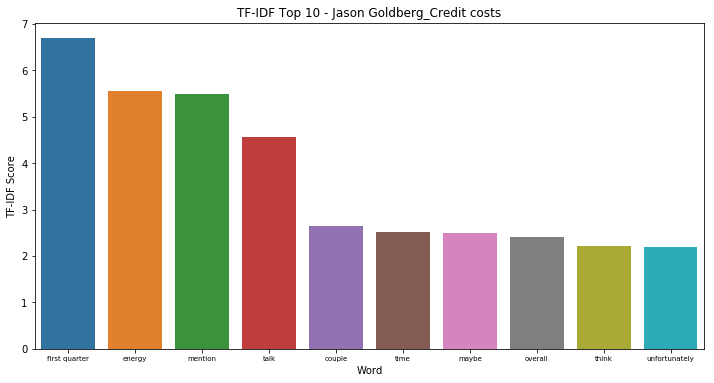

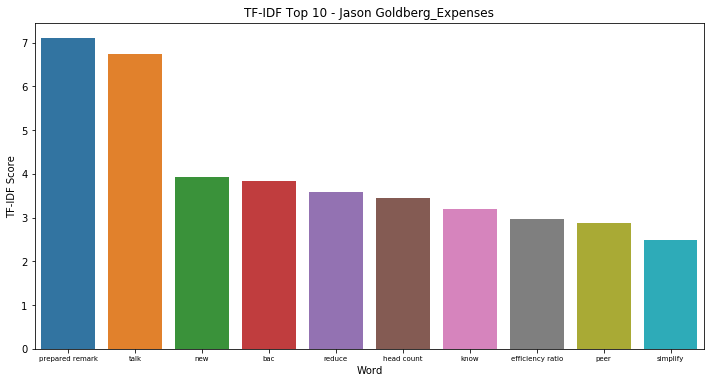

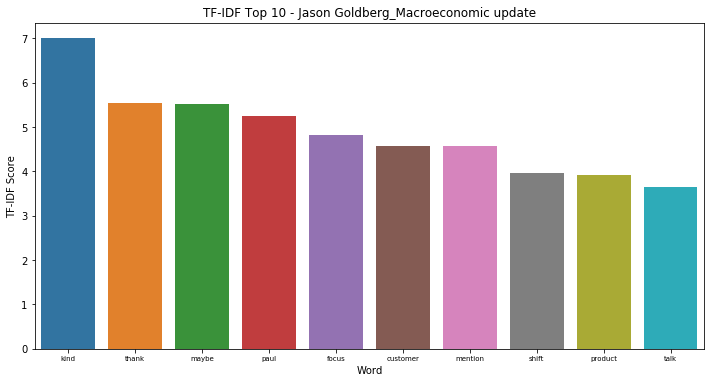

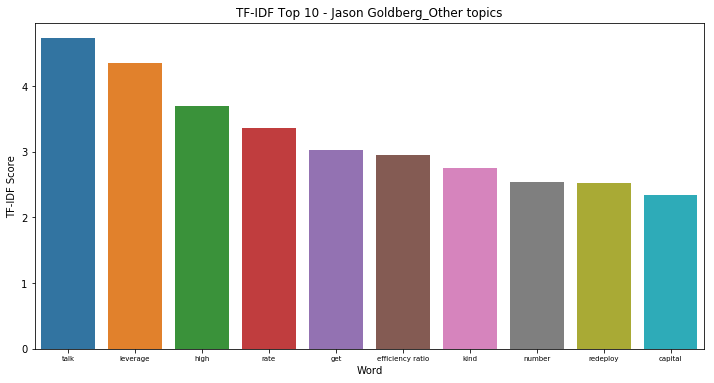

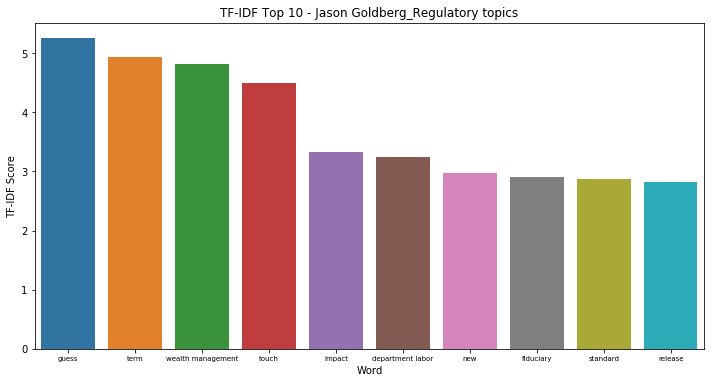

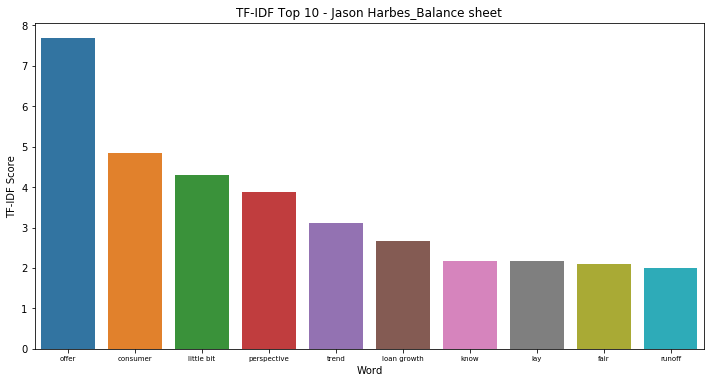

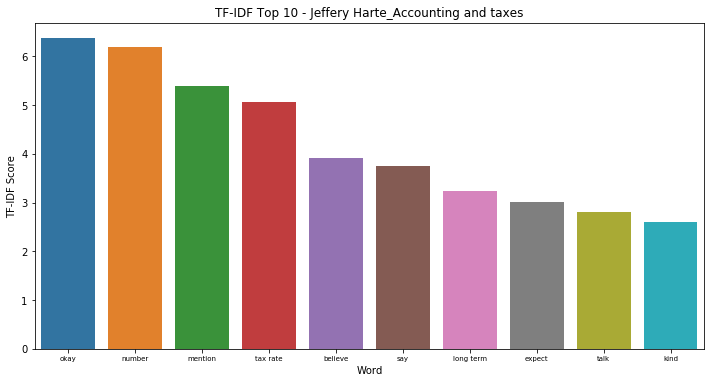

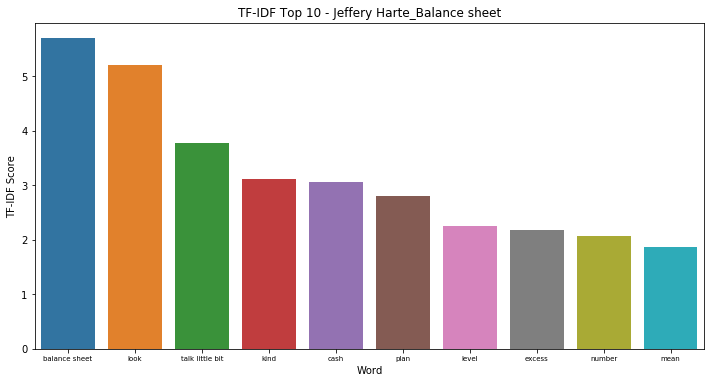

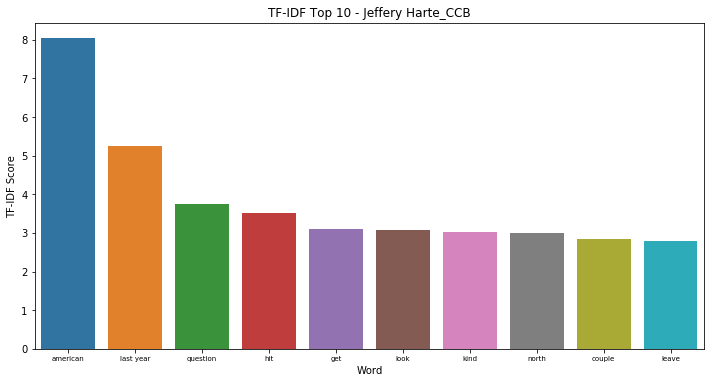

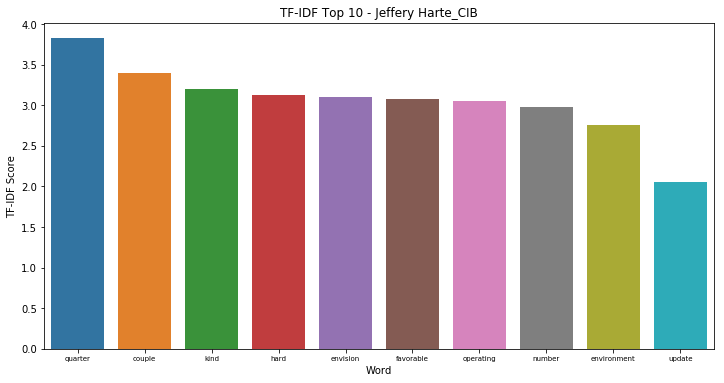

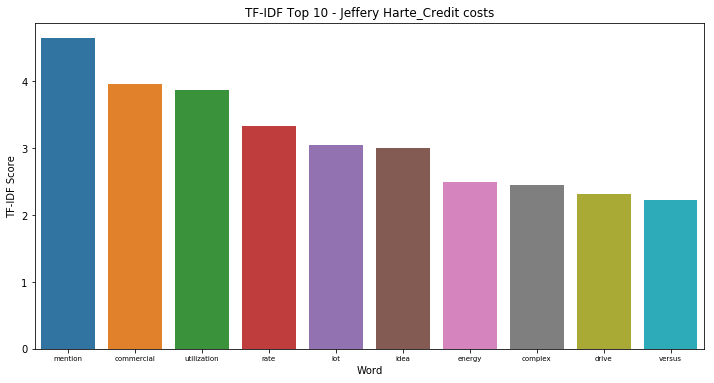

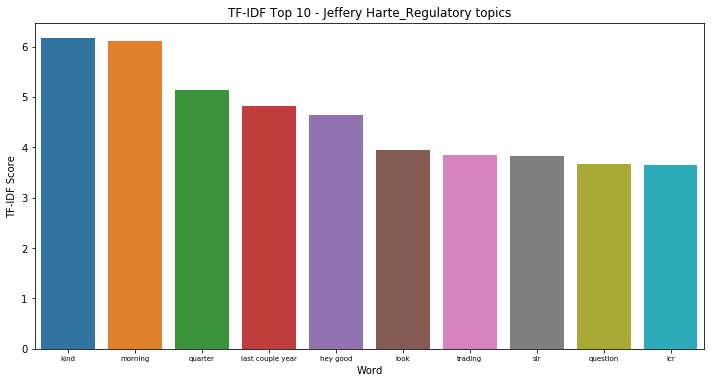

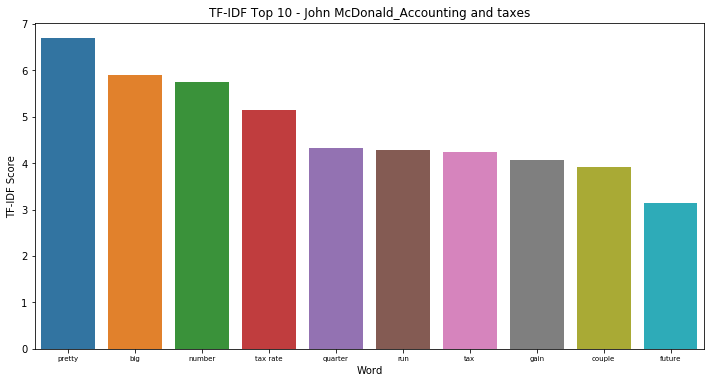

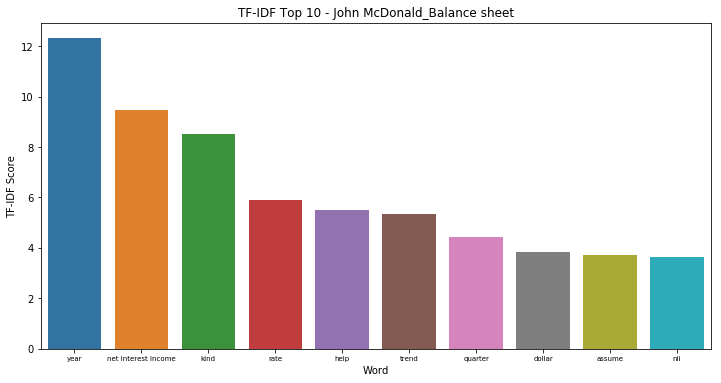

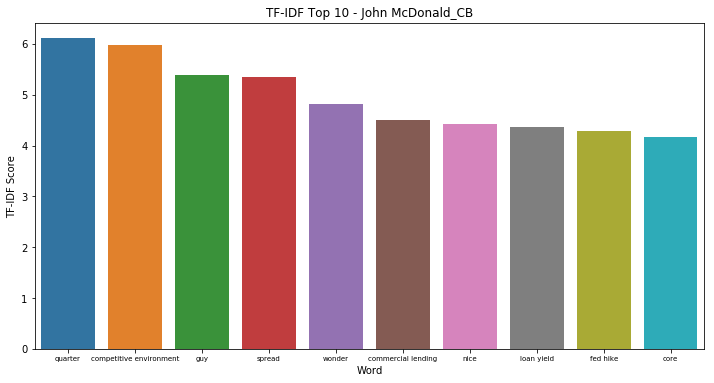

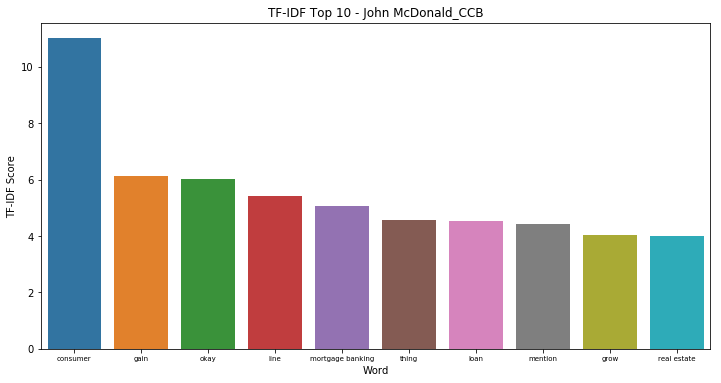

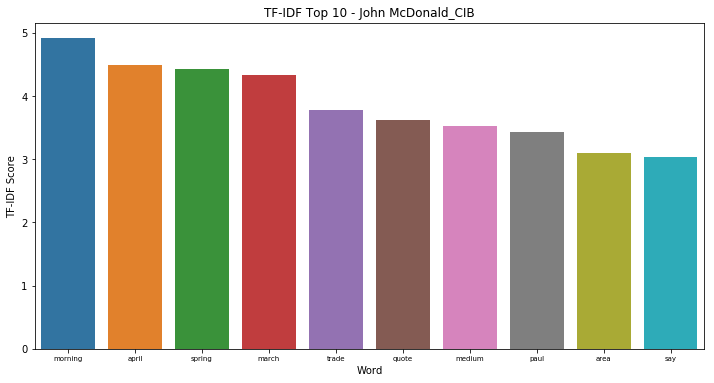

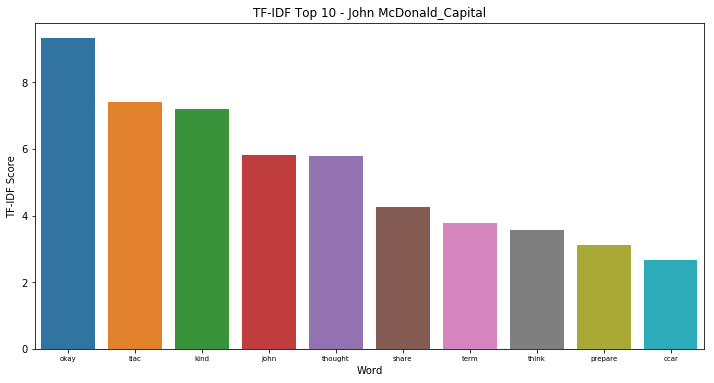

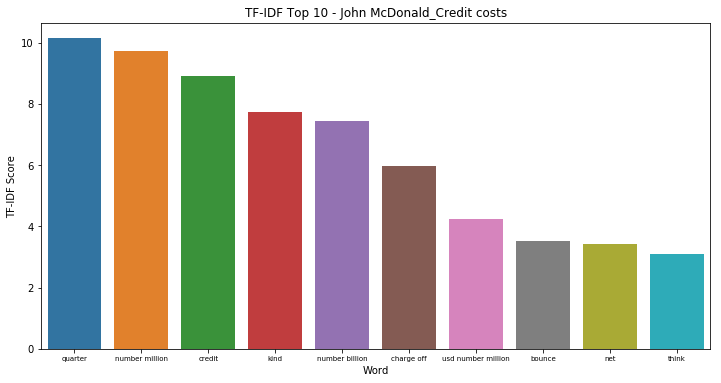

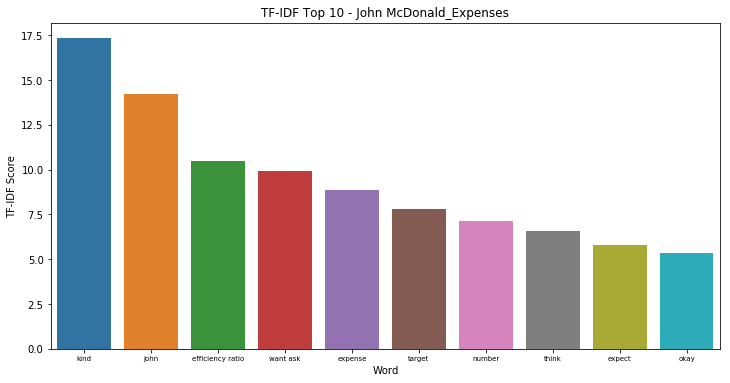

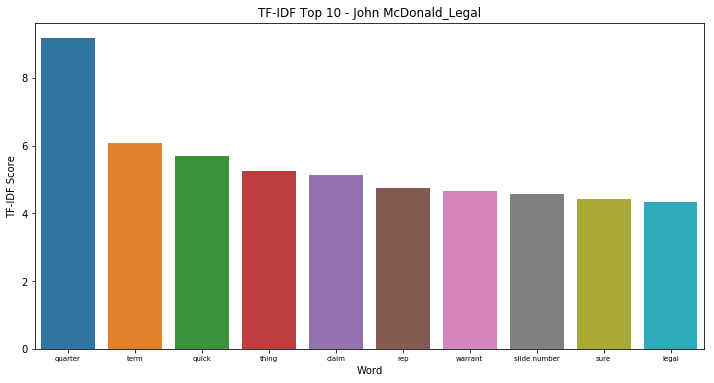

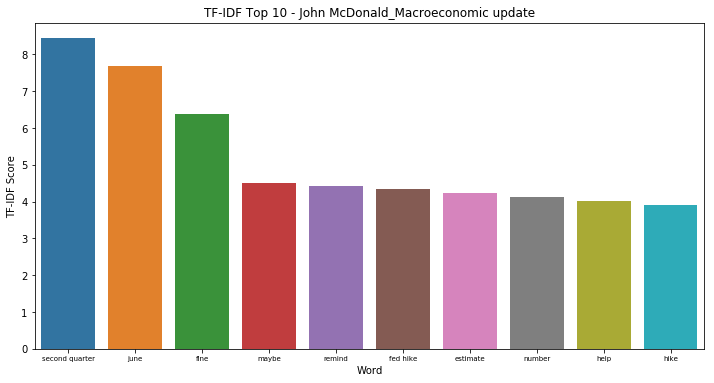

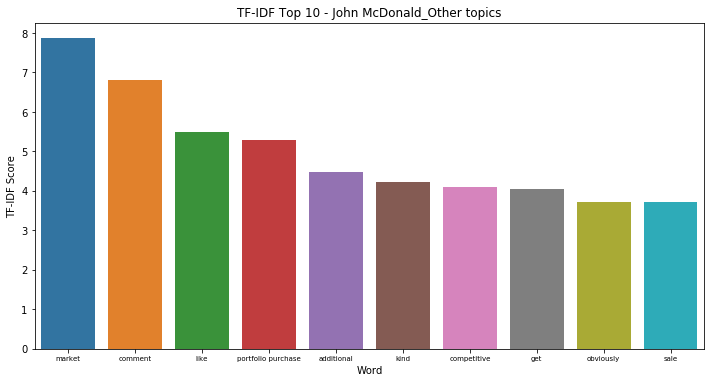

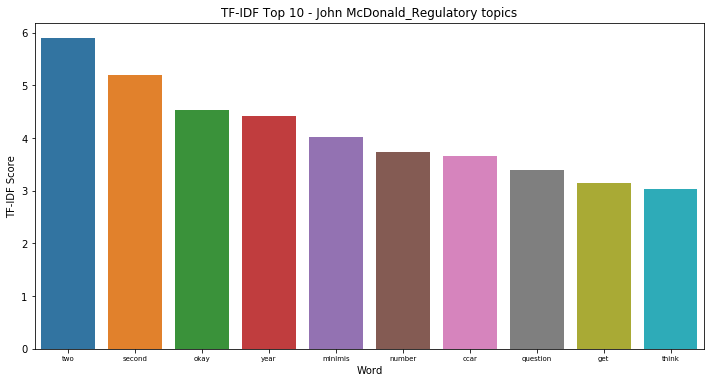

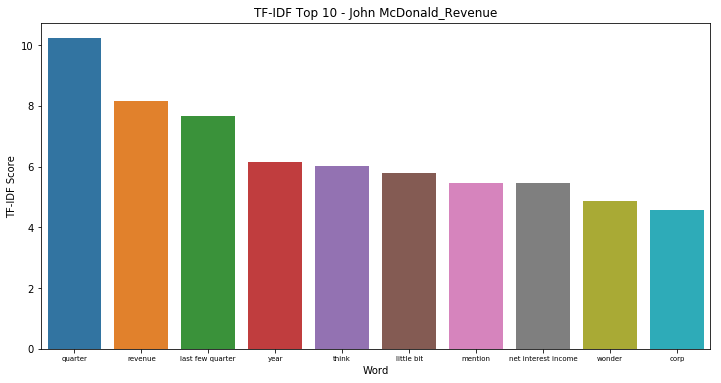

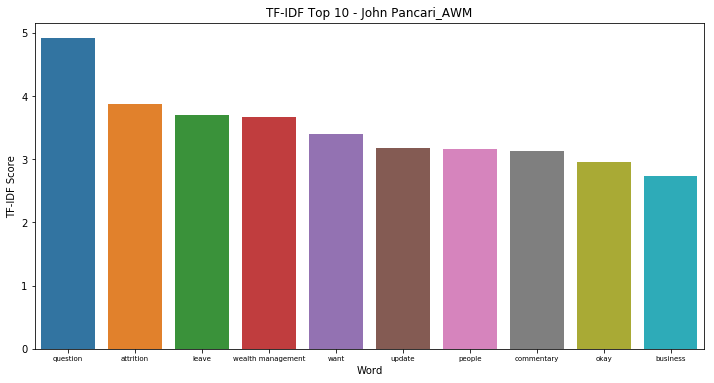

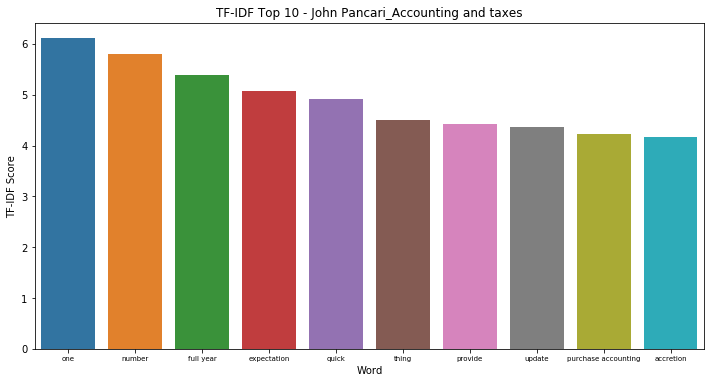

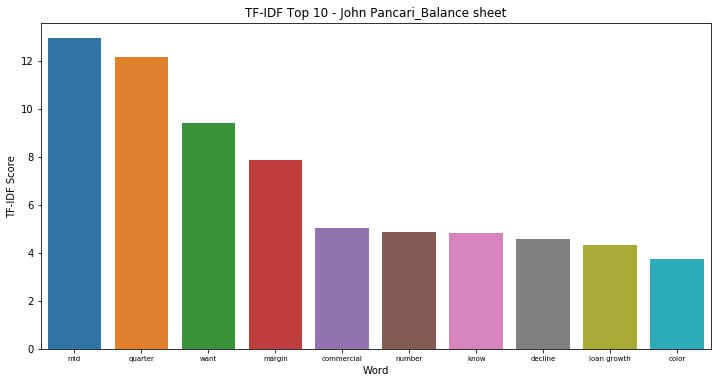

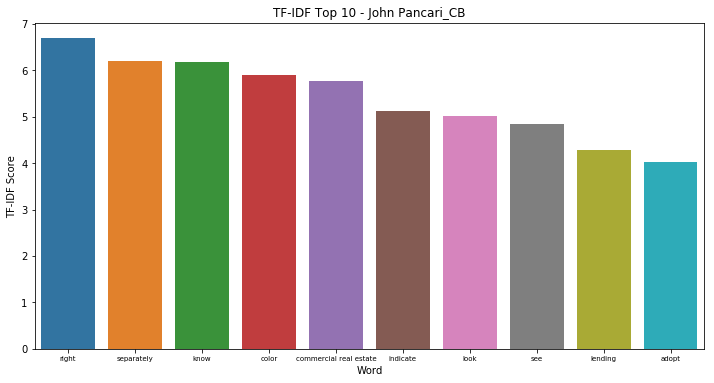

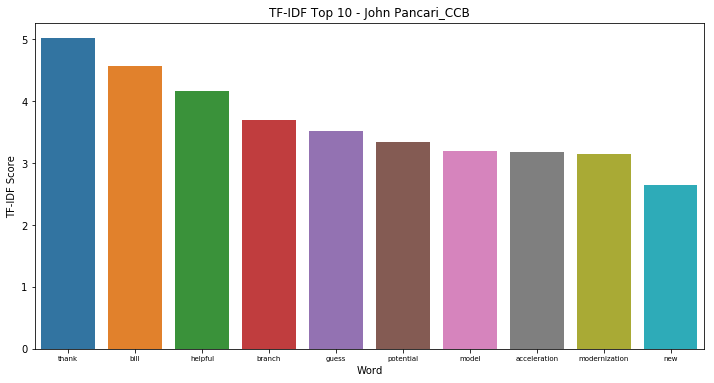

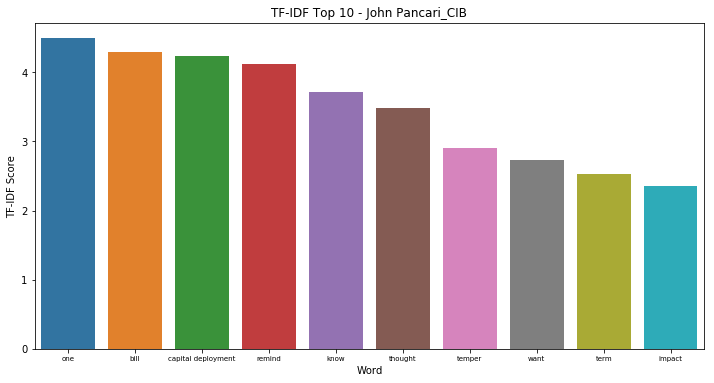

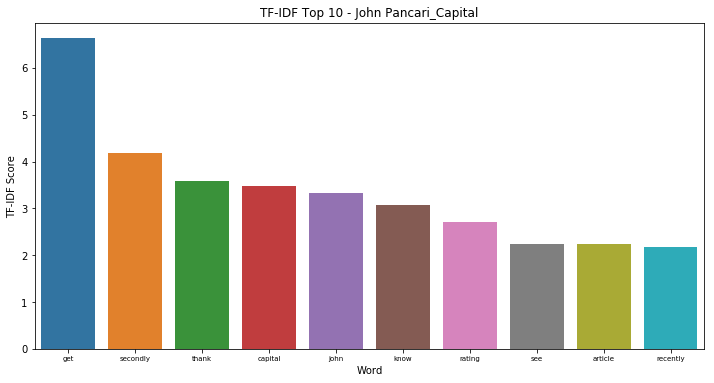

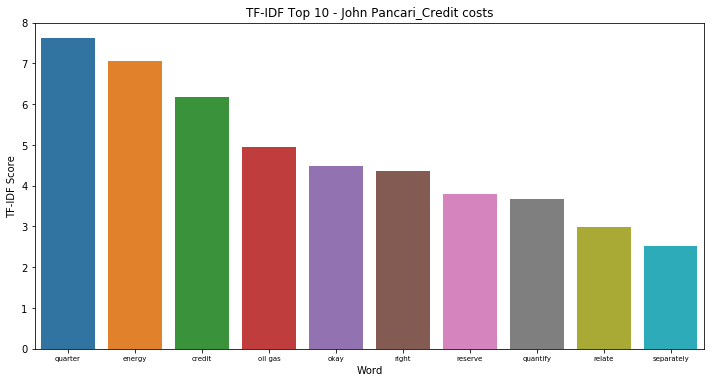

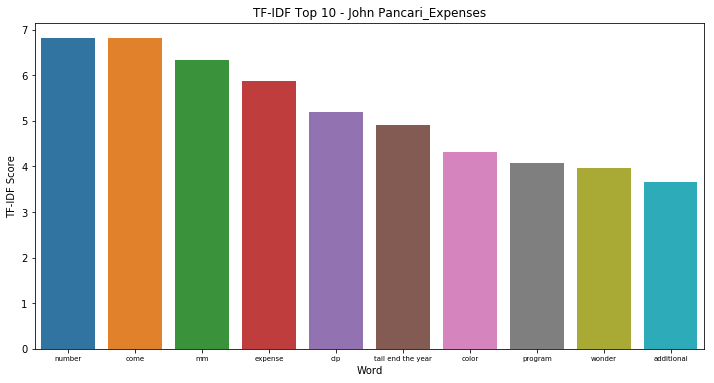

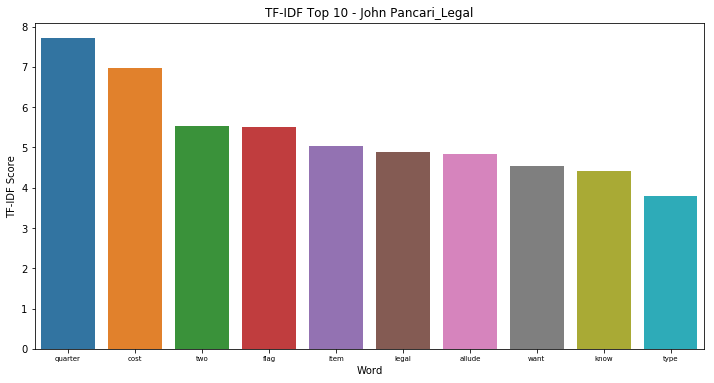

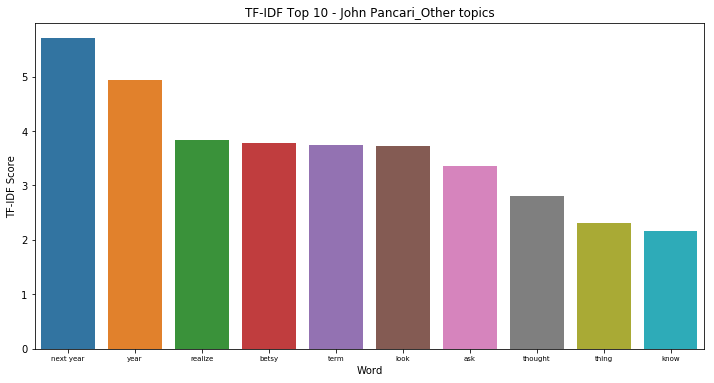

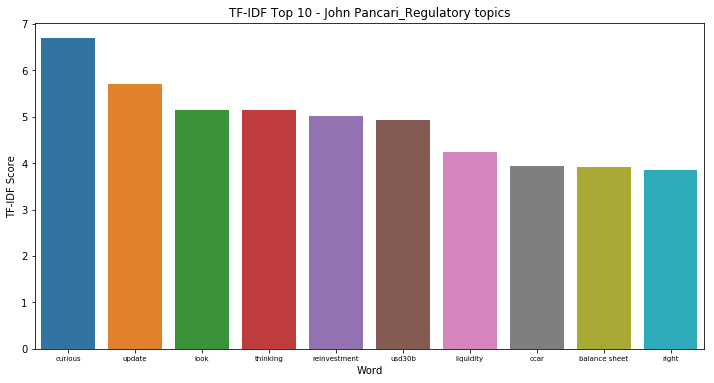

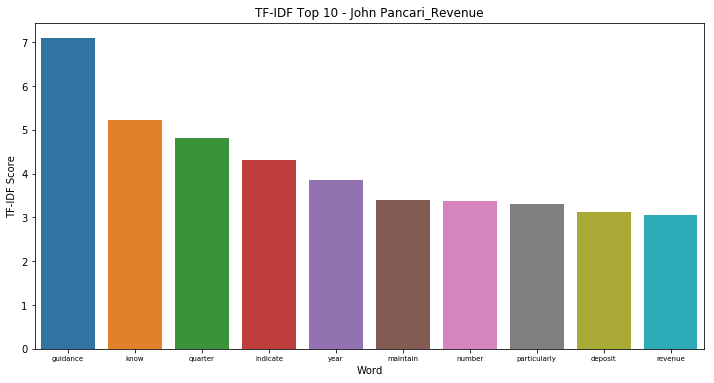

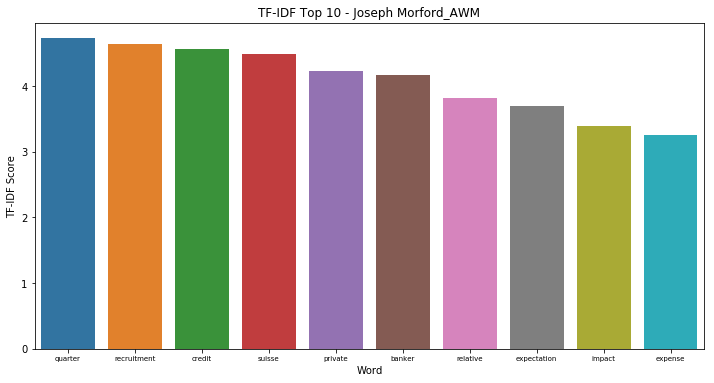

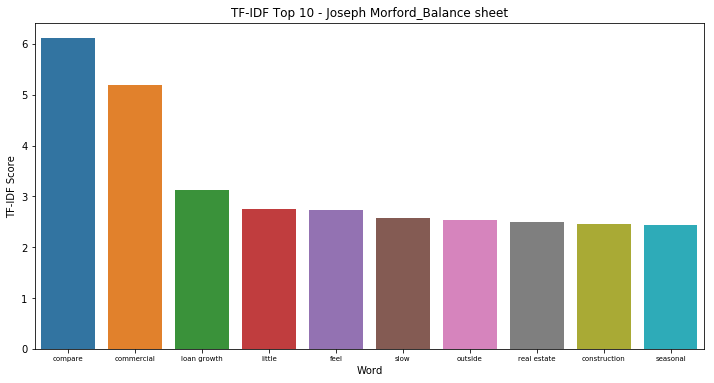

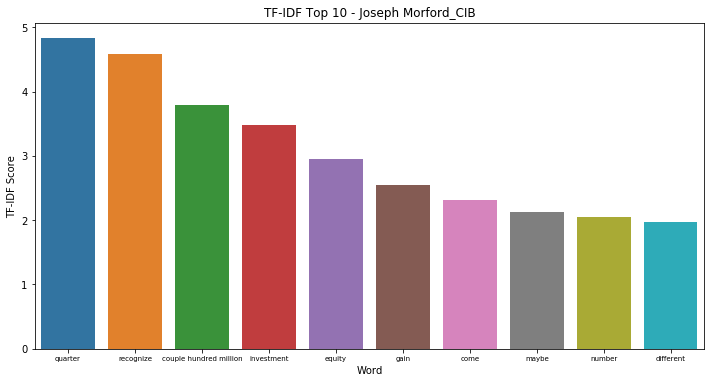

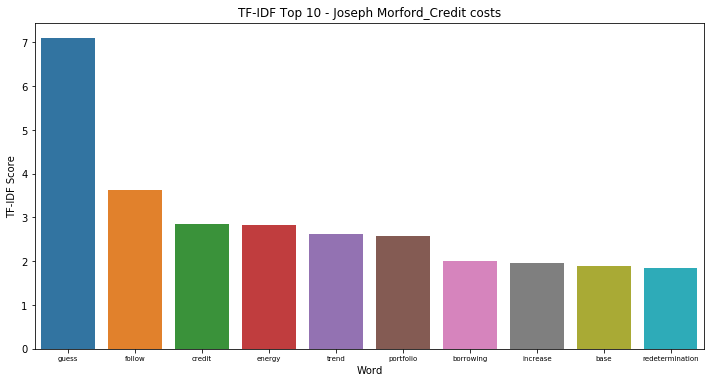

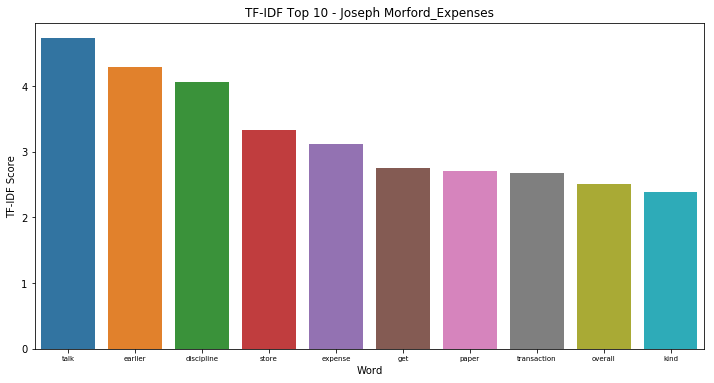

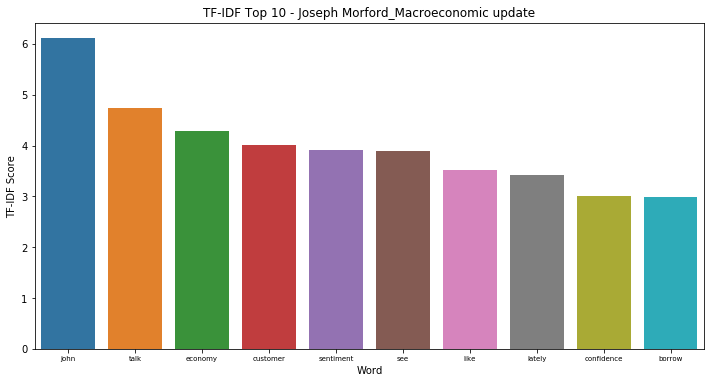

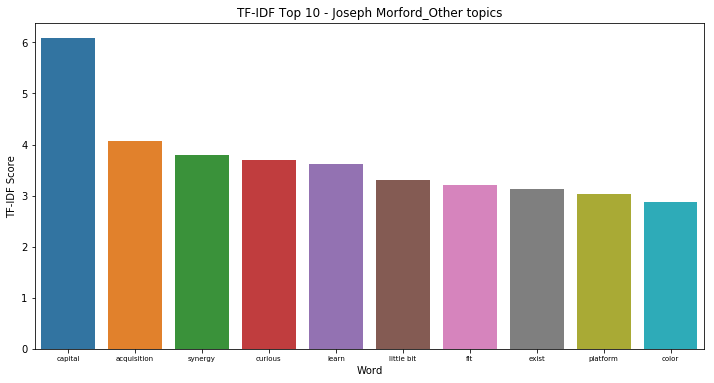

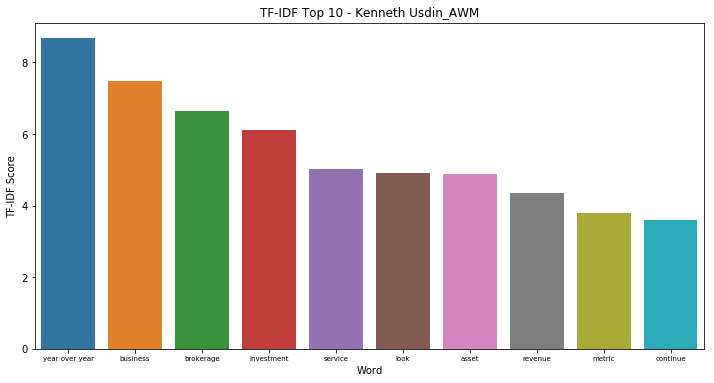

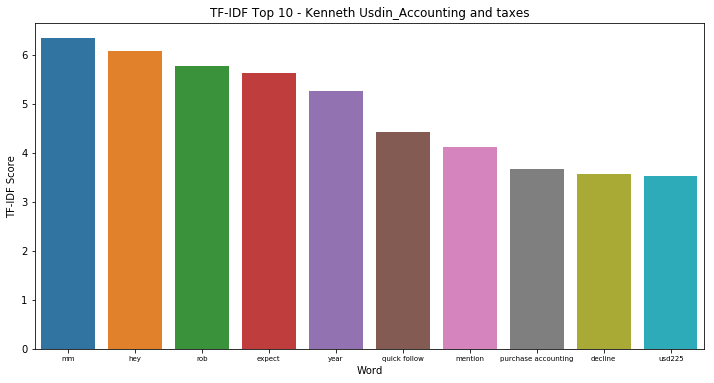

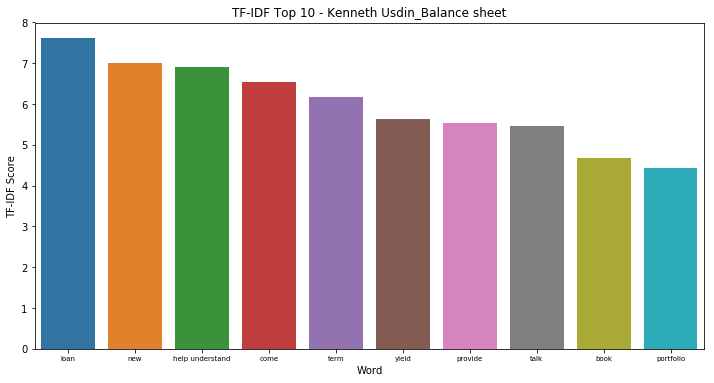

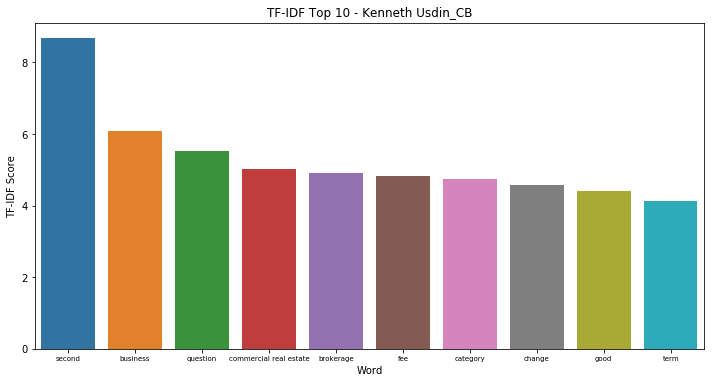

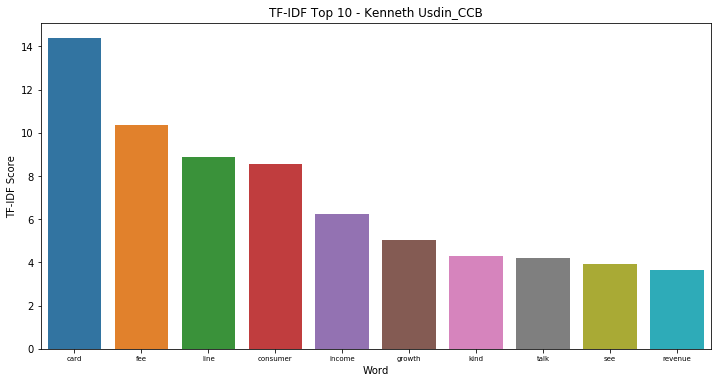

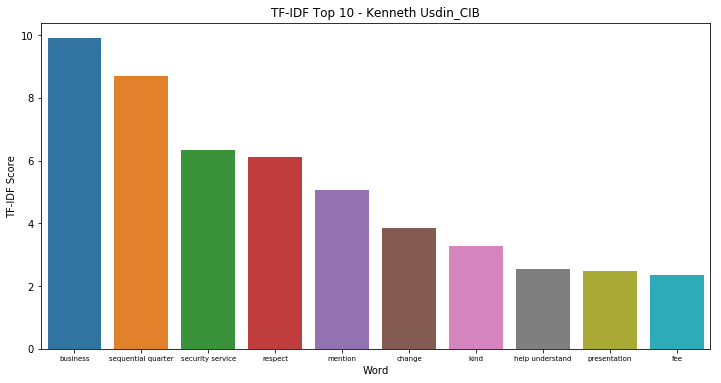

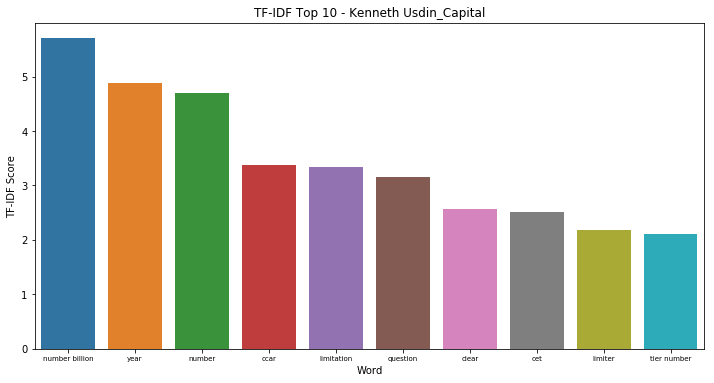

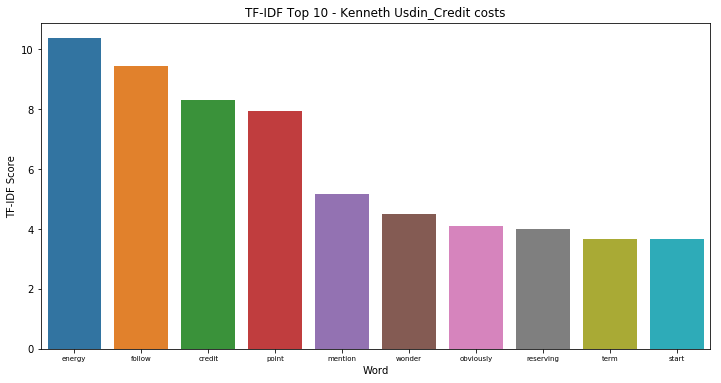

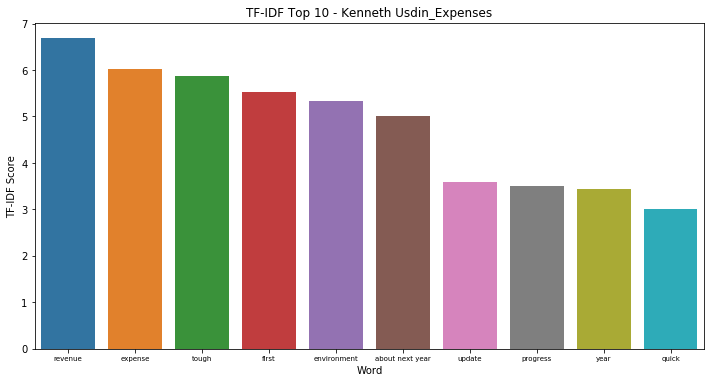

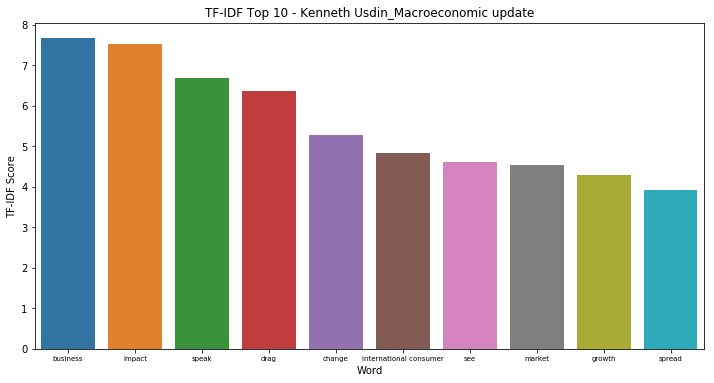

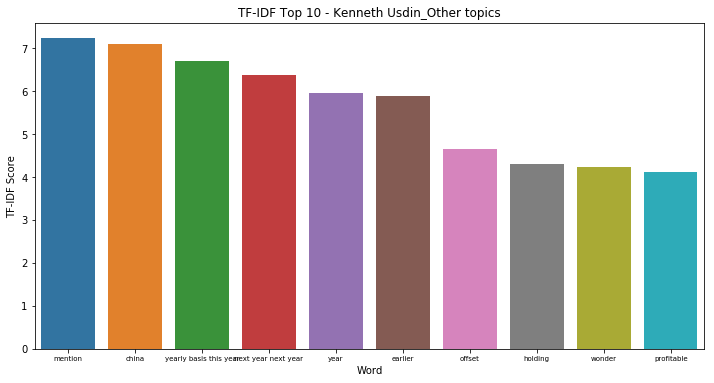

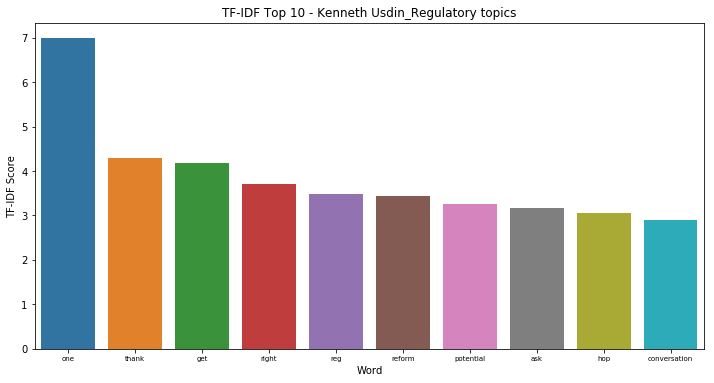

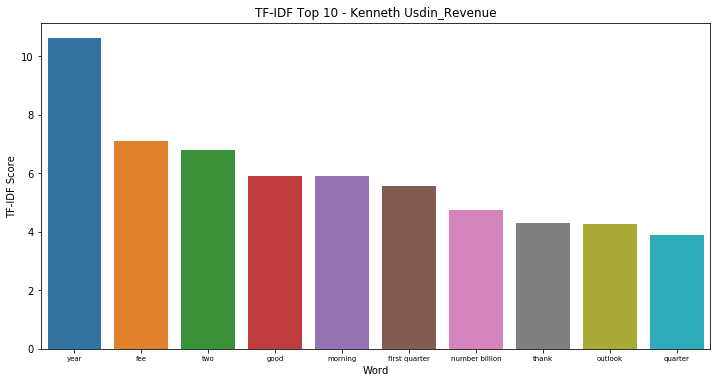

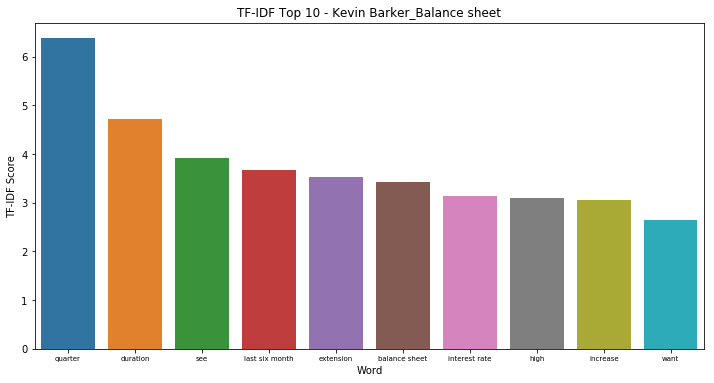

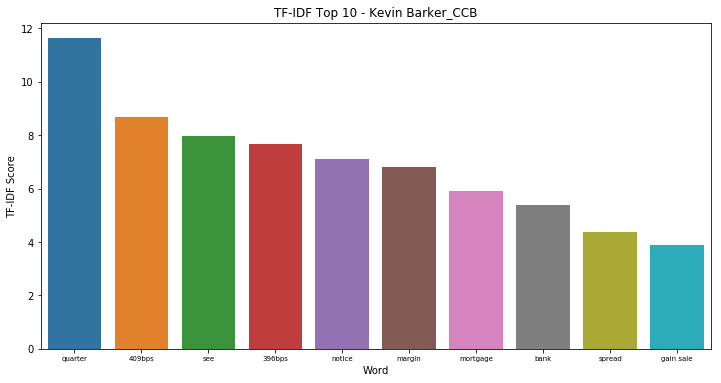

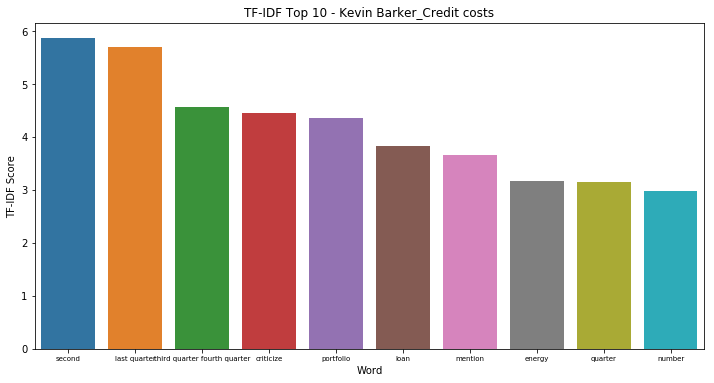

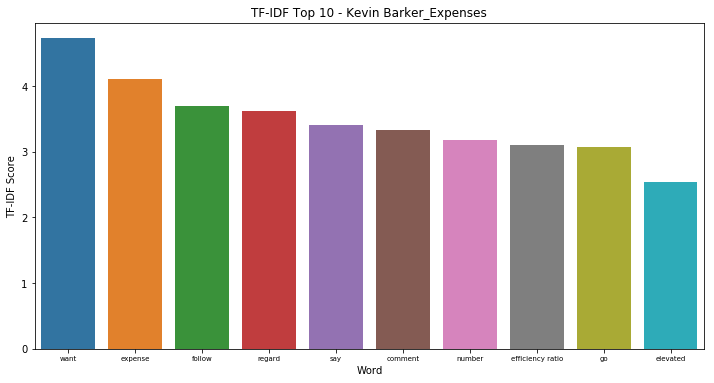

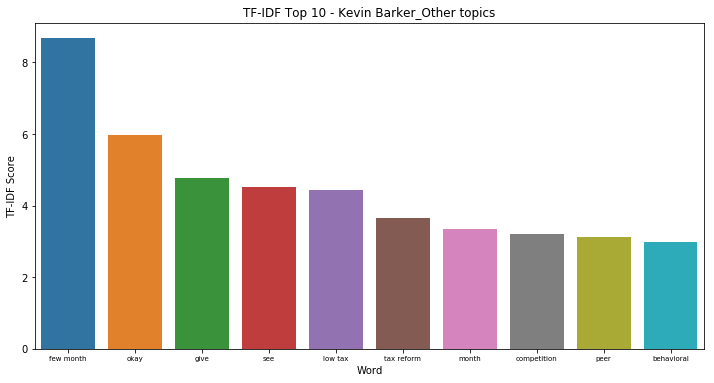

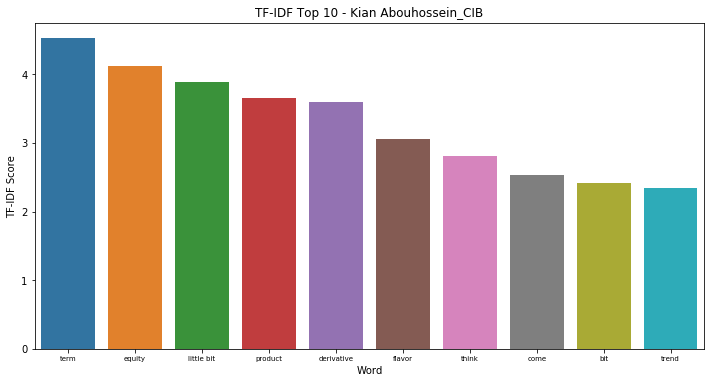

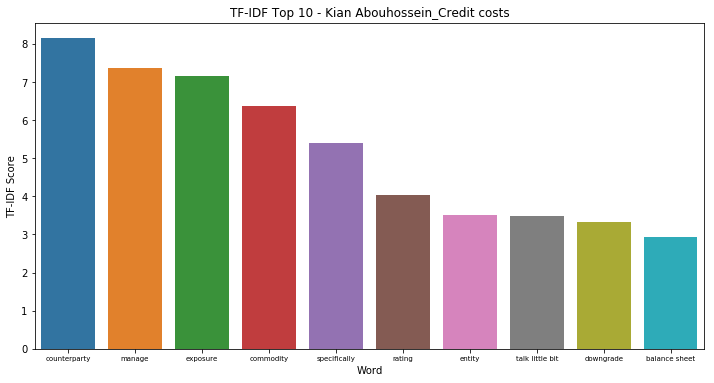

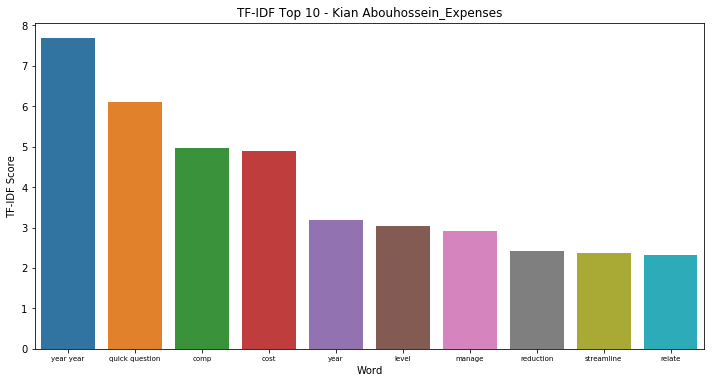

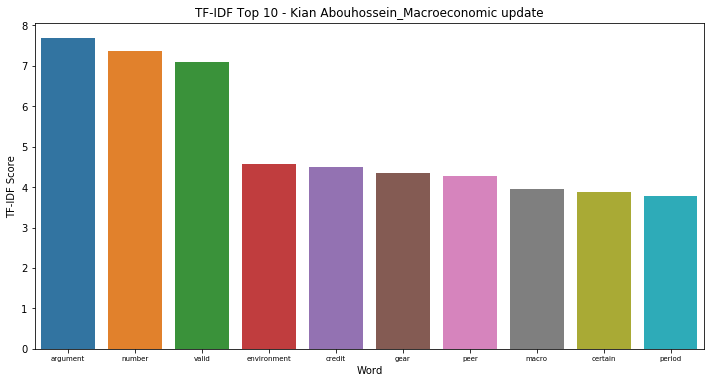

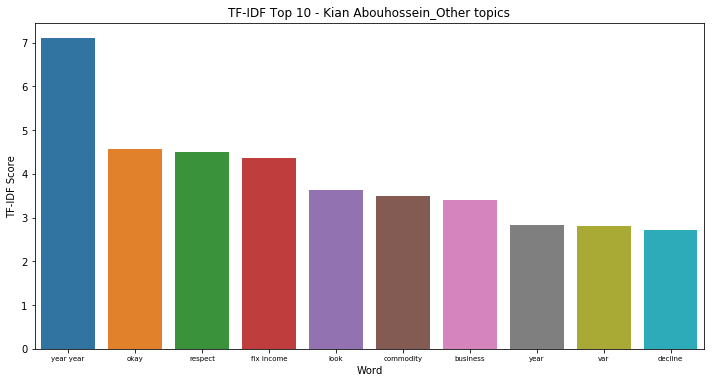

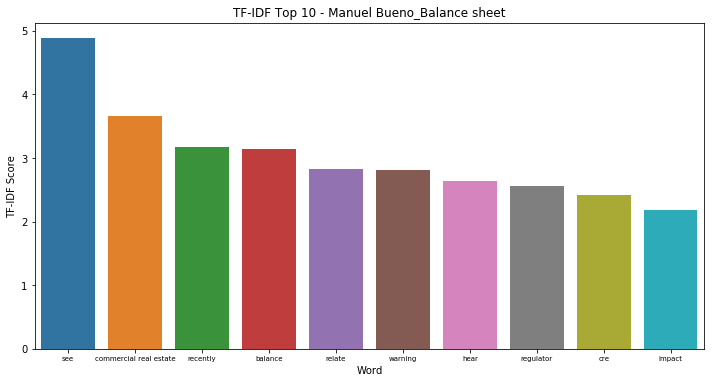

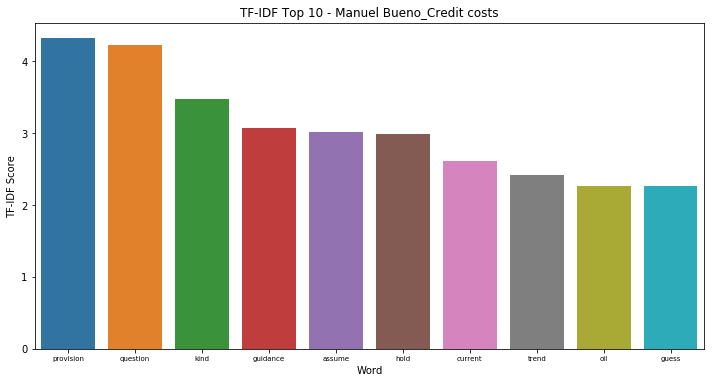

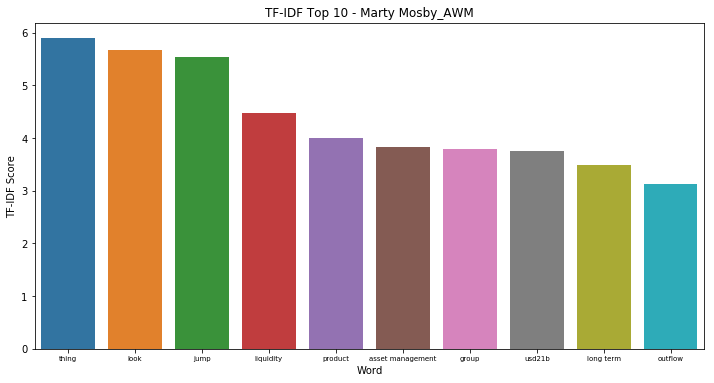

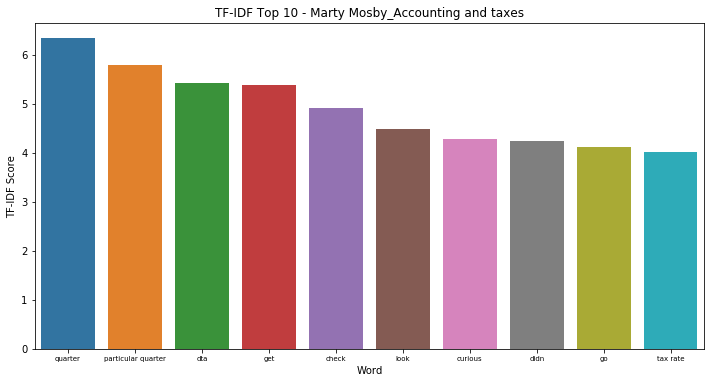

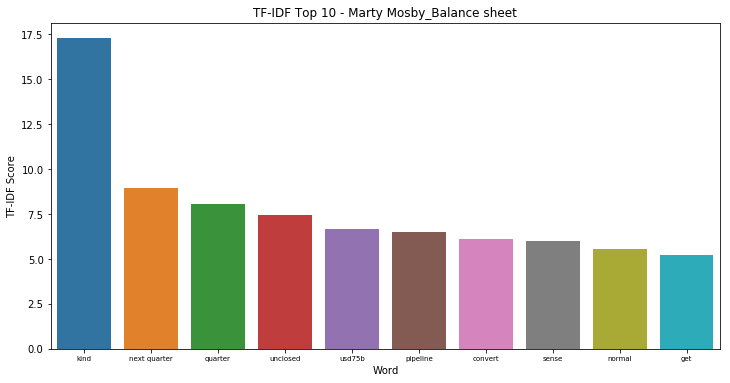

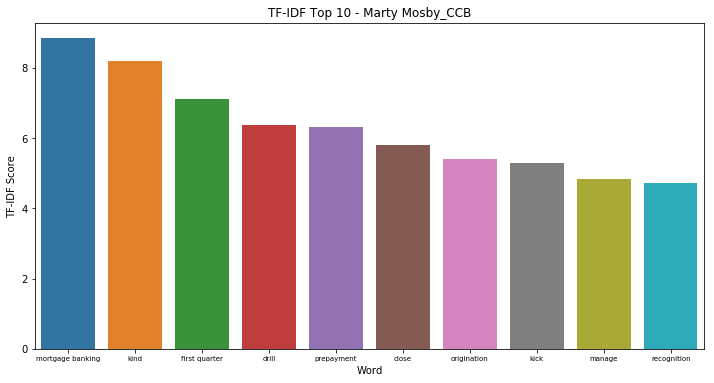

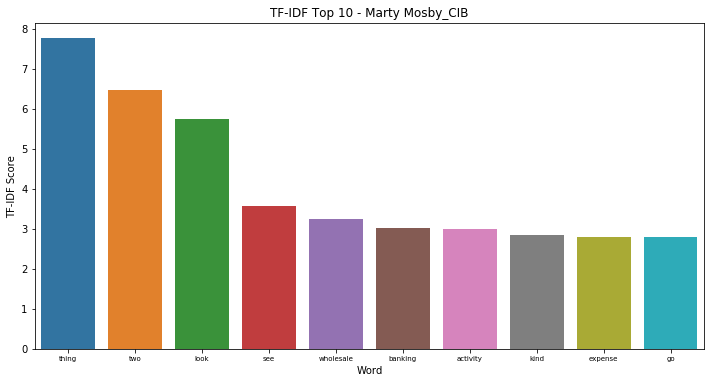

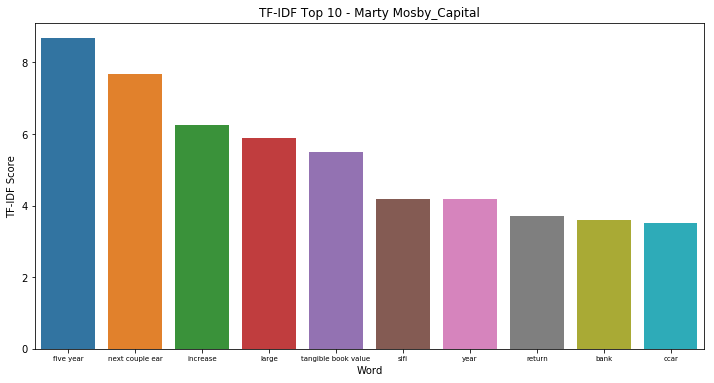

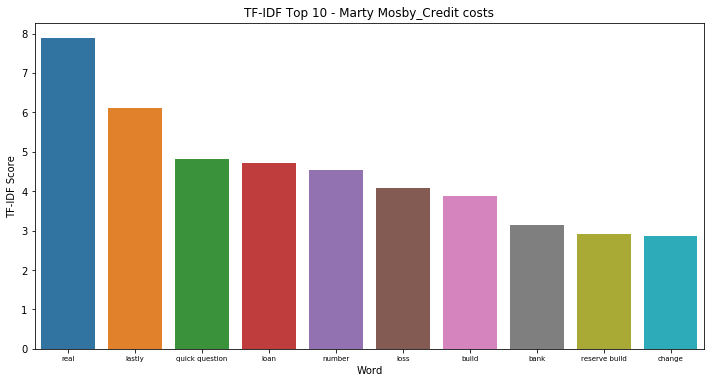

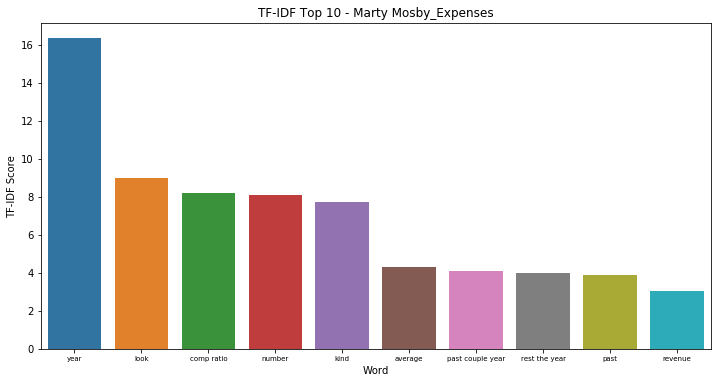

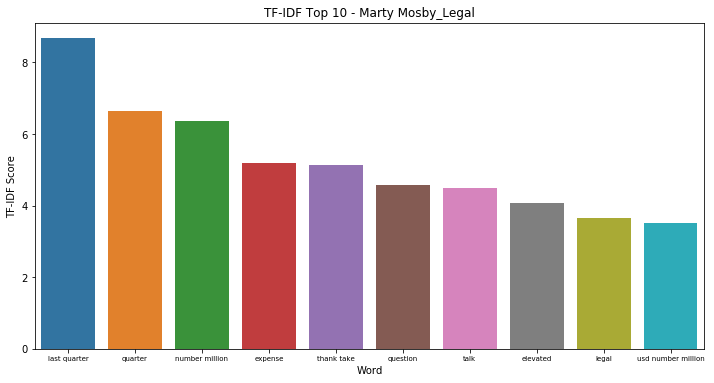

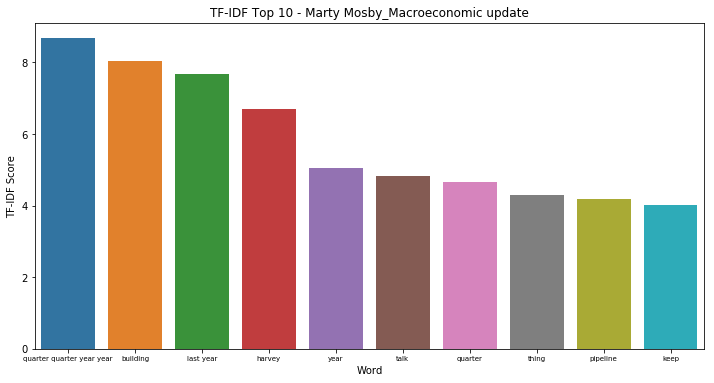

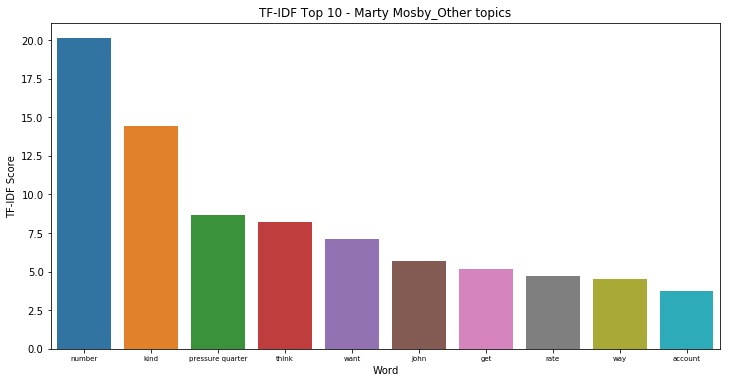

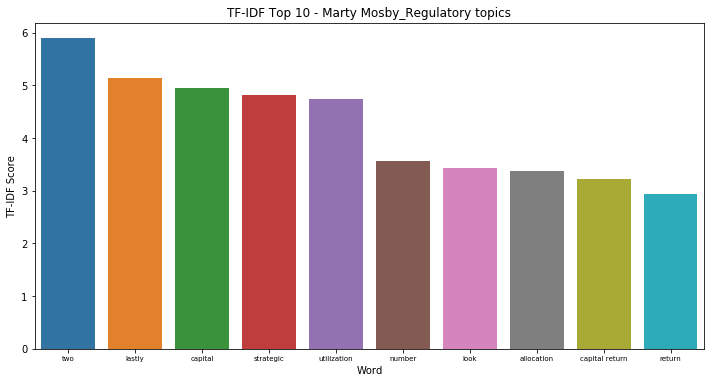

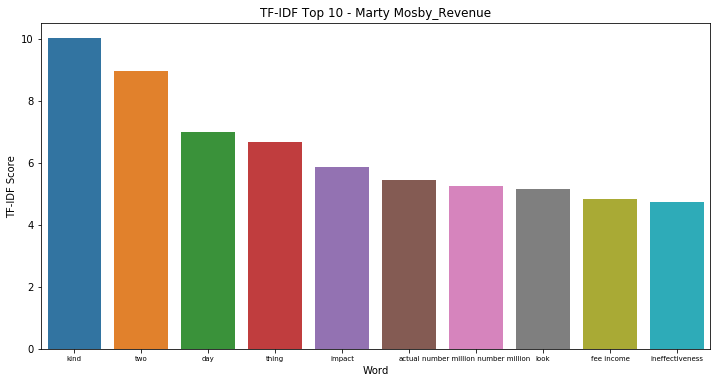

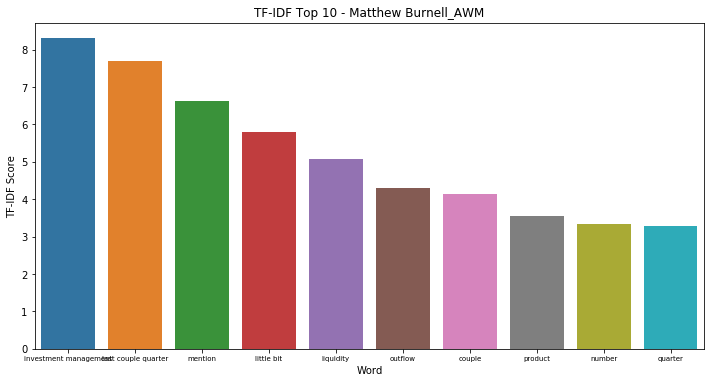

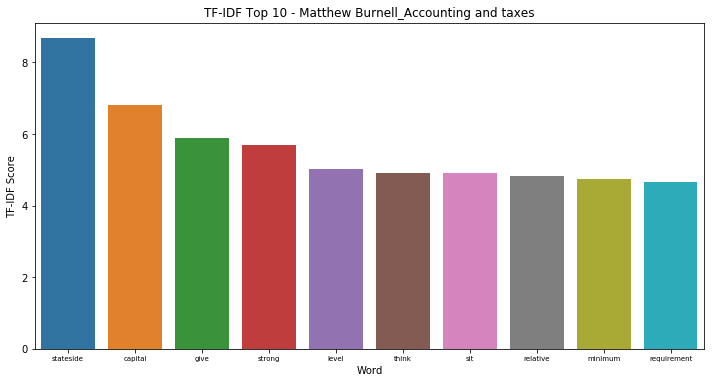

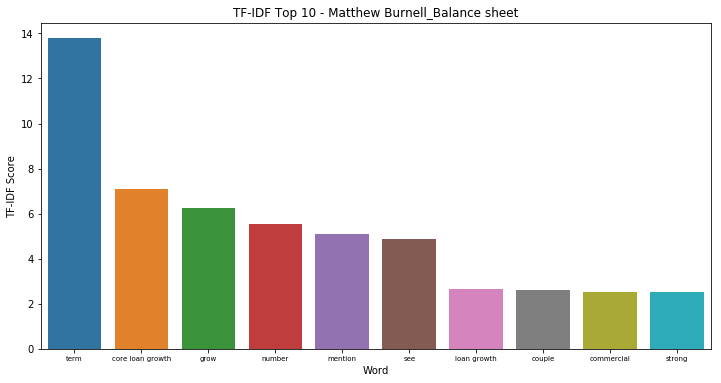

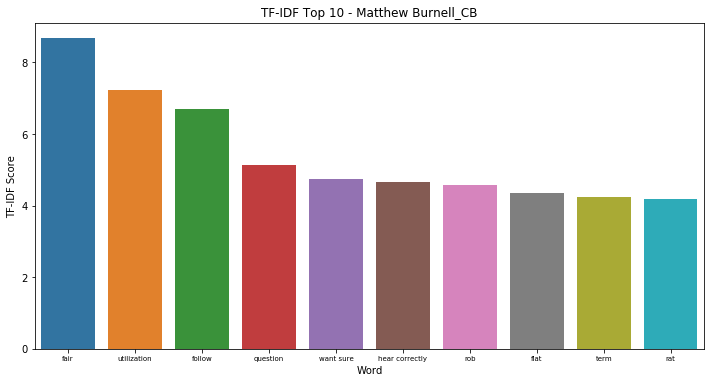

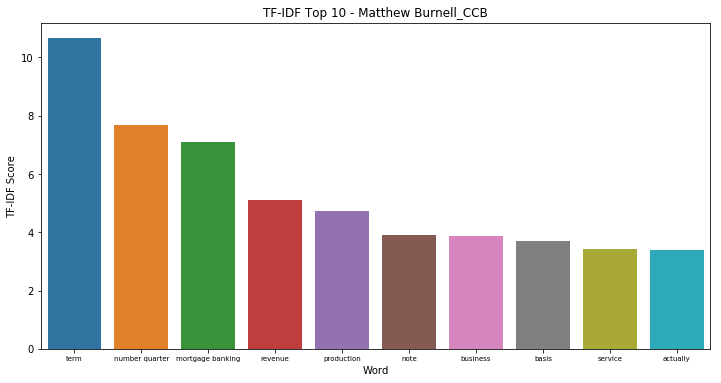

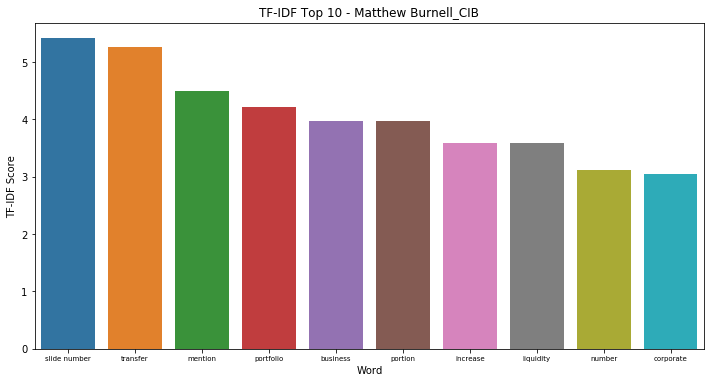

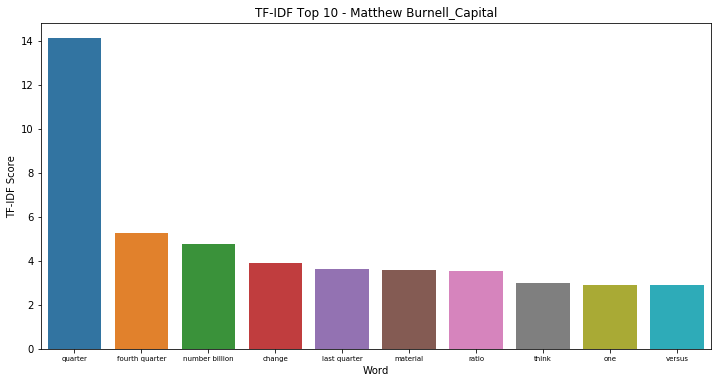

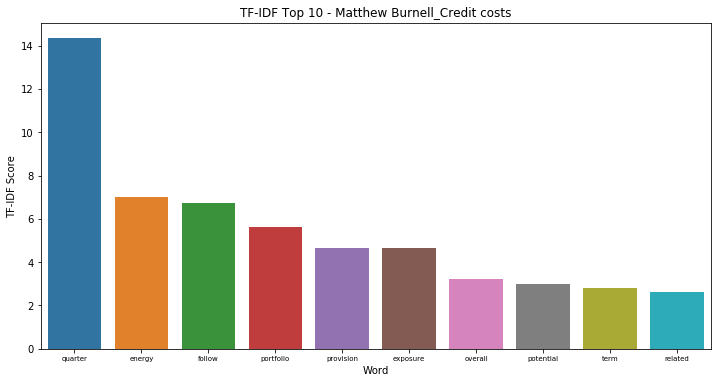

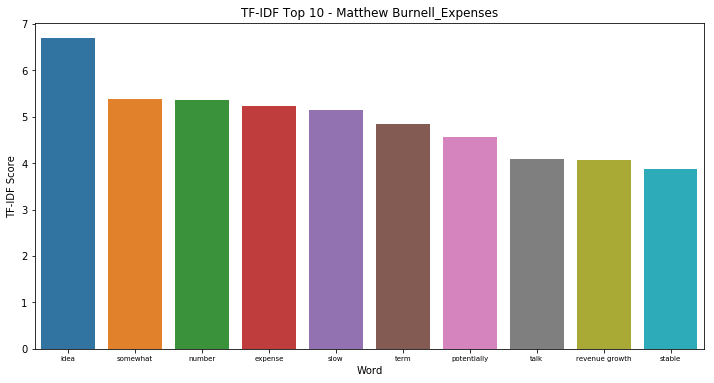

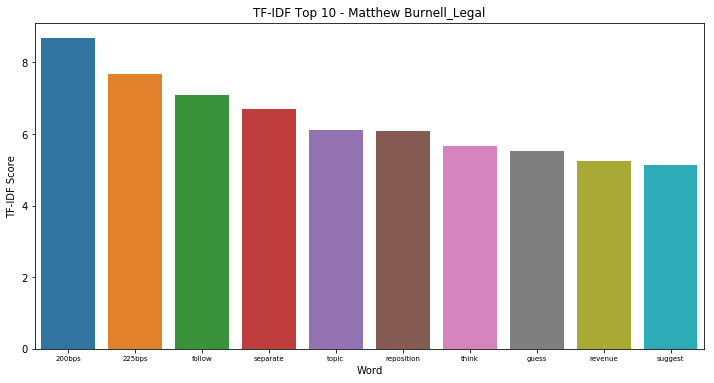

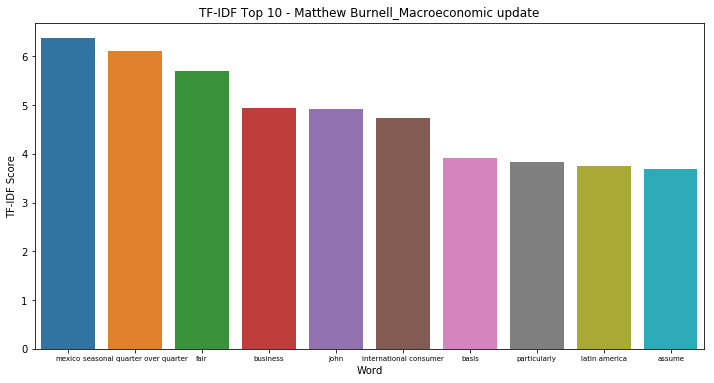

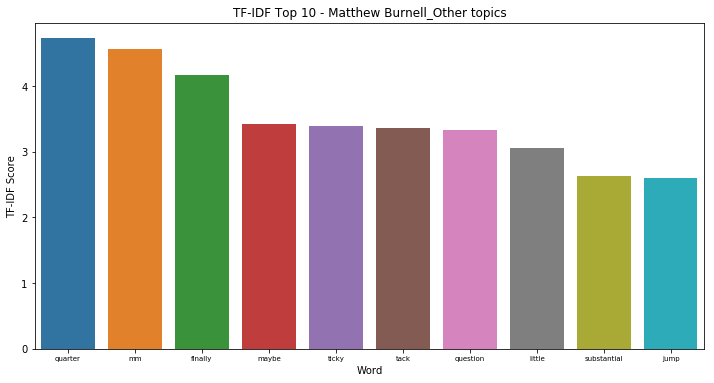

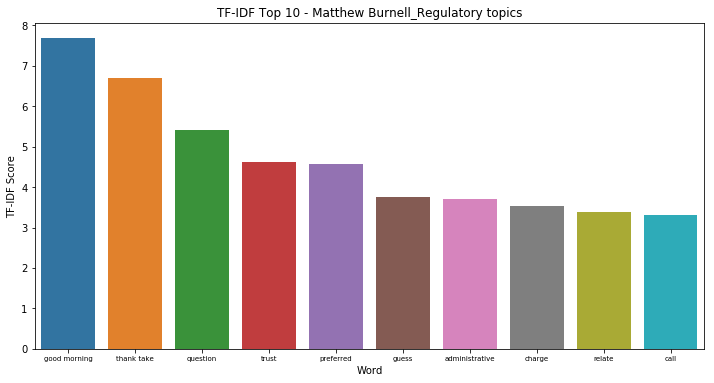

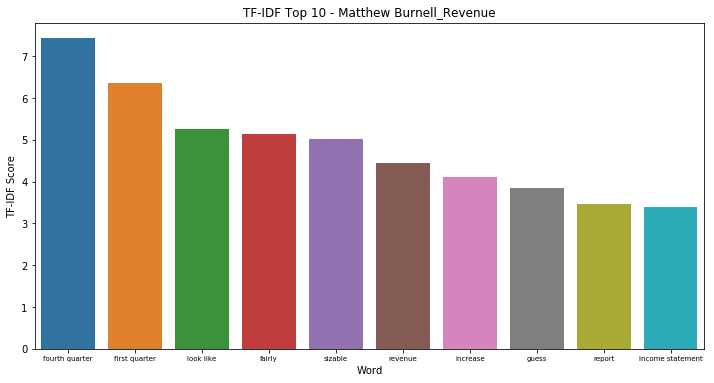

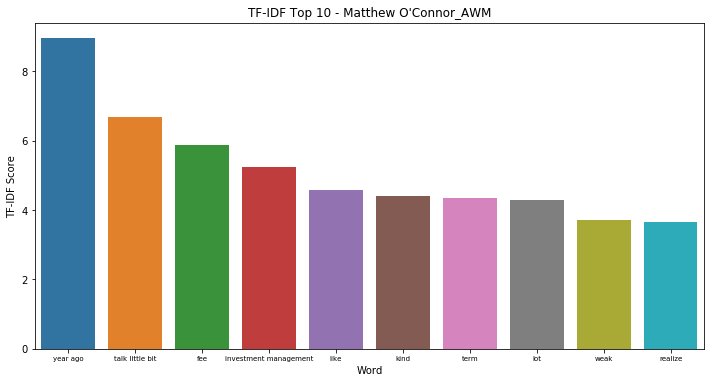

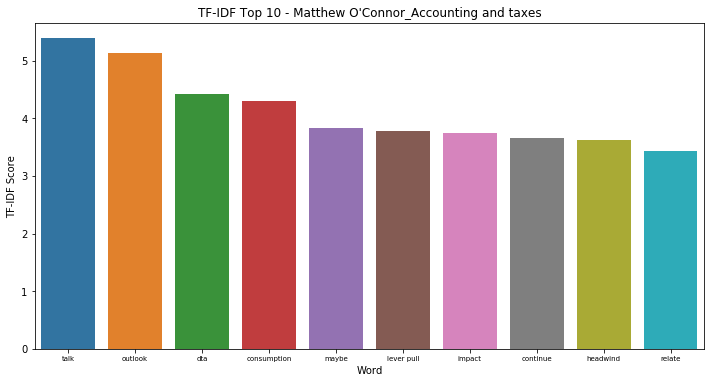

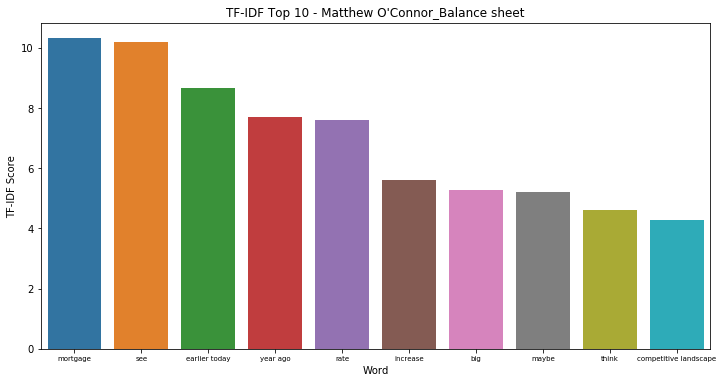

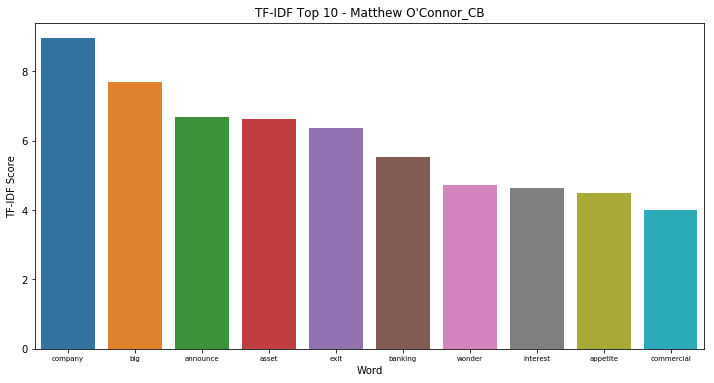

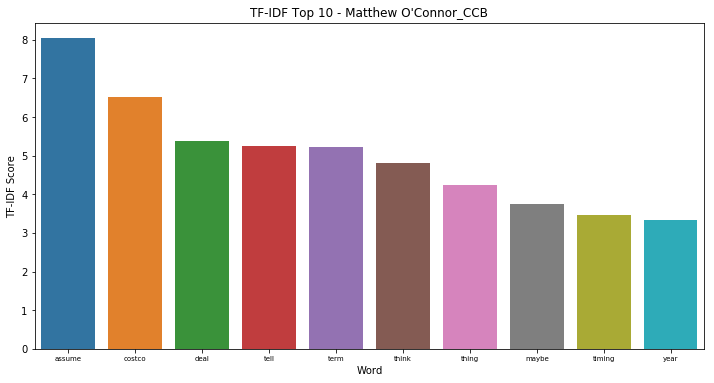

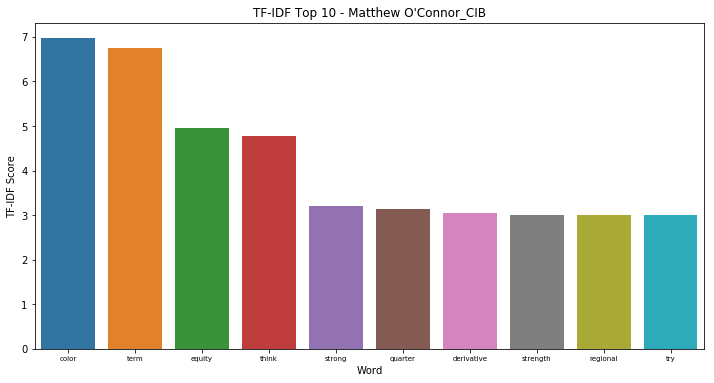

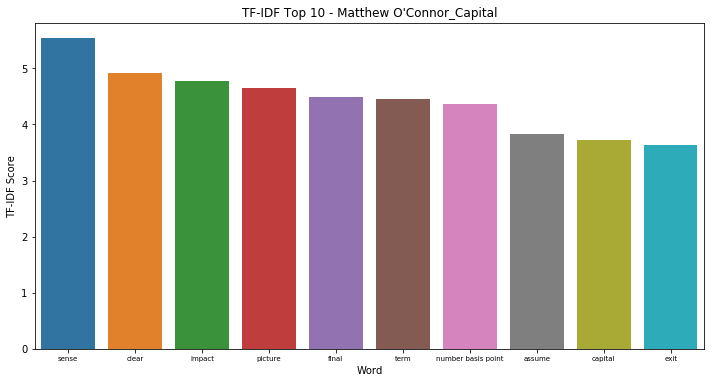

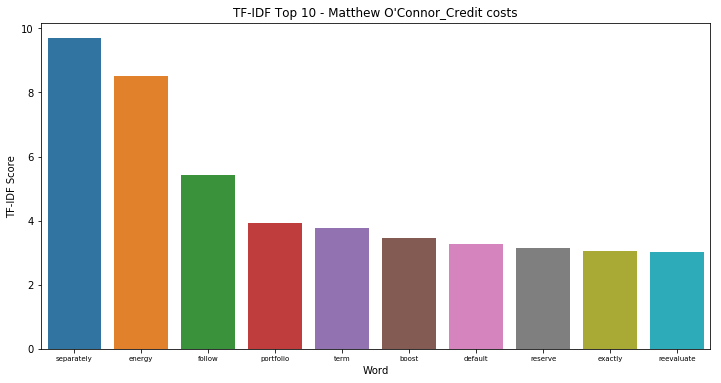

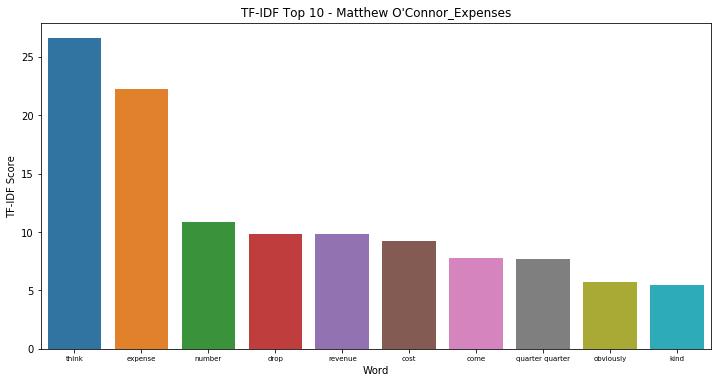

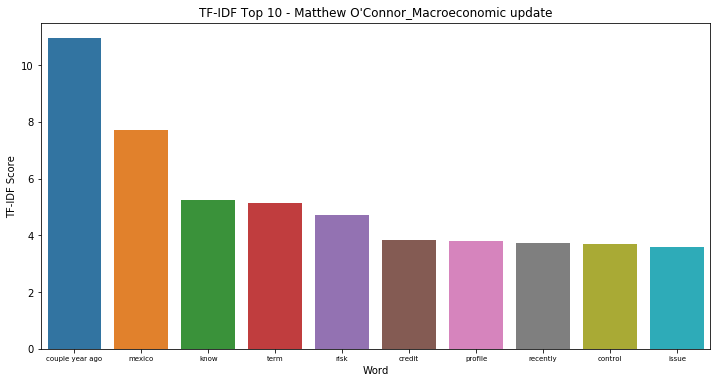

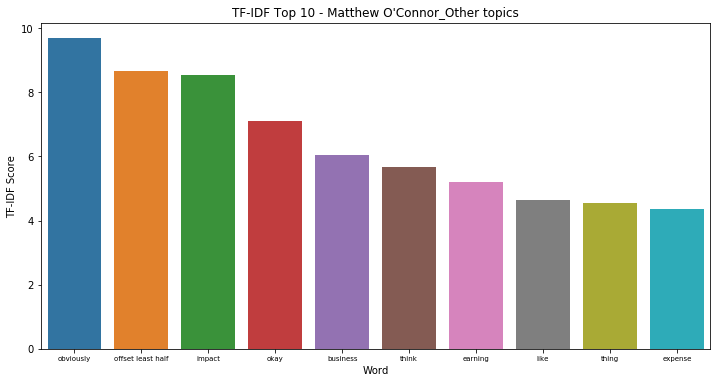

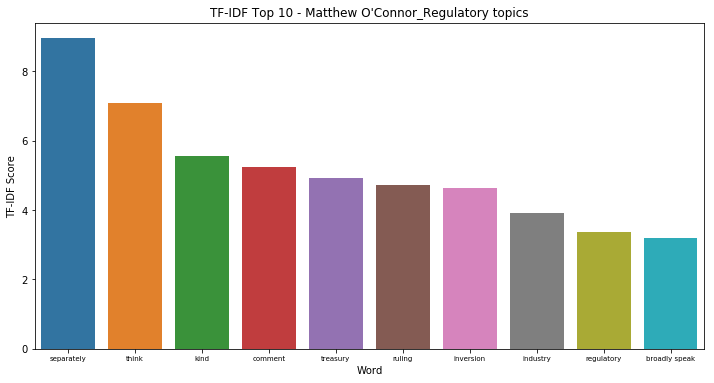

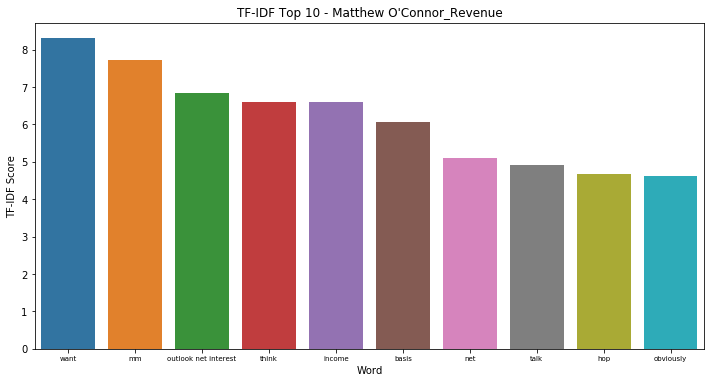

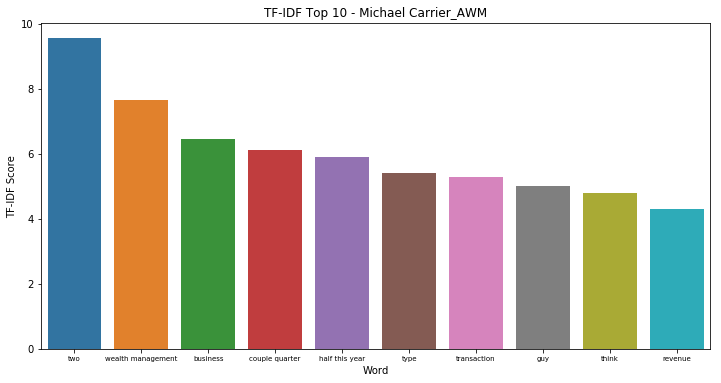

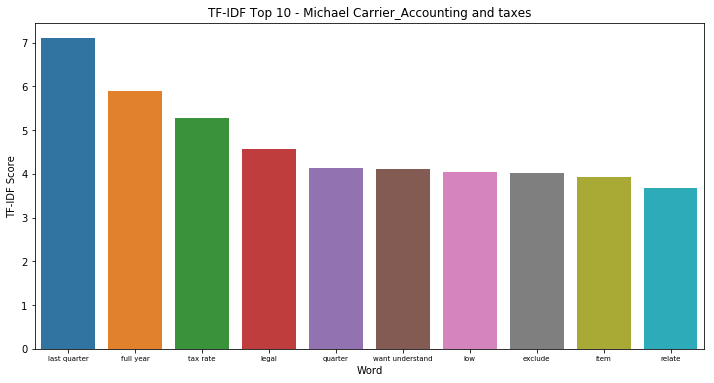

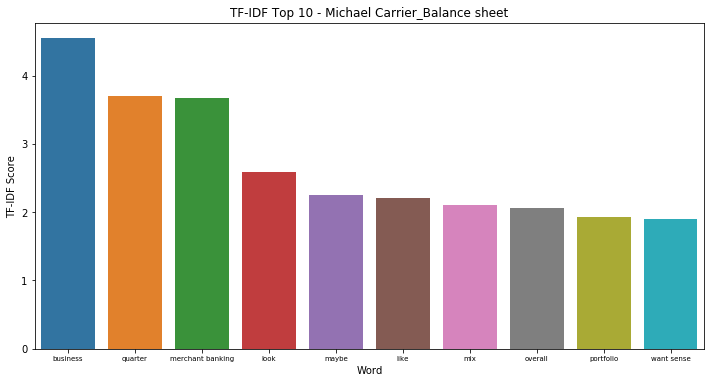

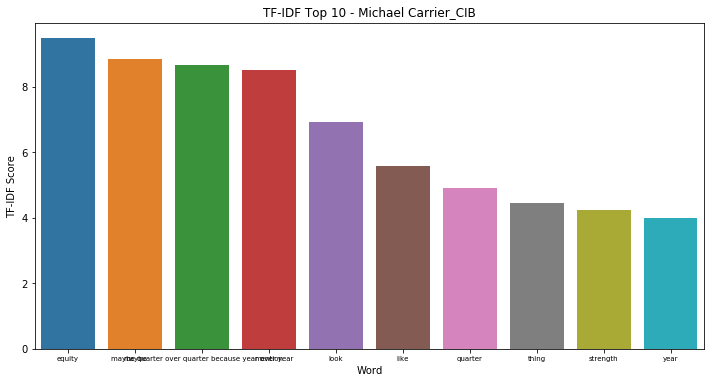

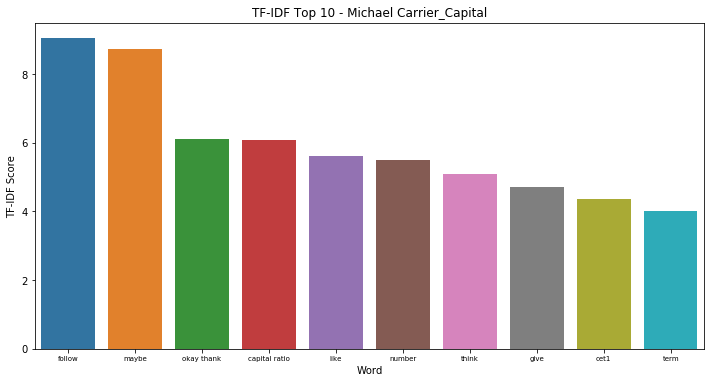

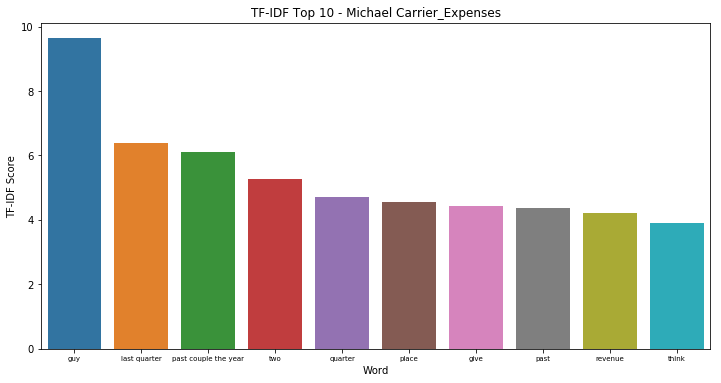

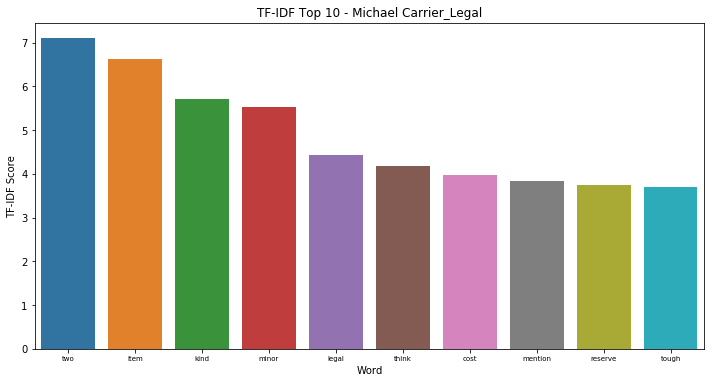

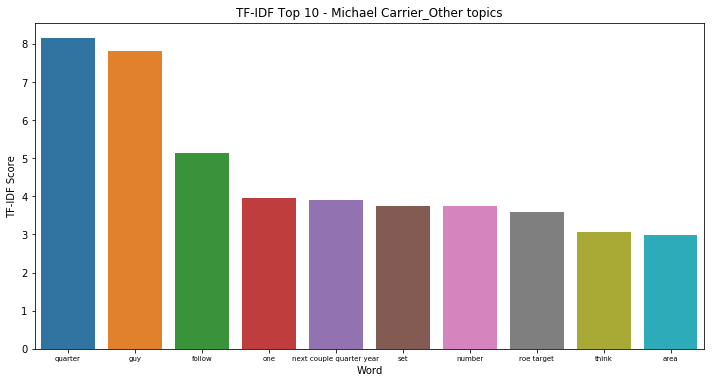

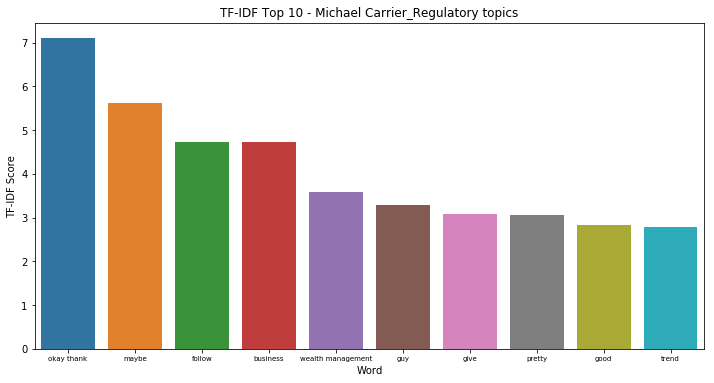

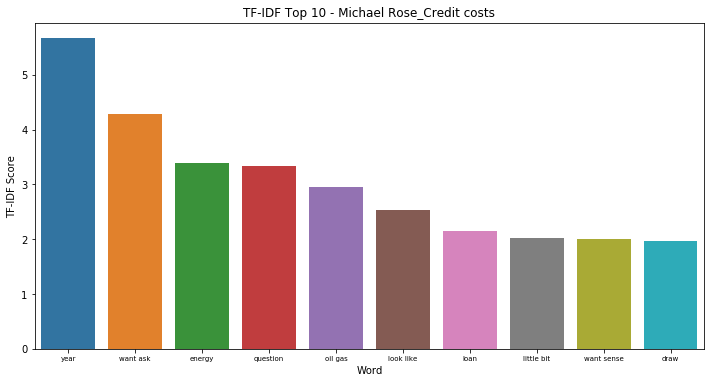

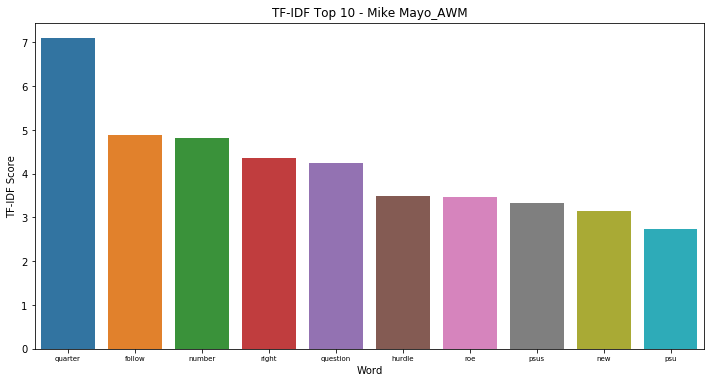

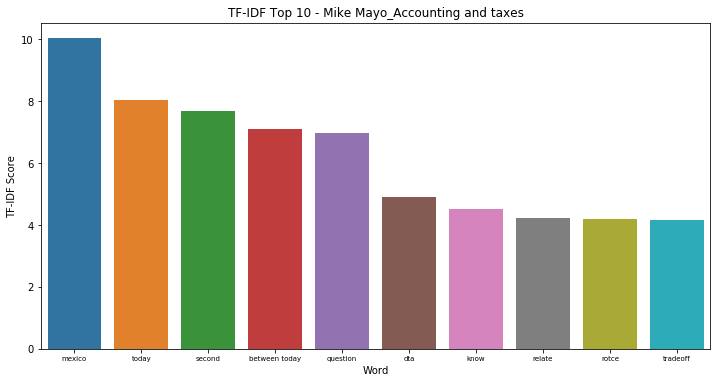

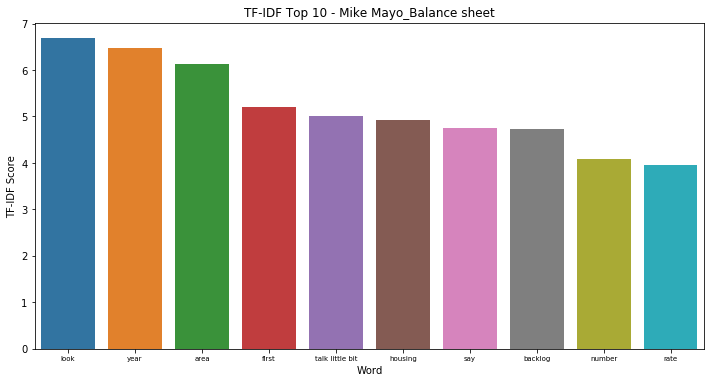

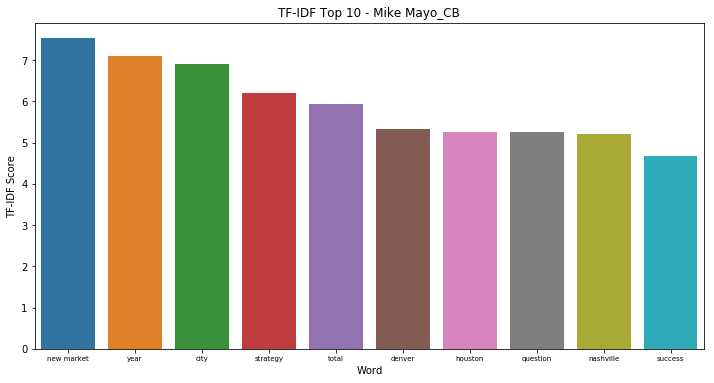

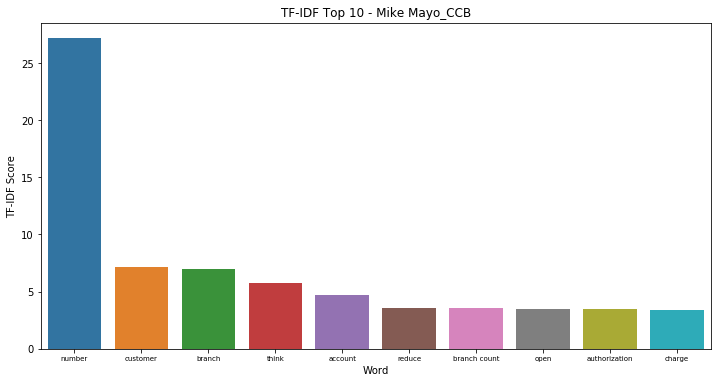

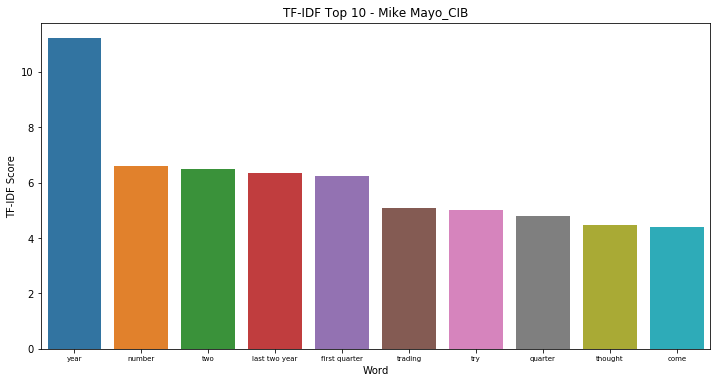

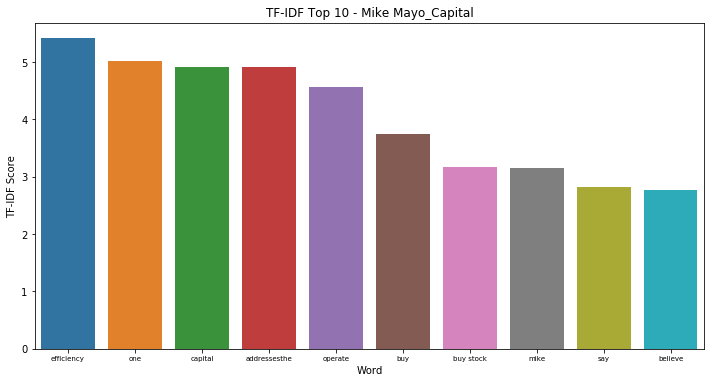

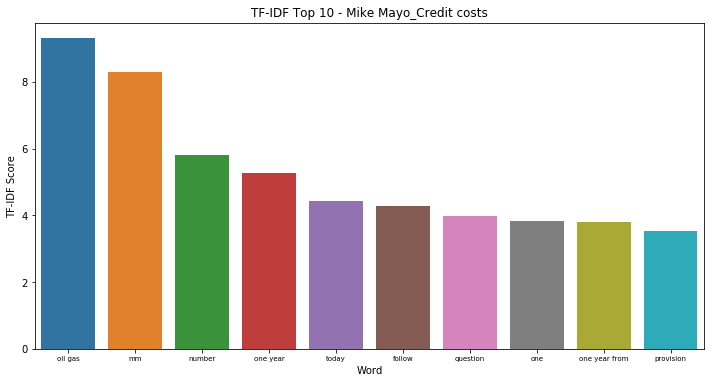

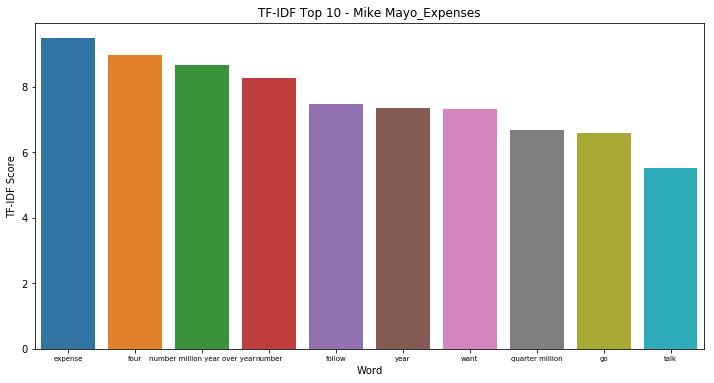

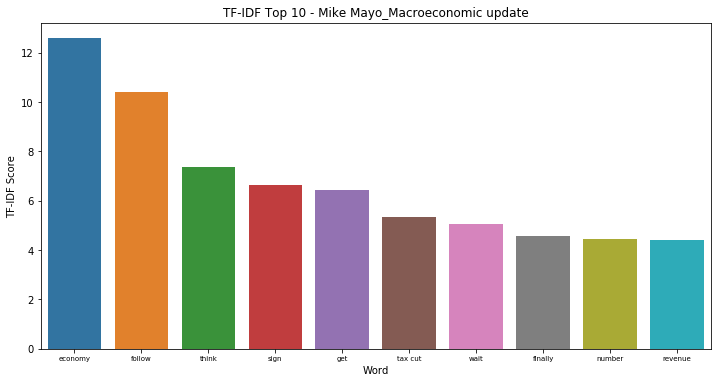

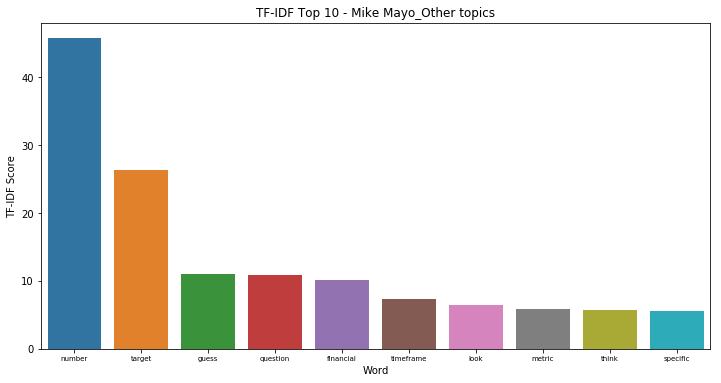

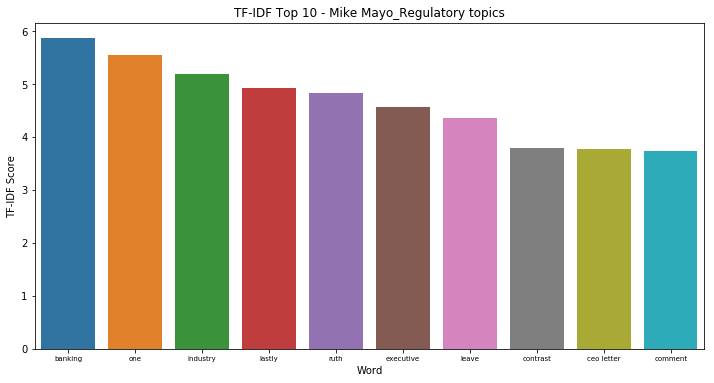

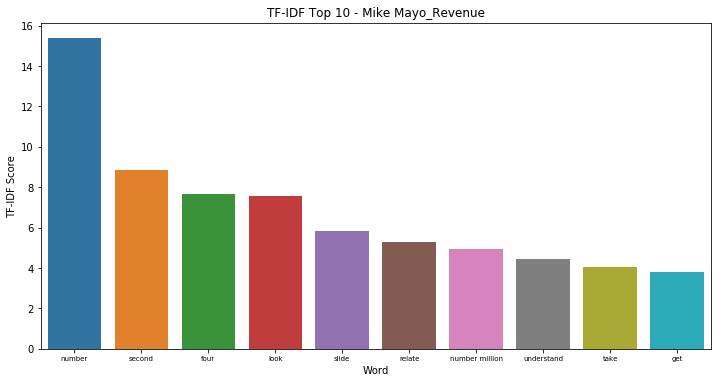

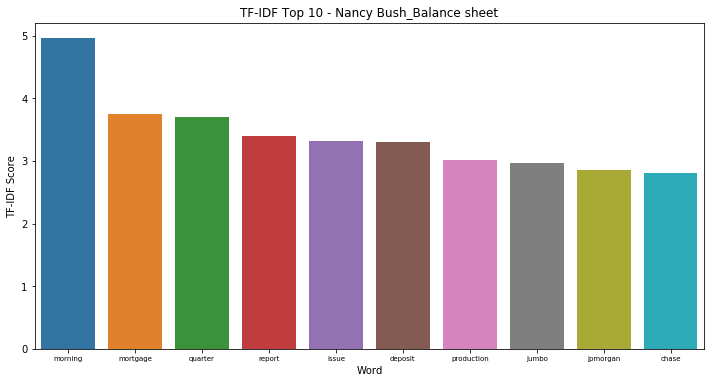

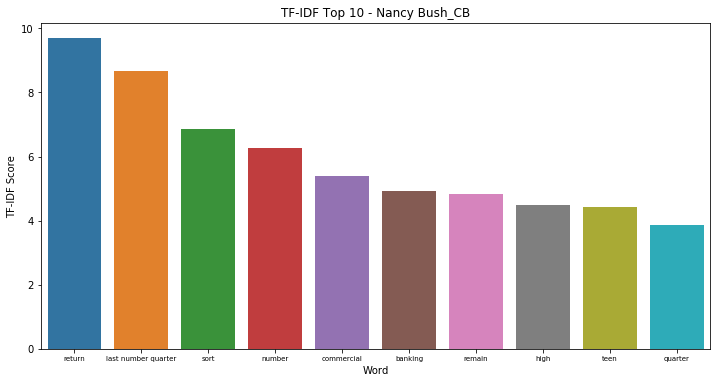

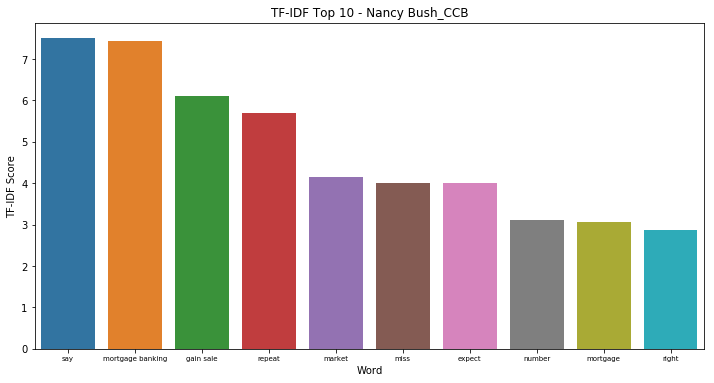

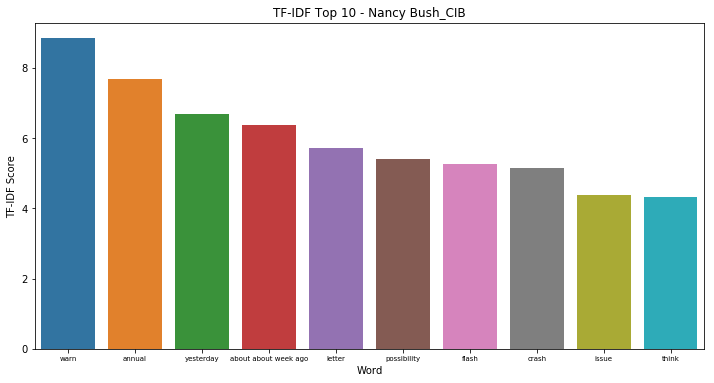

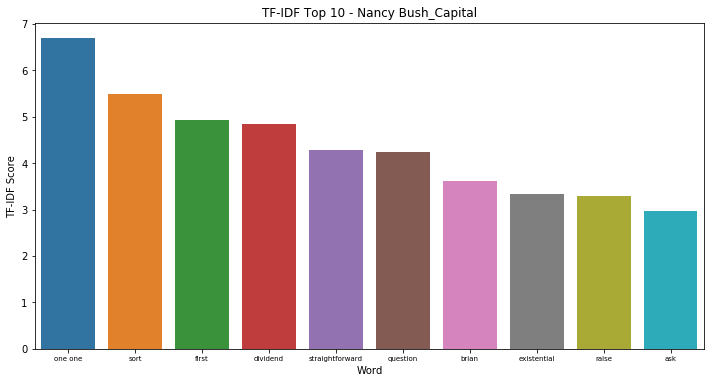

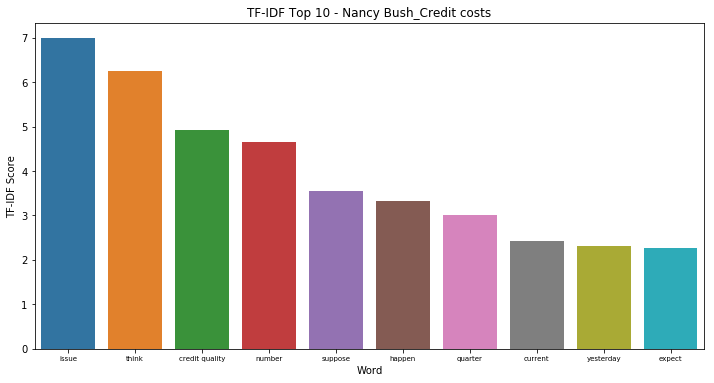

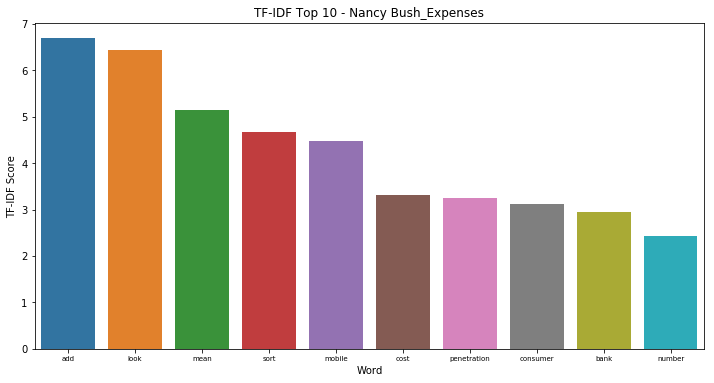

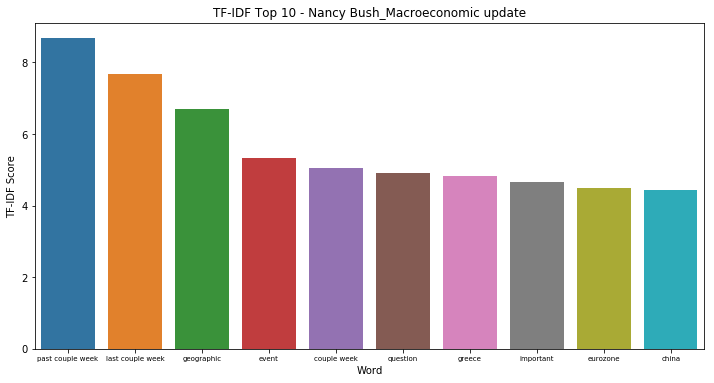

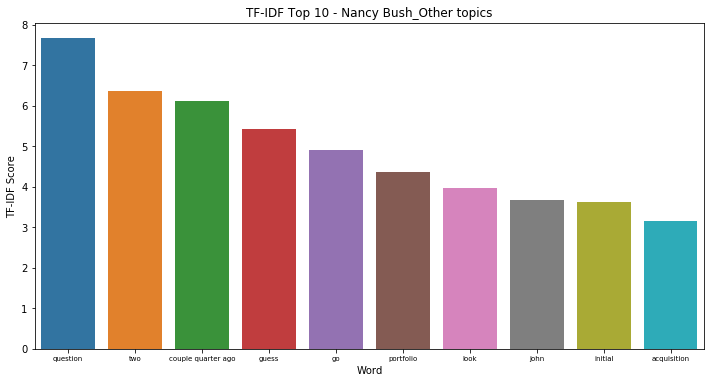

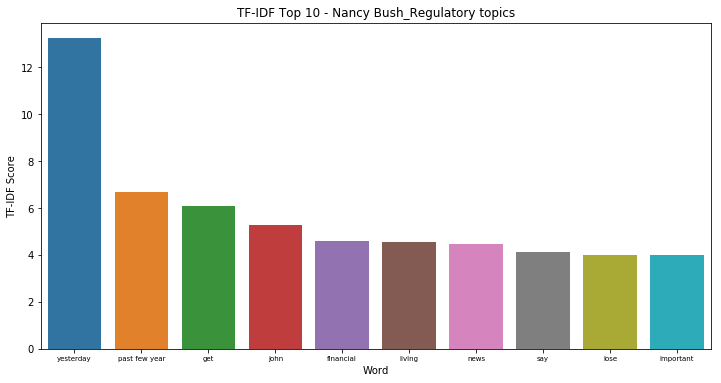

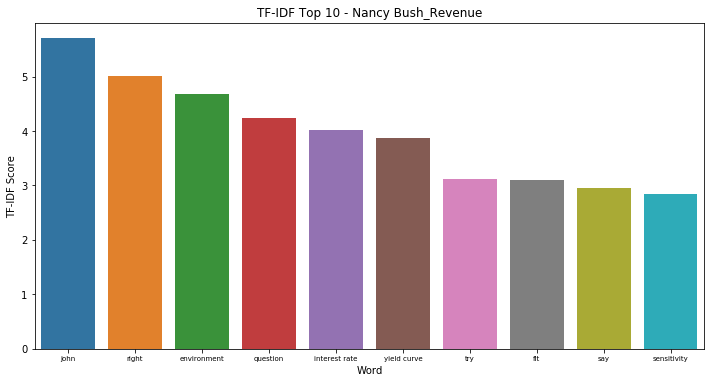

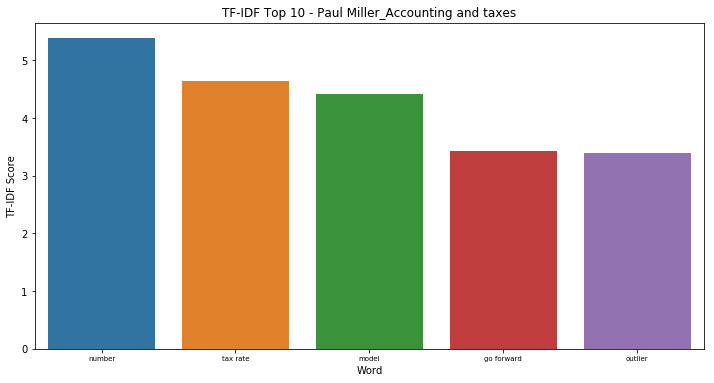

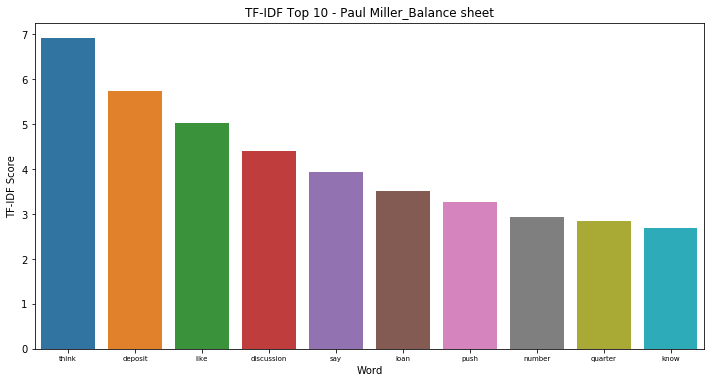

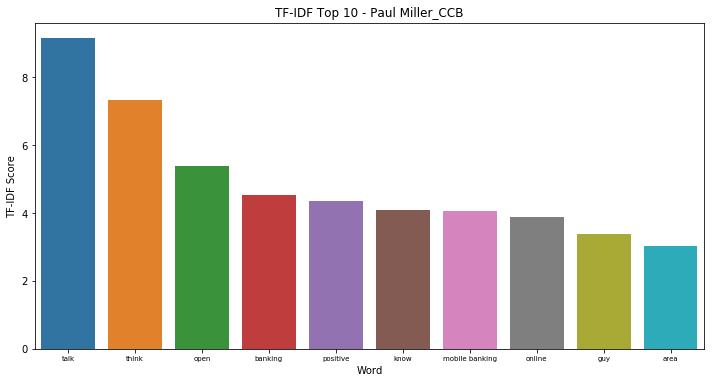

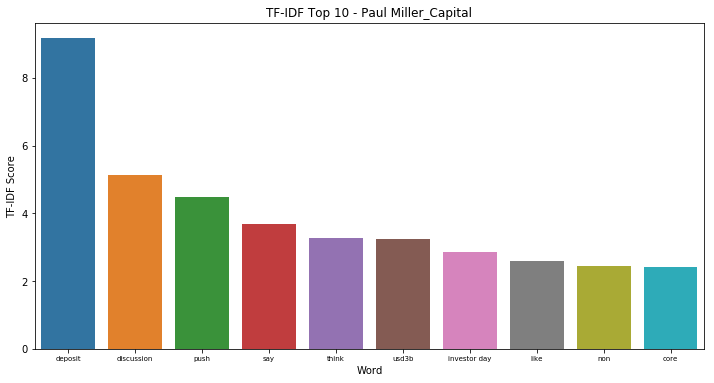

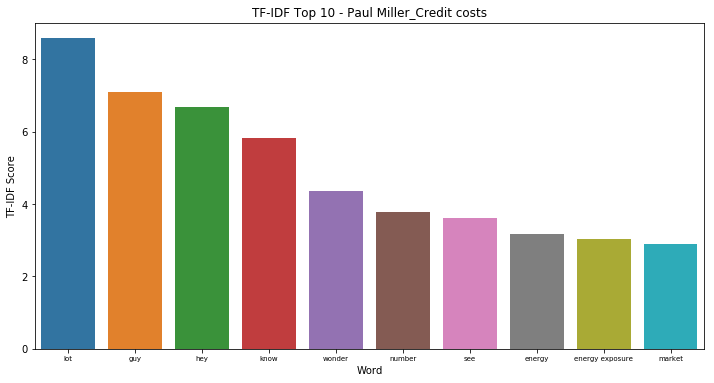

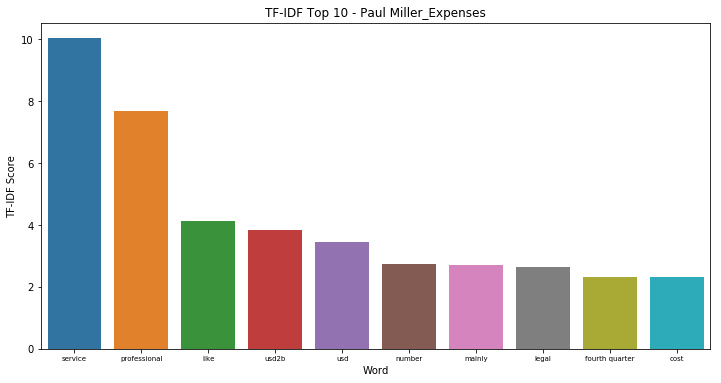

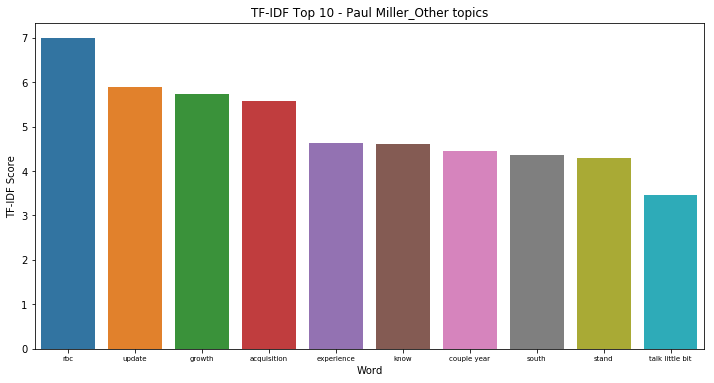

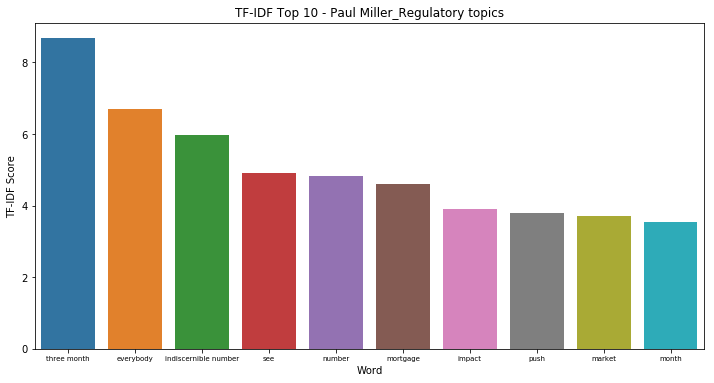

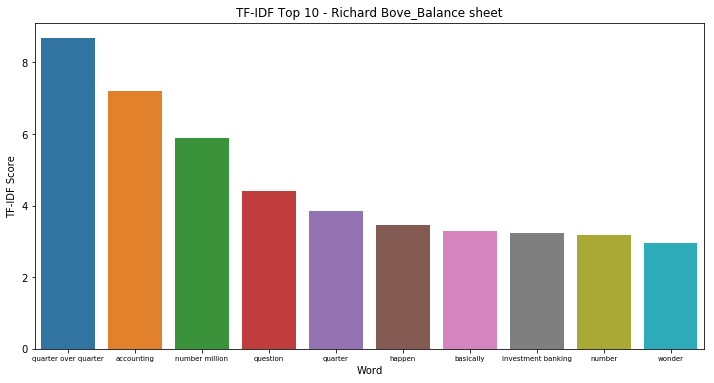

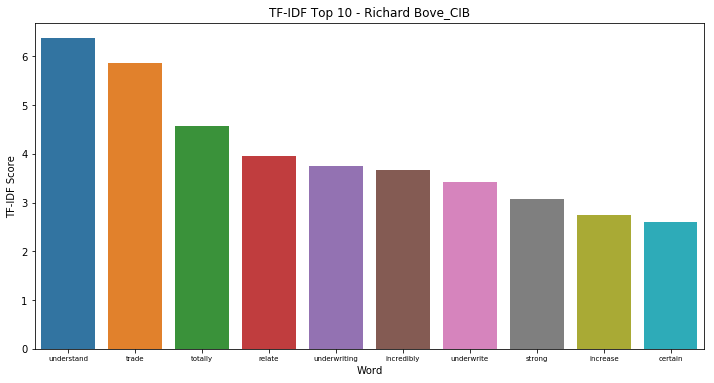

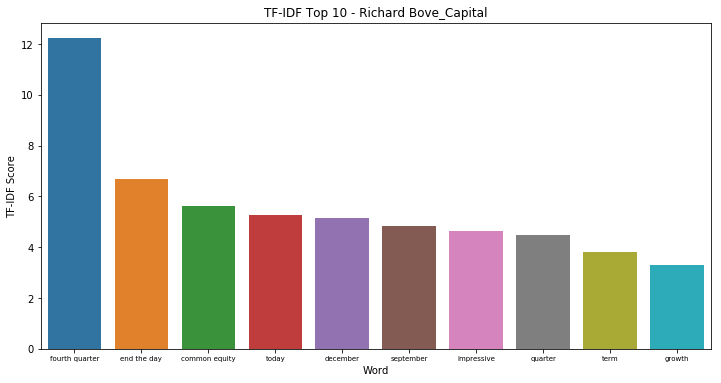

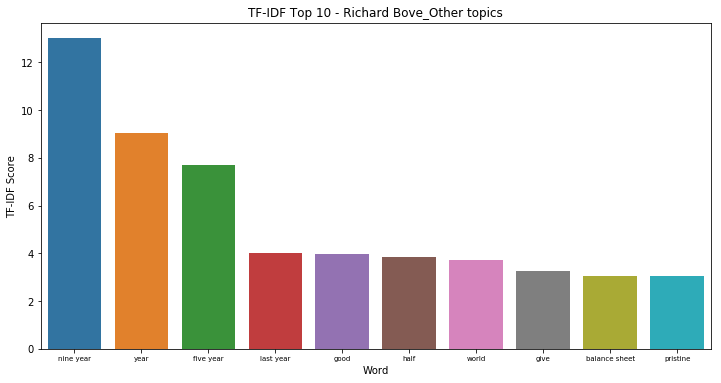

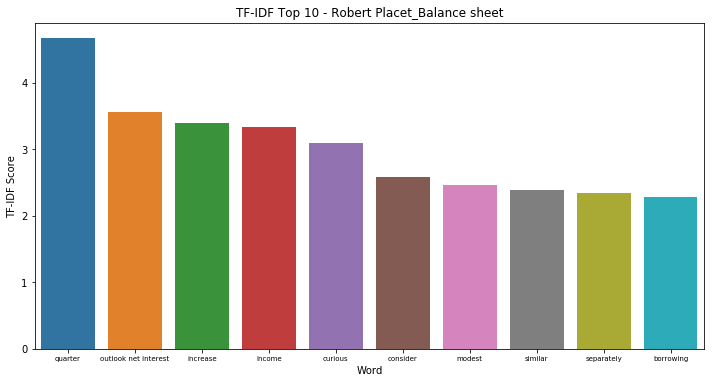

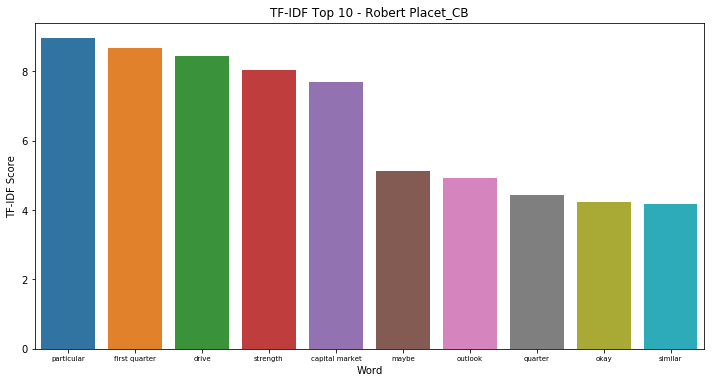

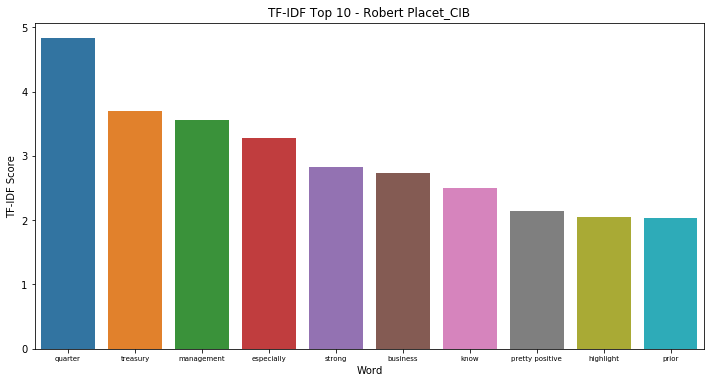

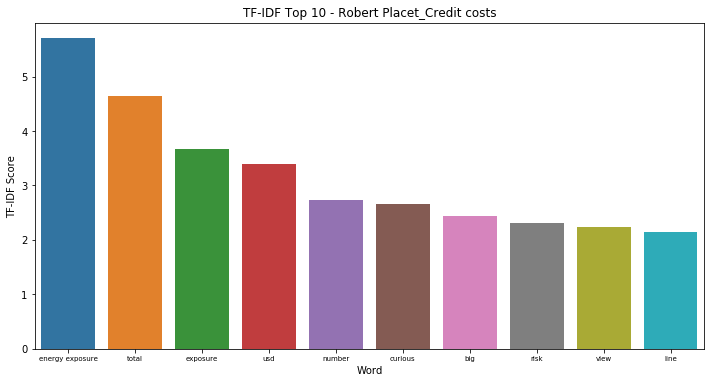

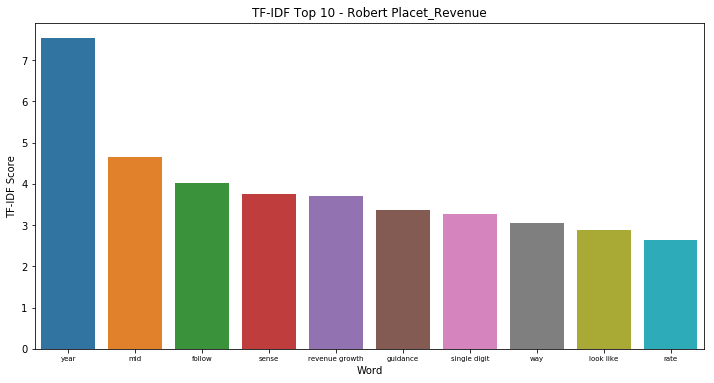

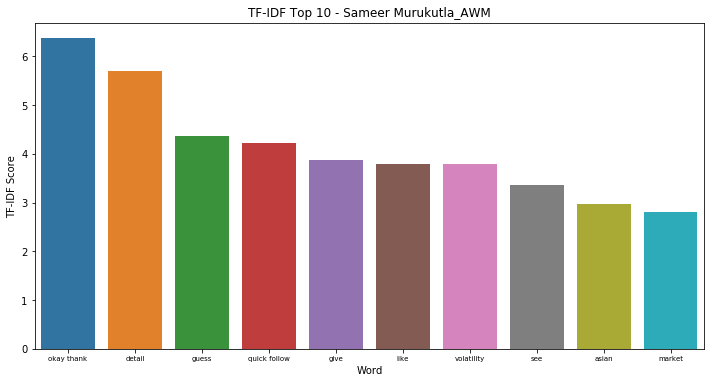

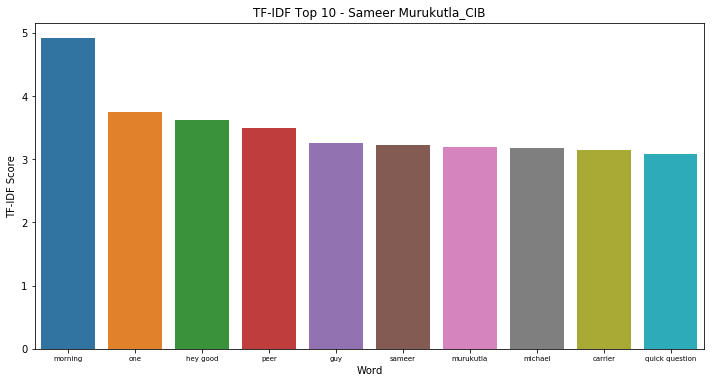

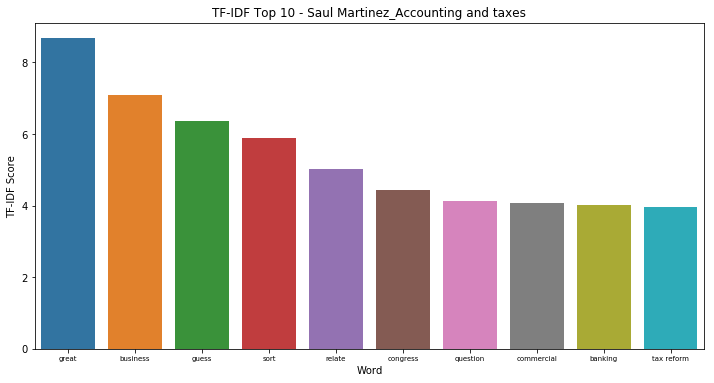

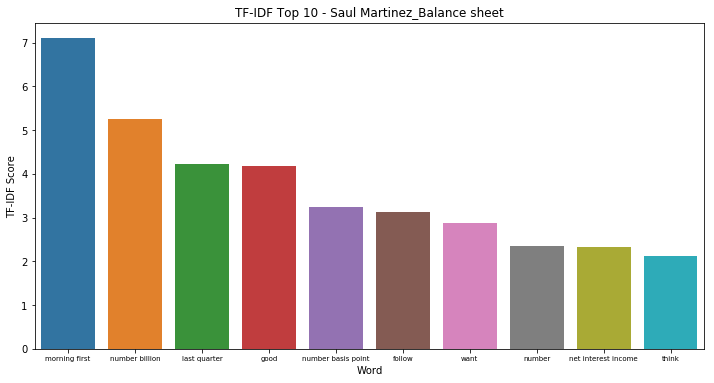

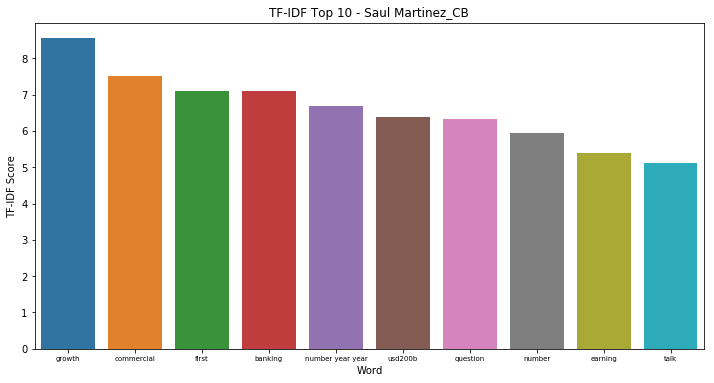

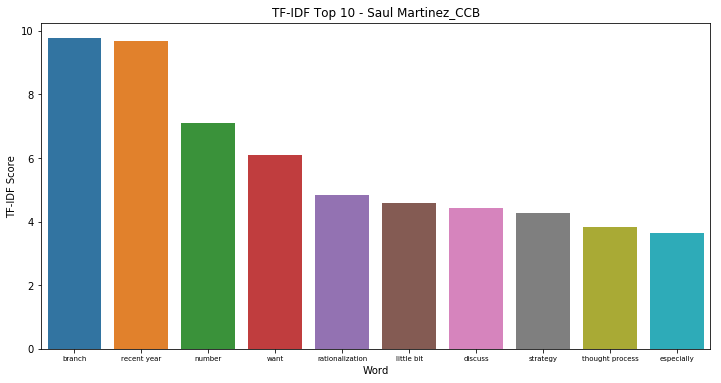

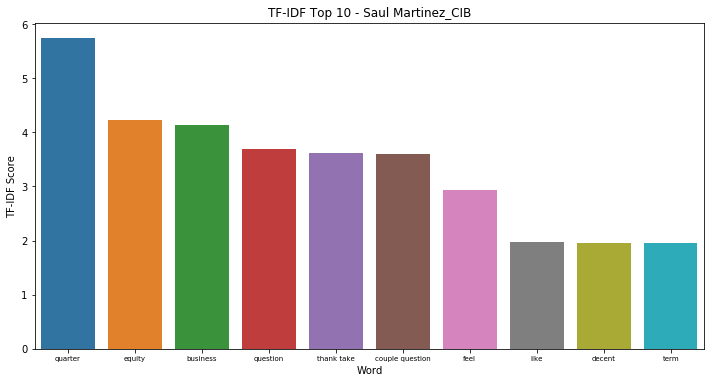

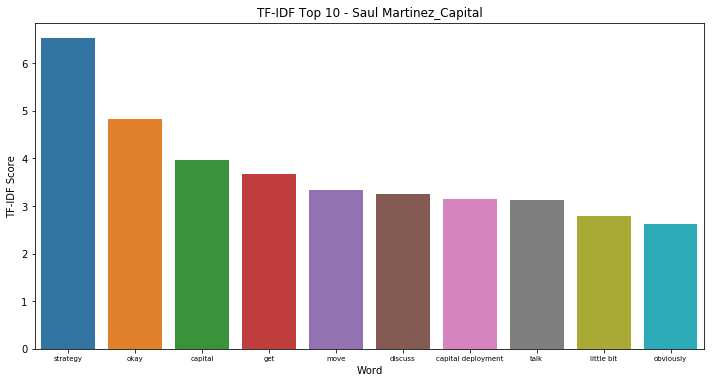

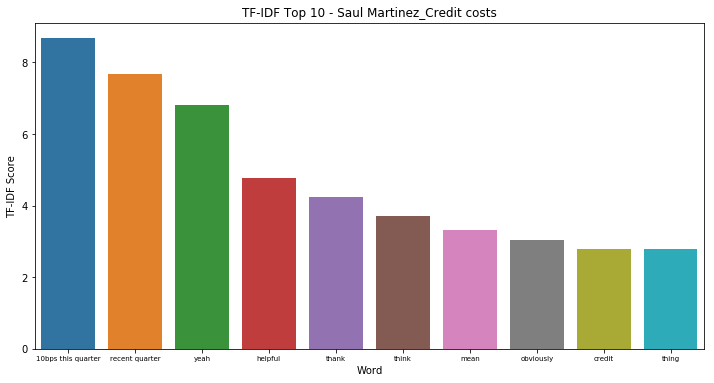

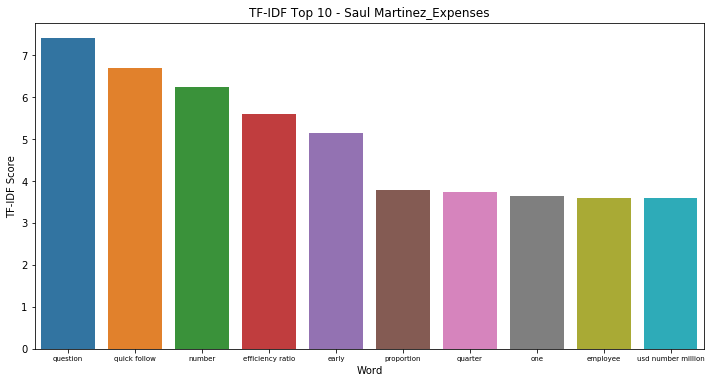

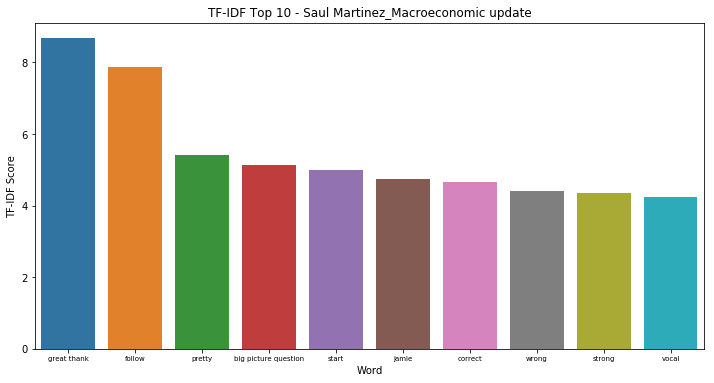

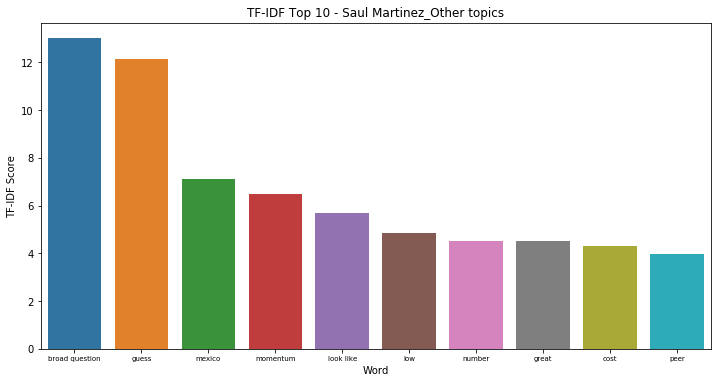

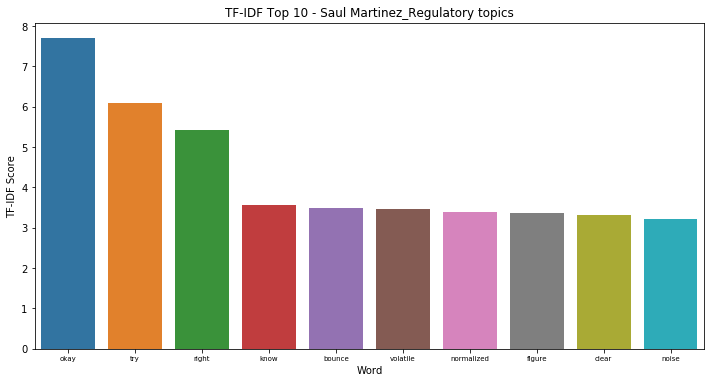

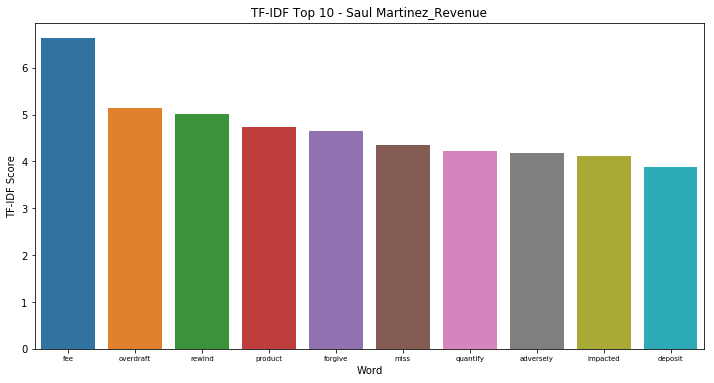

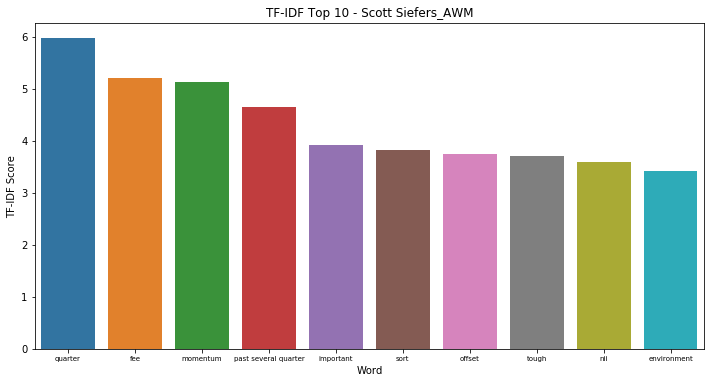

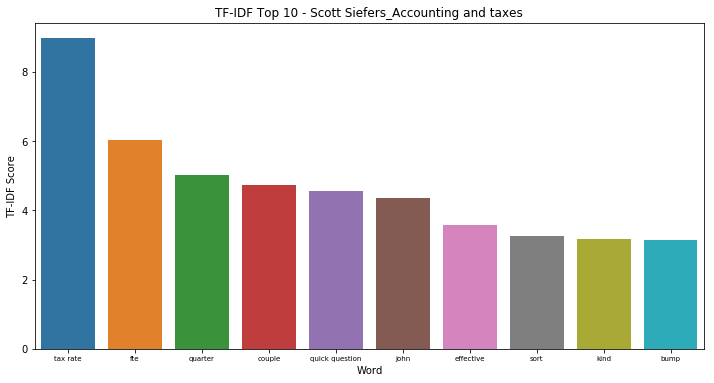

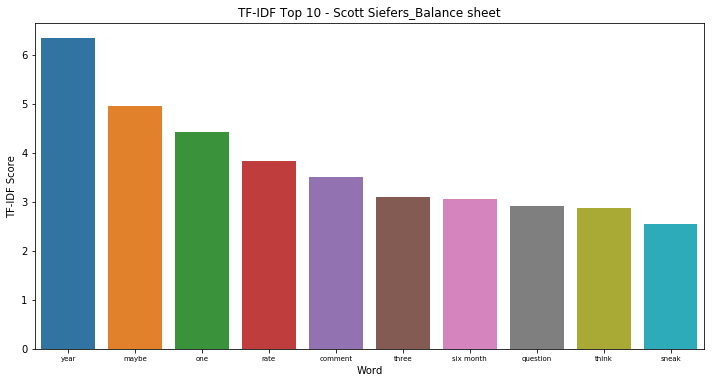

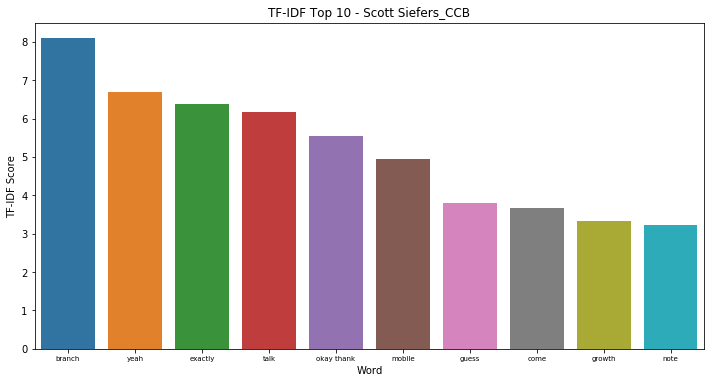

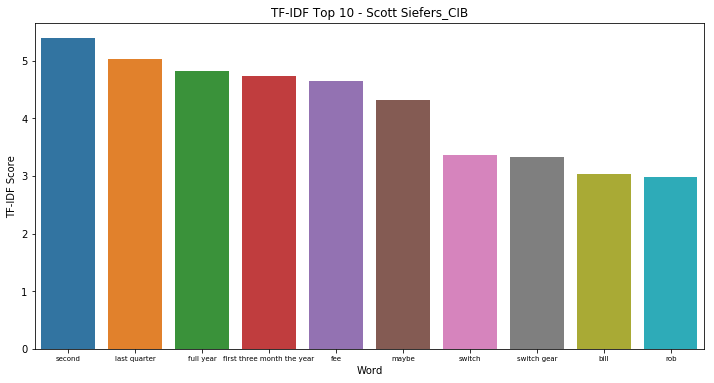

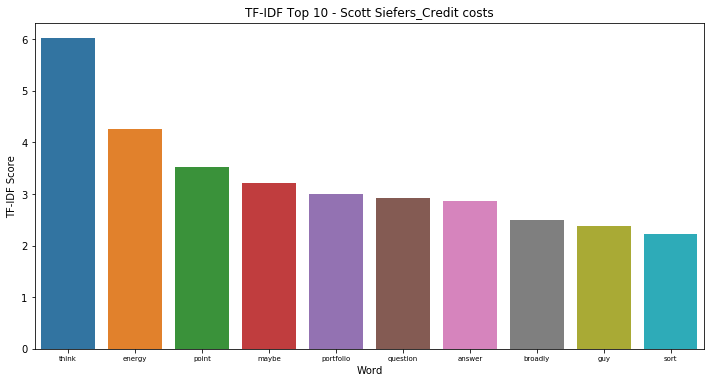

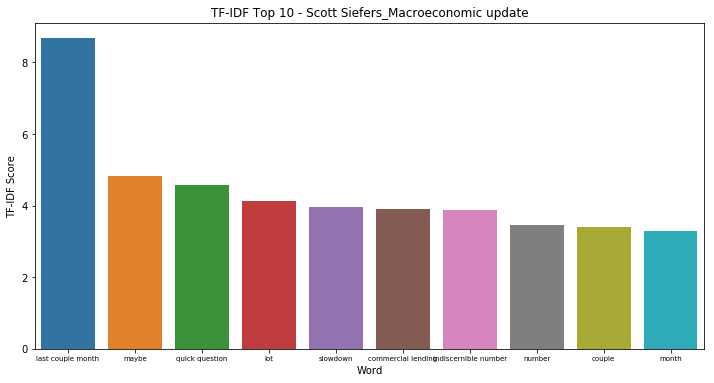

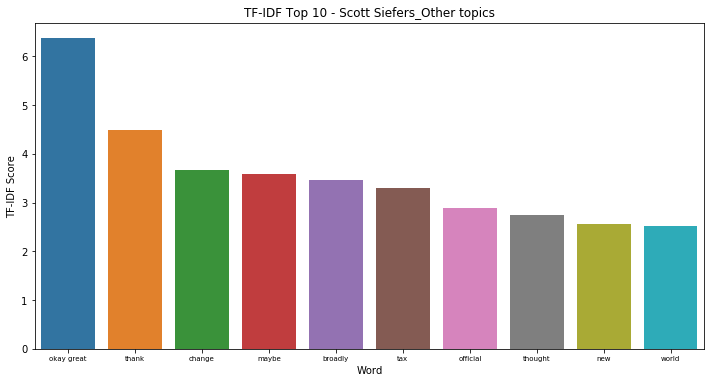

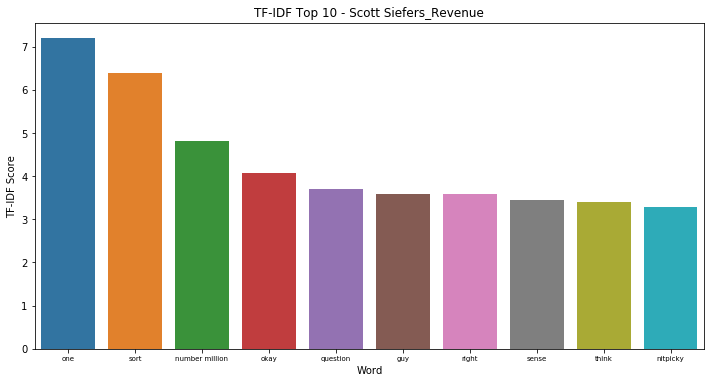

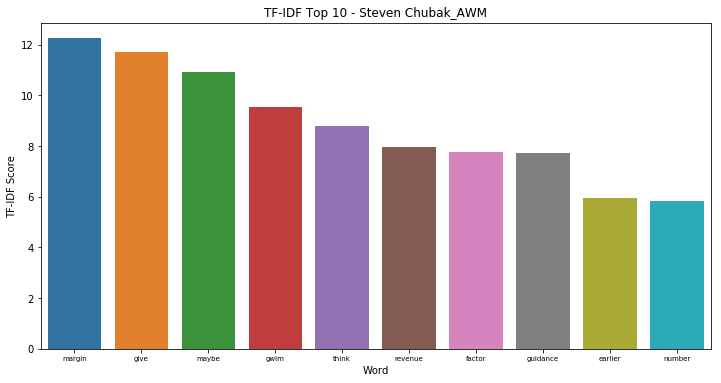

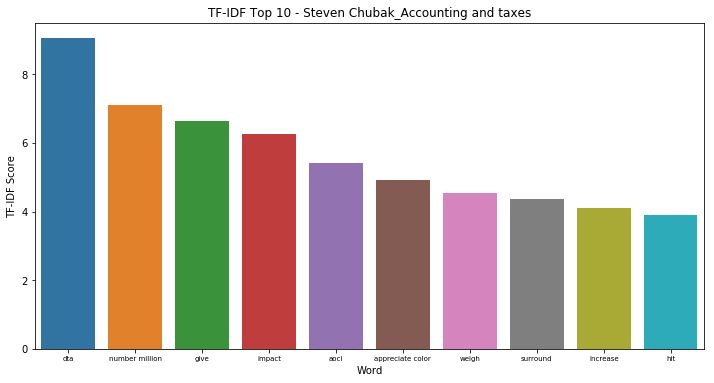

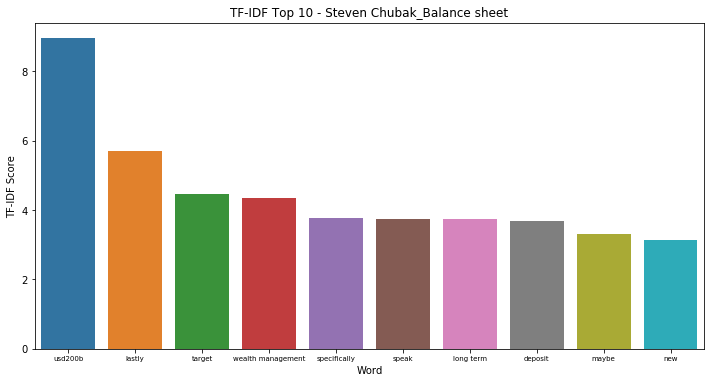

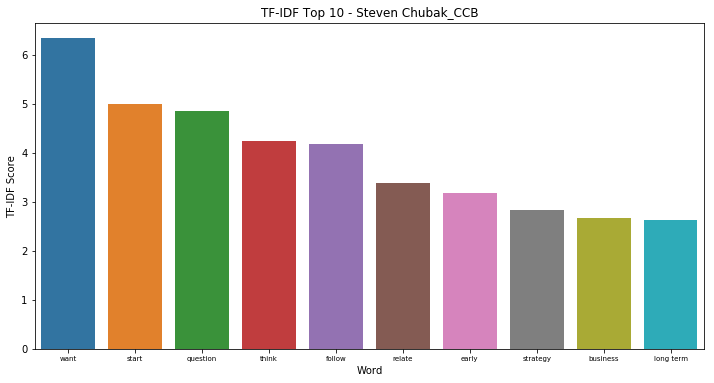

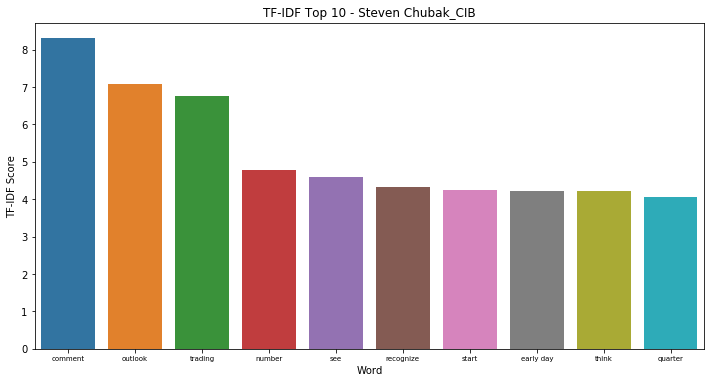

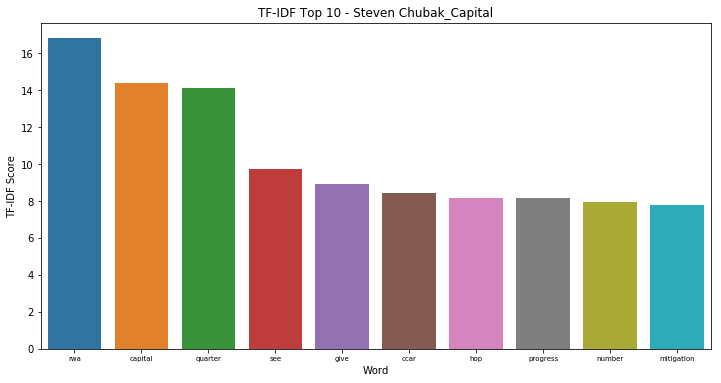

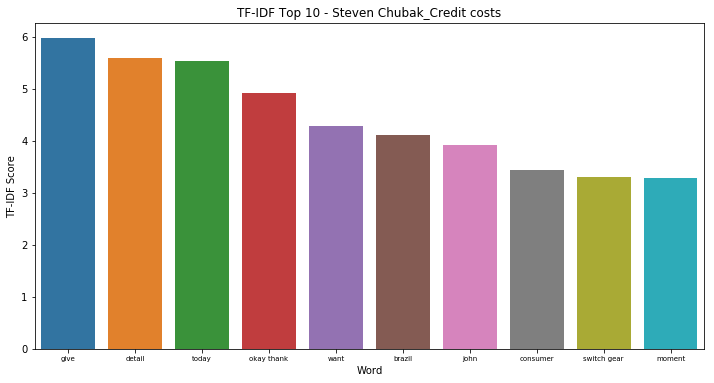

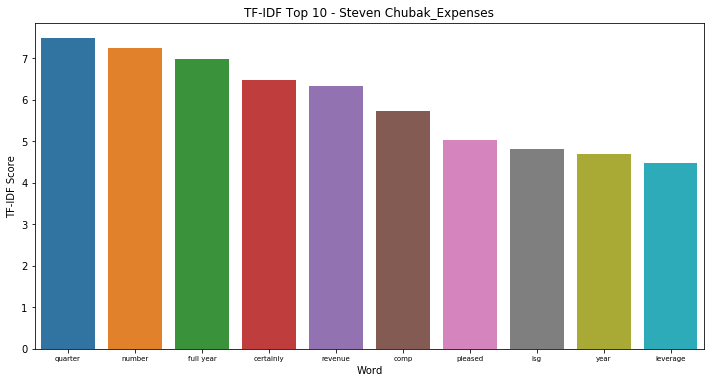

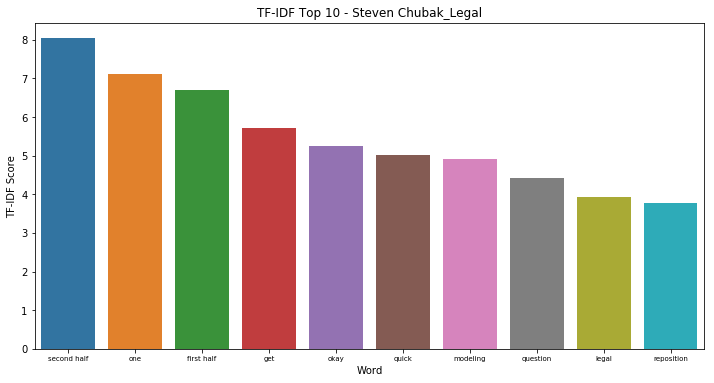

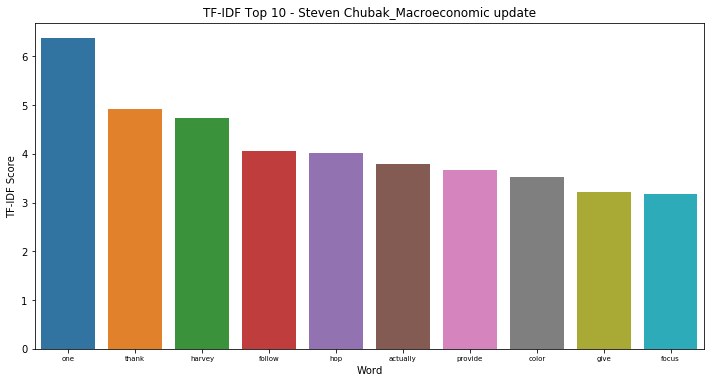

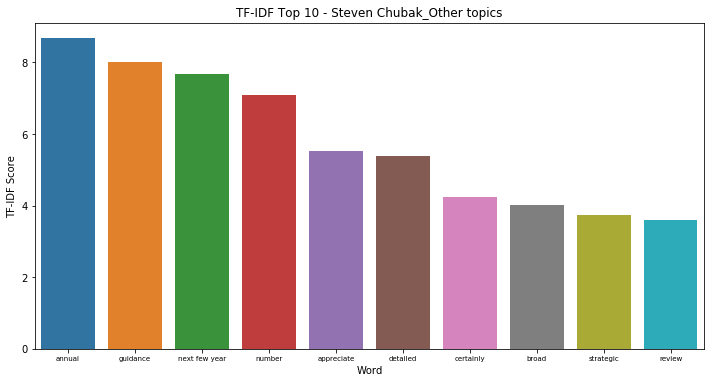

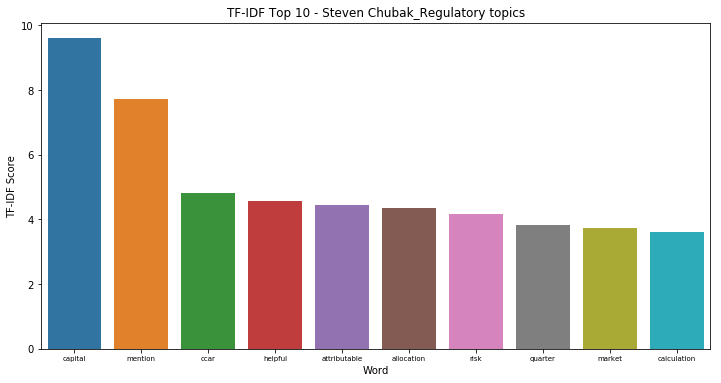

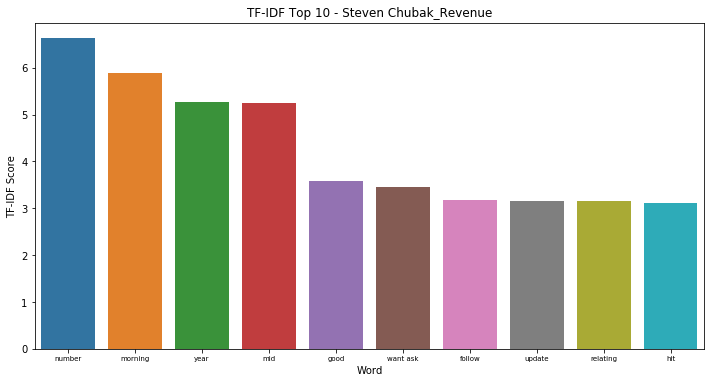

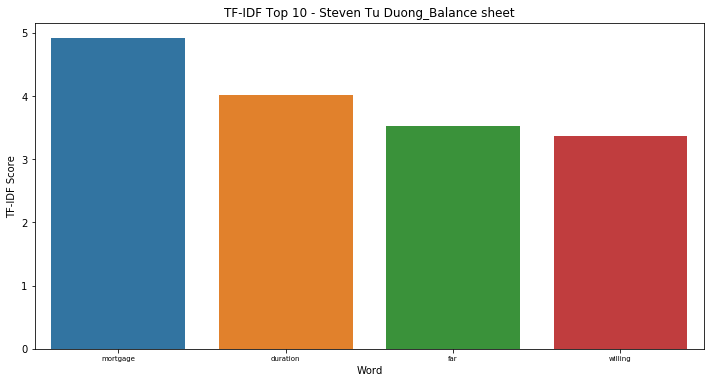

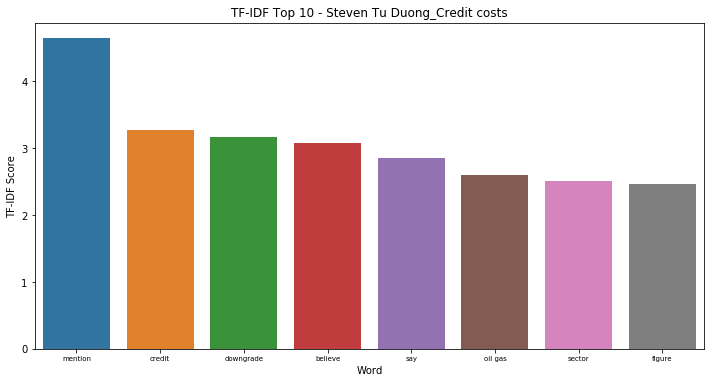

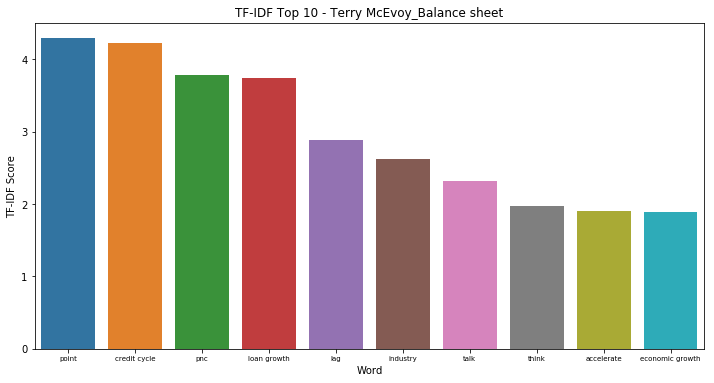

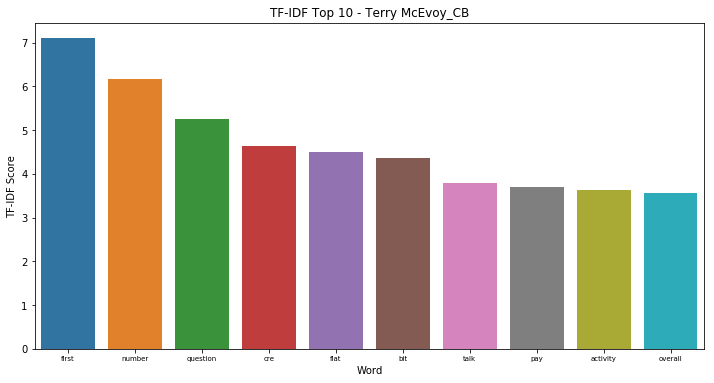

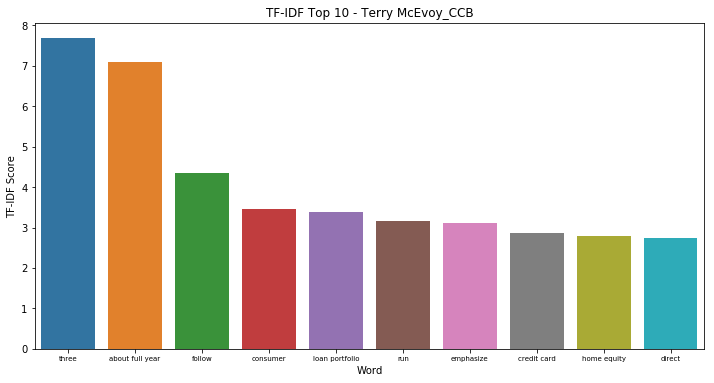

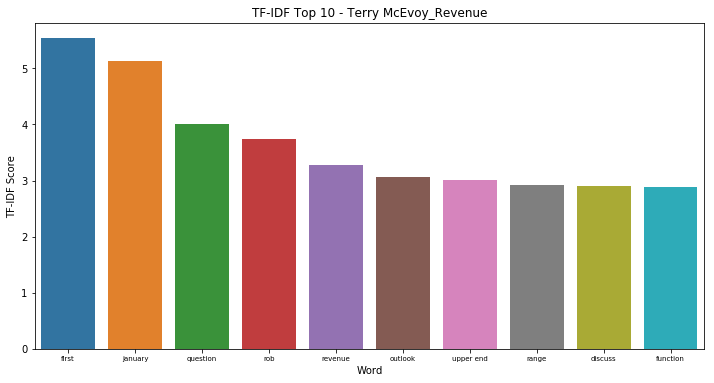

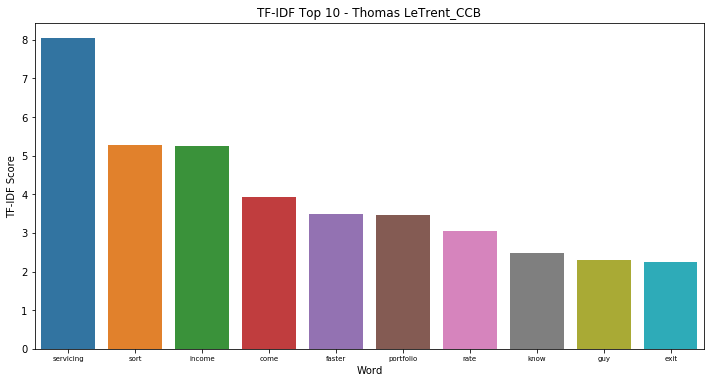

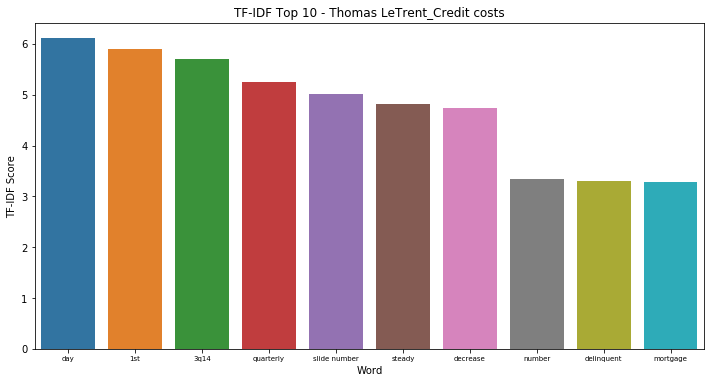

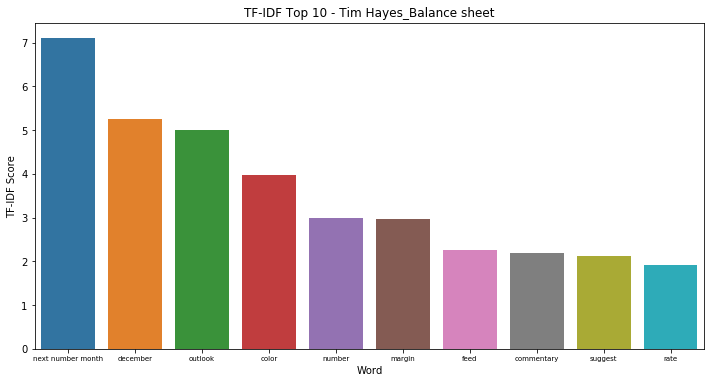

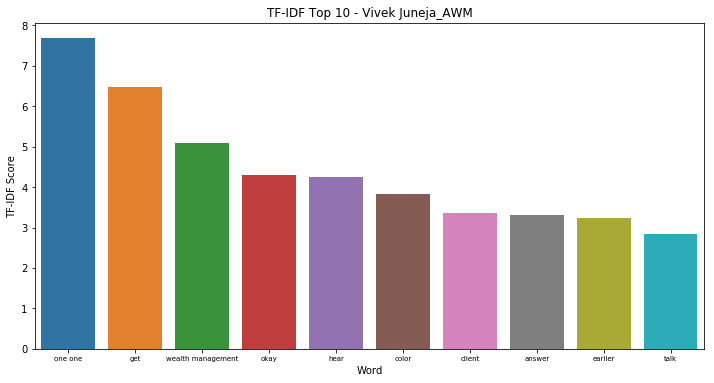

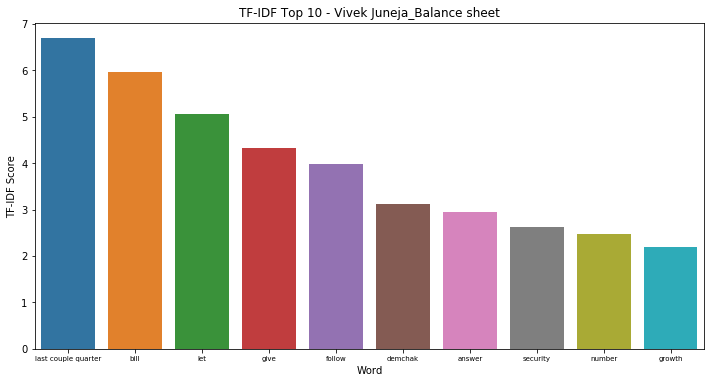

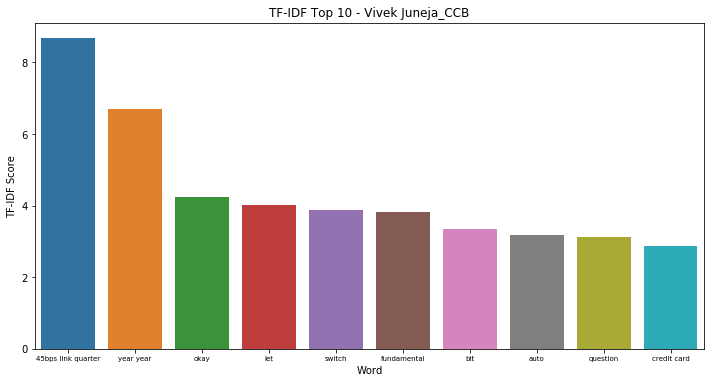

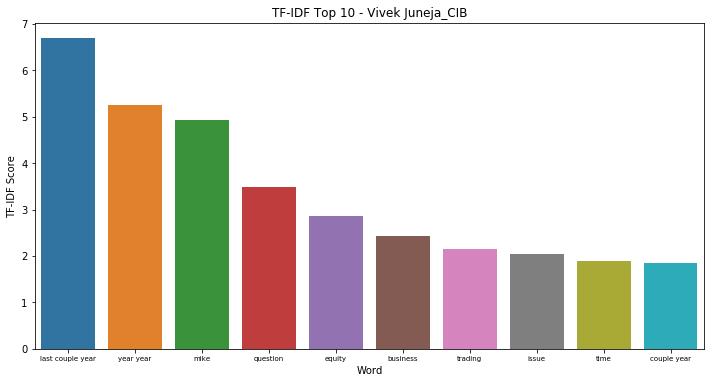

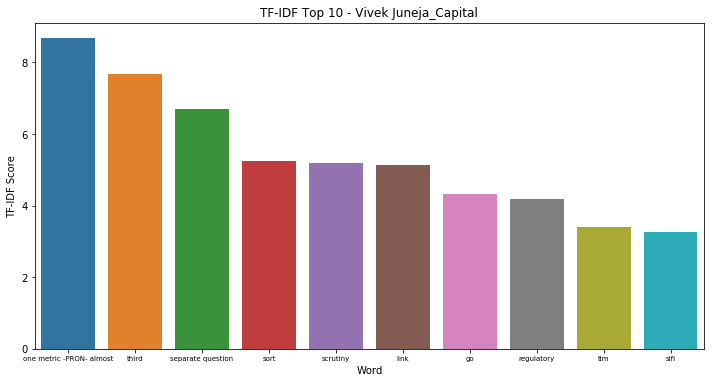

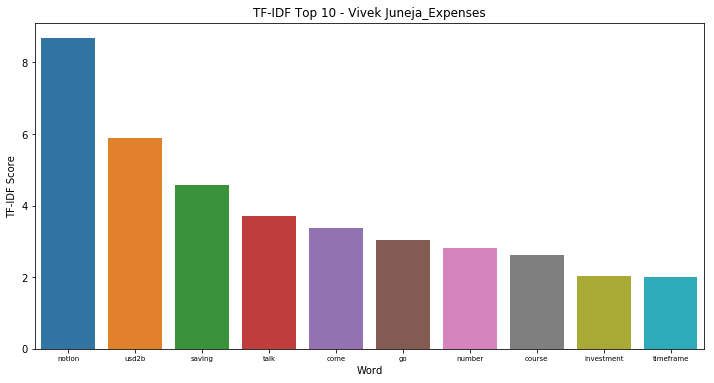

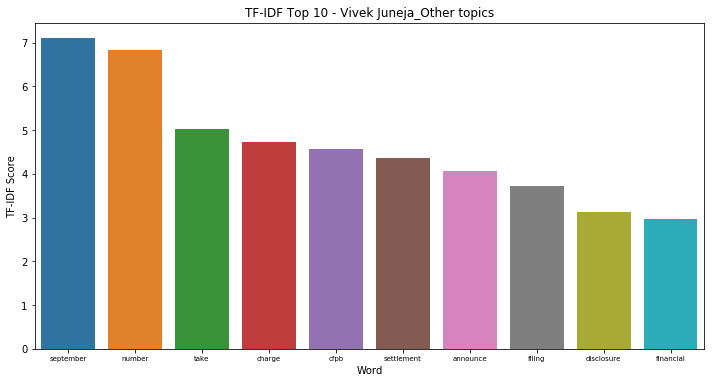

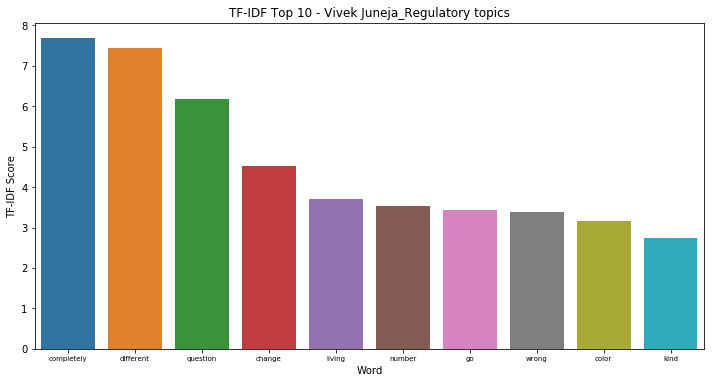

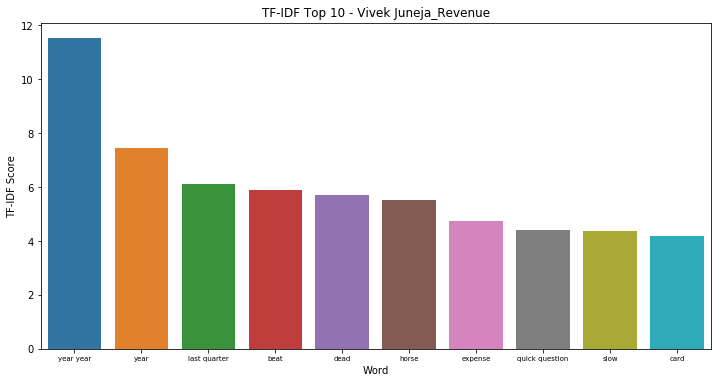

In [34]:
plotTFIDFbyVar('figures/analyst_tag_tfidf_v2')

In [35]:
print('oh man')

oh man
